# 5. Capstone Project: Exploratory Data Analysis II

***

![headerall](./images/headers/header_all.jpg)

### Project:
In this work, we will first analyze where and when traffic congestion is highest and lowest in New York State. We will then build different machine learning models capable of predicting cab travel times in and around New York City using only variables that can be easily obtained from a smartphone app or a website. We will then compare their performance and explore the possibility of using additional variables such as weather forecasts and holidays to improve the predictive performance of the models.

### Section:
In this section, we will detect and describe patterns, trends, and relationships among geospatial and temporal features in a subset (1%) of the 2018 NYC yellow cab trip dataset to identify variables that may impact traffic flow, and thus trip duration, in and around New York City. The exploratory data analysis will be divided into two subsections, the first focused on the New York City taxi trip dataset (Exploratory Data Analysis, Part I), and the second on the external datasets (Data Preparation, Part II). At the end of the second subsection, the combined dataset will be analyzed.

## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***
## Table of Content:
    1. Data Preparation
        1.1 External Datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
            1.2.2 Taxi Trips Subset
    2. Exploratory Data Analysis
        2.1 Primary Dataset
            2.1.1 Temporal Analysis
            2.1.2 Spatio-Temporal Analysis
        2.2 External Datasets
            2.2.1 Temporal Analysis of Weather Data
            2.2.2 Temporal Analysis of Holidays Data
        2.3 Combined Dataset
            2.3.1 Overall Features Correlation
    3. Machine Learning Models
        3.1 Data Preparation
        3.2 Baselines
        3.3 Model Training
            3.3.1 Linear Regression
            3.3.2 Support Vector Machine
            3.3.3 Random Forest
            3.3.4 Gradient Boosted Decision Tree
        3.4 Final Models Comparison
    5. Conclusions

***
## Python Libraries and Magic Commands Import

In [1]:
# Import python core libraries
import itertools

# Import data processing libraries
import numpy as np
import pandas as pd

# Import Visualization librairies
import contextily as ctx
import seaborn as sns
import matplotlib.pyplot as plt

# Import machine learning libraries
from sklearn.model_selection import train_test_split

In [2]:
# Set up magic commands
%matplotlib inline
%config Completer.use_jedi = False

***
## Data Import

In [3]:
# Import the train dataset
train_df = pd.read_pickle(r'data/processed/train.pickle')

# Import the test dataset
test_df = pd.read_pickle(r'data/processed/test.pickle')

# Import the sub train dataset
train_sub_df = pd.read_pickle(r'data/processed/train_sub.pickle')

# Import the sub test dataset
test_sub_df = pd.read_pickle(r'data/processed/test_sub.pickle')

# Import the weather forecasts dataset
weather_df = pd.read_pickle(r'data/processed/weather.pickle')

# Import the holidays dataset
holidays_df = pd.read_pickle(r'data/processed/holidays.pickle')

# Import the zones dataset
zones_df = pd.read_pickle(r'data/processed/zones.pickle')

***
## Variables Import

In [4]:
# List of boroughs
boroughs = ["EWR", "Queens", "Bronx", "Manhattan", "Staten Island", "Brooklyn"]

# List of week days
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# List of Holidays
holidays_type = [
    "Not A Public Holiday",
    "School Holiday",
    "Government Holiday",
    "Federal Holiday",
]

***
## Functions import

In [5]:
# Define a function that transform column headers to titles
def to_title(data, sep="_"):
    return [s.replace(sep, " ").title() for s in data]

In [6]:
# Define a function that display a correlation heatmap
def plot_corrmap(data, title="", figsize=(20, 20), palette="YlGnBu_r"):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    sns.heatmap(
        data,
        ax=ax,
        cmap=palette,
        annot=True,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
    )

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)

    # Display the figure
    plt.show()

In [7]:
# Define a function that display a heatmap
def plot_heatmap(
    data,
    xticks,
    yticks,
    xlabel,
    ylabel,
    title="",
    xlim=0,
    figsize=(20, 5),
    palette="YlGnBu_r",
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    sns.heatmap(data, ax=ax, xticklabels=xticks, yticklabels=yticks, cmap=palette)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), va="center")
    ax.set_yticklabels(ax.get_yticklabels(), va="center")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlim(xlim)
    ax.invert_yaxis()
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)
    
    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)

    # Display the figure
    plt.show()

In [8]:
# Define a function that display individual scatterplot
def plot_scatterplot(
    data,
    x_var,
    y_var,
    xlabel,
    ylabel,
    title="",
    labels=None,
    label_order=None,
    legend=None,
    figsize=(20, 5),
    palette="YlGnBu",
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    if labels == None:
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, palette=palette)
    else:
        sns.scatterplot(
            x=x_var,
            y=y_var,
            hue=labels,
            hue_order=label_order,
            data=data,
            ax=ax,
            palette=palette,
        )
        ax.legend(title=legend)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xscale('log')
    ax.grid()
    
    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)
    
    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)

    # Display the figure
    plt.show()

In [9]:
# Define a function that display individual barplot
def plot_lineplot(
    data,
    x_var,
    y_var,
    xlabel,
    ylabel,
    title="",
    labels=None,
    label_order=None,
    legend=None,
    figsize=(20, 5),
    palette="YlGnBu",
    color="C0"
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    if labels == None:
        sns.lineplot(
            x=x_var,
            y=y_var,
            data=data,
            ax=ax,
            color=color,
        )
    else:
        sns.lineplot(
            x=x_var,
            y=y_var,
            hue=labels,
            hue_order=label_order,
            data=data,
            ax=ax,
            palette=palette,
        )
        ax.legend(title=legend)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)
    
    # Display the figure
    plt.show()

In [10]:
# Define a function that display individual barplot
def plot_barplot(
    data,
    x_var,
    y_var,
    xlabel,
    ylabel,
    title="",
    labels=None,
    label_order=None,
    legend=None,
    figsize=(20, 5),
    palette="YlGnBu",
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    if labels == None:
        sns.barplot(
            x=x_var,
            y=y_var,
            data=data,
            ax=ax,
            palette=palette,
        )
    else:
        sns.barplot(
            x=x_var,
            y=y_var,
            hue=labels,
            hue_order=label_order,
            data=data,
            ax=ax,
            palette=palette,
        )
        ax.legend(title=legend)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)
    
    # Display the figure
    plt.show()

In [11]:
# Define a function that display individual barplot
def plot_boxplot(
    data,
    x_var,
    y_var,
    xlabel,
    ylabel,
    title="",
    figsize=(20, 5),
    palette="YlGnBu",
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the plot
    sns.boxplot(
        x=x_var,
        y=y_var,
        data=data,
        ax=ax,
        width=0.5,
        linewidth=0.75,
        palette=palette,
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.tick_params(labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Add a title to the figure
    plt.title(title.title(), fontsize=18, pad=15)
    
    # Display the figure
    plt.show()

In [12]:
def plot_clockhist(
    data,
    columns,
    colnames,
    title,
    ylim,
    yticks,
    yticklabels,
    nrows=1,
    ncols=1,
    palette="YlGnBu",
):

    # Get the color palette
    cpal = itertools.cycle(sns.color_palette(palette, len(columns)))

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(
        ncols=ncols,
        nrows=nrows,
        figsize=(5 * ncols, 5 * nrows),
        subplot_kw=dict(projection="polar"),
    )

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Disable all axes
    for ax in axes:
        ax.set_axis_off()

    # Define theta for 24 hours
    theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)

    # Define the width of each bin
    width = np.divide(np.multiply(2, np.pi), 24)

    # Generate the plots
    for ax, col, colname, color in zip(axes, columns, colnames, cpal):
        ax.bar(
            theta,
            data[col],
            width=width,
            align="edge",
            linewidth=0.25,
            color=color,
            edgecolor="dimgrey",
        )
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")
        ax.set_ylim(0, ylim)
        ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
        ax.set_yticks(yticks)
        ax.set_xticklabels(
            [f"{x}:00" for x in np.arange(0, 24, 3)],
            rotation="vertical",
            fontsize=12,
        )
        ax.set_yticklabels(
            yticklabels, rotation="vertical", fontsize=12
        )
        ax.set_title(colname, fontsize=16)
        ax.set_axis_on()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=1, w_pad=1)

    # Adding a title to the plot
    plt.suptitle(title.title(), y=1.10, fontsize=18)

    # Display the plot
    plt.show()

In [13]:
def plot_map(
    data,
    columns,
    colnames,
    nrows=1,
    ncols=1,
    legend=True,
    figsize=(20, 5),
    palette="YlGnBu_r",
):
    # Creat a figure with n rows and one columns
    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=figsize,
        constrained_layout=True,
        sharex=True,
        sharey=True,
        subplot_kw=dict(aspect="equal"),
    )

    # Get the min from selected columns in the data frame
    vmin = np.min([data[c].min() for c in columns])

    # Get the max from selected columns in the data frame
    vmax = np.max([data[c].max() for c in columns])

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Disable all axes
    for ax in axes:
        ax.set_axis_off()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        plot = data.plot(
            column=col,
            ax=ax,
            alpha=0.33,
            cmap=sns.color_palette(palette, as_cmap=True),
            edgecolor="k",
            linewidth=0.33,
            vmin=vmin,
            vmax=vmax,
        )
        ax.set_title(colname.title(), fontsize=18, pad=15)

        # Add a base map of New York City
        ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    # assume it's the first (and only) mappable
    cb = fig.colorbar(
        axes[0].collections[0],
        ax=axes,
        shrink=0.5,
        orientation="horizontal",
    )

    # Display the plot
    plt.show()

***
## 2.2 Exploratory Data Analysis: External Datasets
## 2.2.1 External Dataset: Temporal Analysis of Weather Data 
### Goal:
Detect and describe patterns, trends, and relationships among temporal features in a subset (1%) of the 2018 NYC yellow cab trip dataset to identify weather variables that may impact traffic flow, and thus trip duration, in and around New York City.
### Code:

### Weather Data: Average Temperature

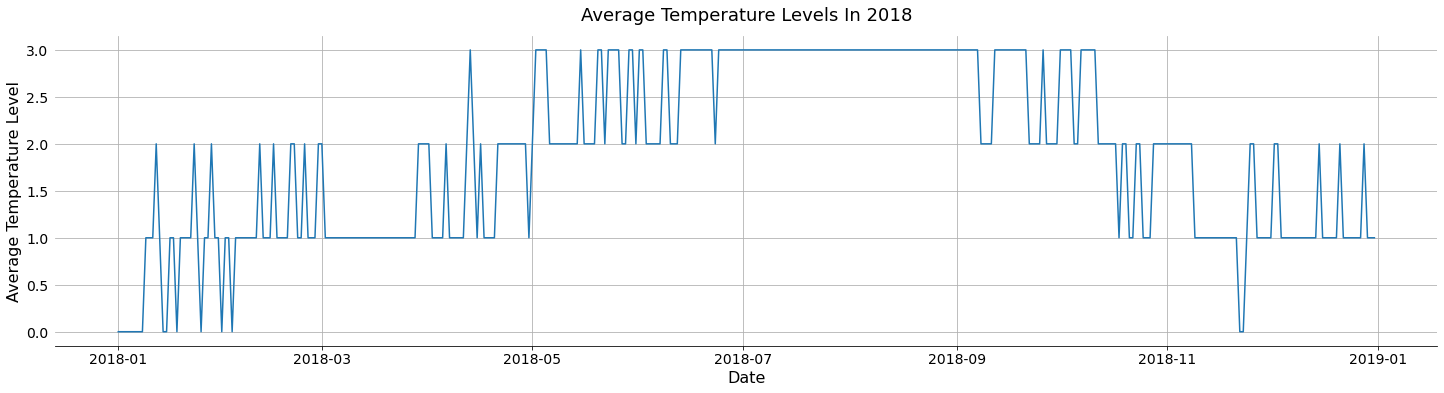

In [14]:
# Display a lineplot of average temperature vs day of year
plot_lineplot(
    weather_df,
    x_var="date",
    y_var="avg_temp_lvl",
    xlabel="Date",
    ylabel="Average Temperature Level",
    title="Average temperature levels in 2018"
)

**Notes:** The line graph above shows the average temperature as a function of date. The hottest days are observed in the summer, while average and low temperatures are observed in the shoulder seasons. The lowest temperatures, on the other hand, are observed only a few days or weeks per year, mainly in January and February. The impact of average temperature on the distance, time and speed of daily taxi trips will be examined below.

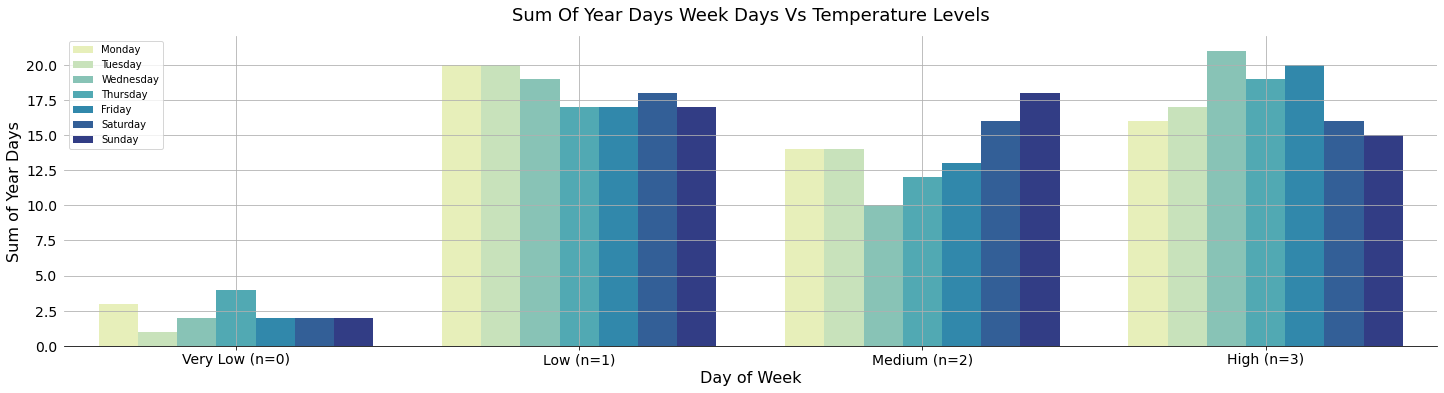

In [15]:
# Add a weekday column to the data frame
weather_df["weekday"] = weather_df["date"].dt.dayofweek

# Group the weather data by weekday and average temperature levels
# Compute the number days with specific average temperatures levels
weather_count_temp = (
    weather_df.groupby(["weekday", "avg_temp_lvl"]).size().to_frame("count").reset_index()
)

# Replace numerical values by the name of the categories
weather_count_temp["avg_temp_lvl"] = weather_count_temp["avg_temp_lvl"].map(
    dict(zip(np.arange(0, 4), ["Very Low (n=0)", "Low (n=1)", "Medium (n=2)", "High (n=3)"]))
)

# Replace numerical values by the name of the categories
weather_count_temp["weekday"] = weather_count_temp["weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a barplot of sum of year days week days vs temperature levels for all weekdays
plot_barplot(
    weather_count_temp,
    x_var="avg_temp_lvl",
    y_var="count",
    labels="weekday",
    xlabel="Day of Week",
    ylabel="Sum of Year Days",
    title="sum of year days week days vs temperature levels"
)

**Note:** The barplot above shows the sum of days in the year that fall into one of the average temperature category. Although much rarer than the low to high temperature days, days with very low temperature still  encompass all days of the week with more or less the same frequency. This is noteworthy since the number of taxi trips, their distance, duration, and speed are all highly dependent on the day of the week and hour of the day.

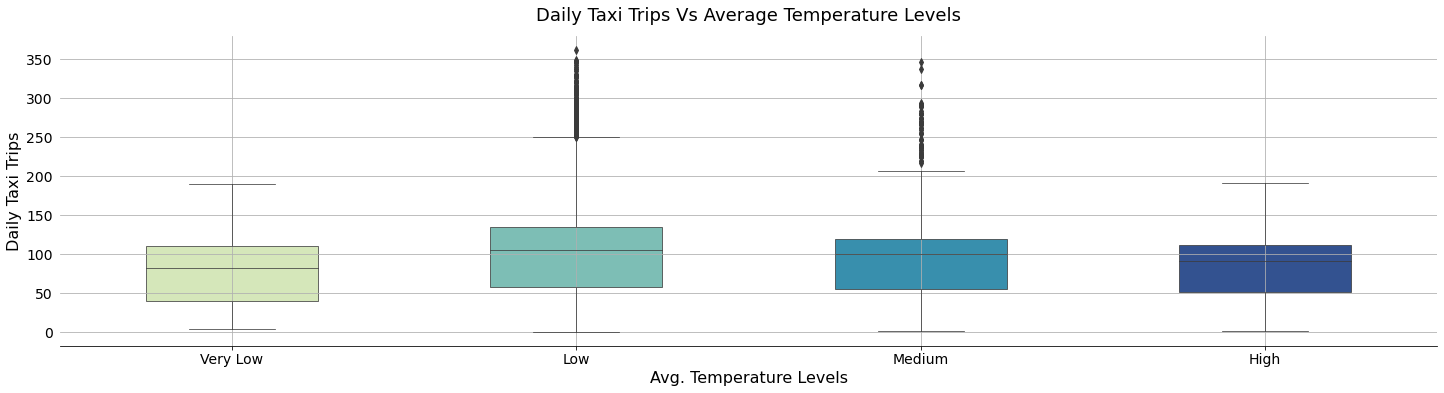

In [16]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature
# Compute the number of daily trip
pickup_count_temp = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_avg_temp_lvl"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_temp["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_temp["wf_avg_temp_lvl"] = pickup_count_temp["wf_avg_temp_lvl"].map(
    dict(zip(np.arange(0, 4), ["Very Low", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_temp["pickup_weekday"] = pickup_count_temp["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a boxplot of daily taxi trips vs average temperature levels
plot_boxplot(
    pickup_count_temp,
    x_var="wf_avg_temp_lvl",
    y_var="count",
    xlabel="Avg. Temperature Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs average temperature levels"
)

**Notes:** The boxplot above show the average number of daily taxi trips for each average temperature level. The average number of daily rides is slightly lower for days with very low temperatures. This could suggest that the daily routines of New Yorkers change on  very cold days. It could also be an artifact, as these very cold days occur primarily in January and February.

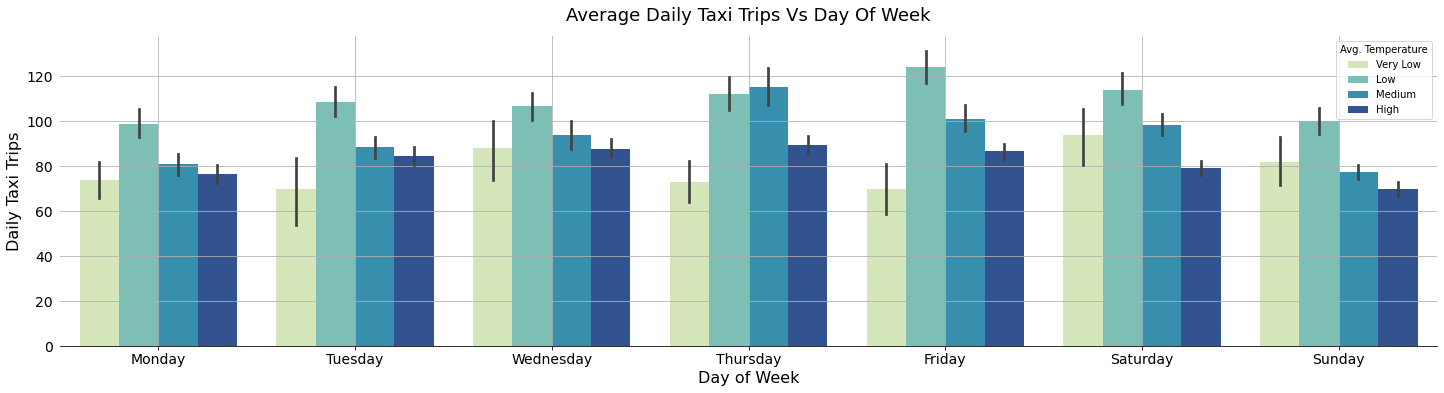

In [17]:
# Display a barplot of average daily taxi trips vs day of week for all average temperature levels
plot_barplot(
    pickup_count_temp,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="Avg. Temperature",
    title="average daily taxi trips vs day of week"
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each average temperature level. The average number of daily trips is slightly lower for very low and high temperatures especially on Thursdays and Fridays, but the exact cause is not clear. In contrast, days with low temperature show a significant increase in daily taxi trips.

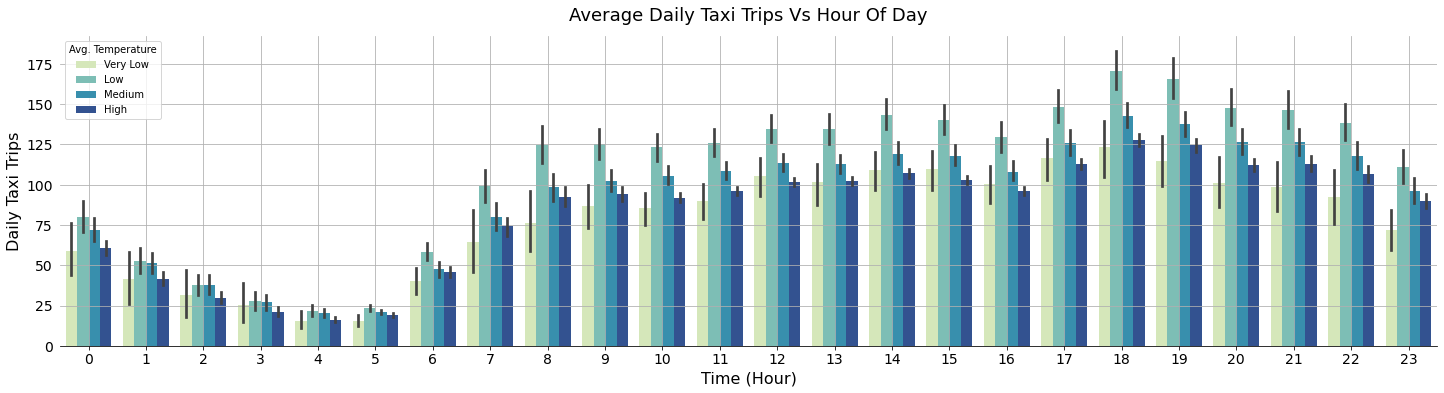

In [18]:
# Display a barplot of average daily taxi trips vs hour of day for all average temperature levels
plot_barplot(
    pickup_count_temp,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="Avg. Temperature",
    title="average daily taxi trips vs hour of day"
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each average temperature level. The average number of daily trips is slightly lower for very low and high temperature during the peak hours. The exact cause is not clear, yet high temperatures may encourage the use of alternative means of transportation such as walking and cycling.

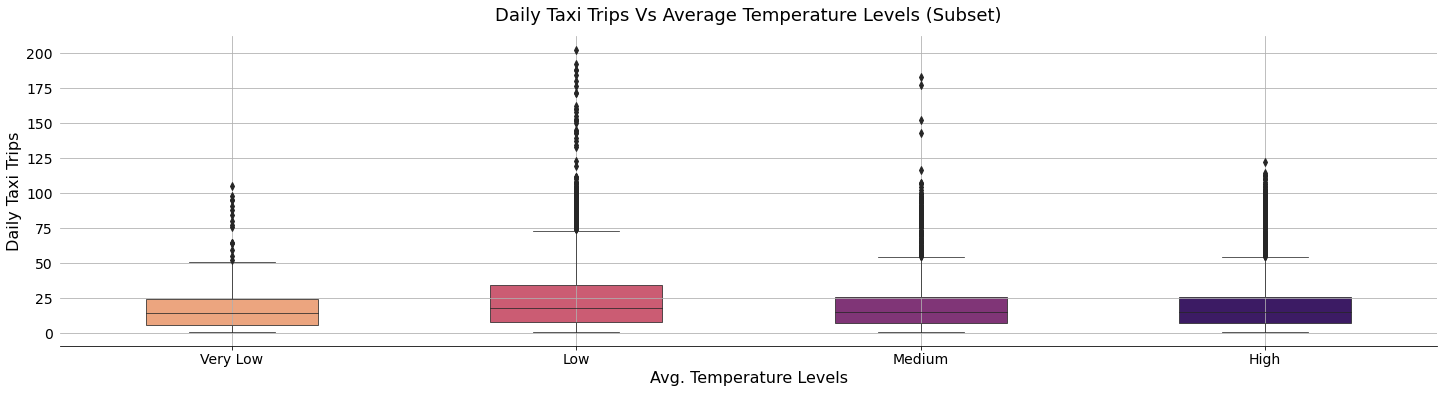

In [19]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature
# Compute the number of daily trip
pickup_count_temp_sub = (
    train_sub_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_avg_temp_lvl"]
    )
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_temp_sub["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_temp_sub["wf_avg_temp_lvl"] = pickup_count_temp_sub["wf_avg_temp_lvl"].map(
    dict(zip(np.arange(0, 4), ["Very Low", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_temp_sub["pickup_weekday"] = pickup_count_temp_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a boxplot of daily taxi trips vs average temperature levels
plot_boxplot(
    pickup_count_temp_sub,
    x_var="wf_avg_temp_lvl",
    y_var="count",
    xlabel="Avg. Temperature Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs average temperature levels (subset)",
    palette="magma_r",
)

**Notes:** The boxplot above show the average number of daily taxi trips for each average temperature level. In the taxi trips subset, the average number of daily rides is also slightly lower for days with very low temperatures in the taxi trip subset.

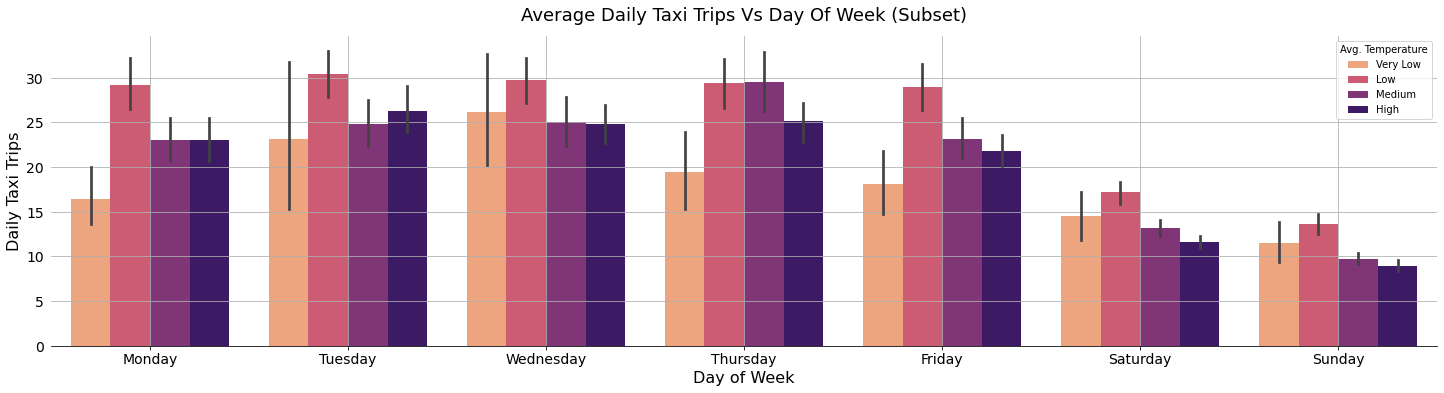

In [20]:
# Display a barplot of average daily taxi trips vs day of week for all average temperature levels
plot_barplot(
    pickup_count_temp_sub,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="Avg. Temperature",
    title="average daily taxi trips vs day of week (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each average temperature level. In the taxi trips subset, the average number of daily trips is also slightly lower for very low and high temperatures especially on Thursdays and Fridays, but slightly higer for a few weekdays with low temperature.

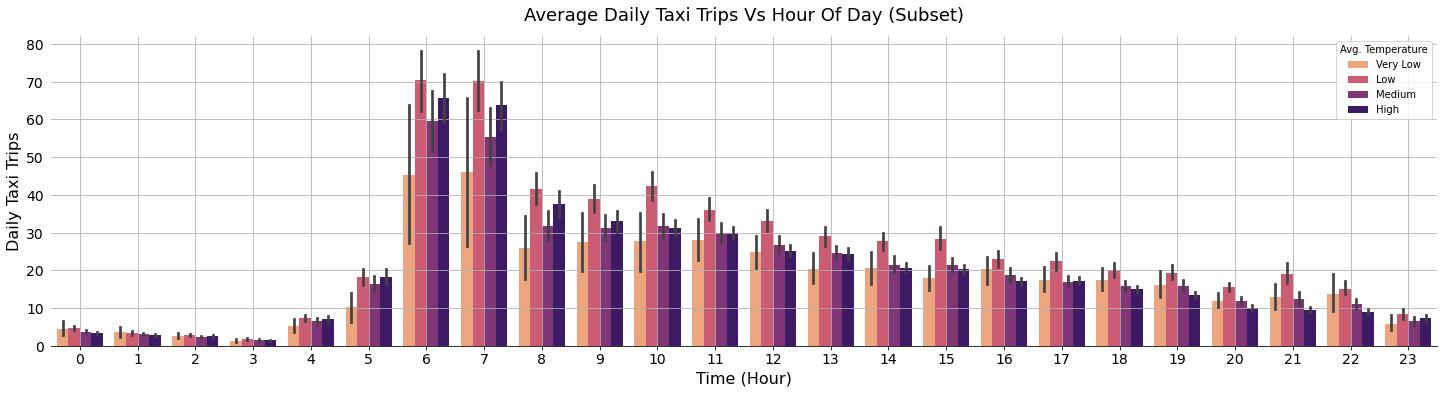

In [21]:
# Display a barplot of average daily taxi trips vs hour of day for all average temperature levels
plot_barplot(
    pickup_count_temp_sub,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="Avg. Temperature",
    title="average daily taxi trips vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each average temperature level. In the taxi trips subset, the average number of daily trips is marginally lower for very low temperature early morning in the taxi trip subset.

In [22]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature levels
# Compute the mean of trip distances and durations
pickup_wf_avg_temp_lvl = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_avg_temp_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_wf_avg_temp_lvl["trip_speed"] = np.divide(
    pickup_wf_avg_temp_lvl["trip_distance"], np.divide(pickup_wf_avg_temp_lvl["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_wf_avg_temp_lvl["wf_avg_temp_lvl"] = pickup_wf_avg_temp_lvl["wf_avg_temp_lvl"].map(
    dict(zip(np.arange(0, 4), ["Very Low", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_wf_avg_temp_lvl["pickup_weekday"] = pickup_wf_avg_temp_lvl["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_wf_avg_temp_lvl[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8759.000000    8759.000000  8759.000000
mean        4.527946      12.903568    21.884770
std         1.191982       2.456410     7.048098
min         1.609340       4.280952     6.325601
25%         3.757973      11.220652    16.110745
50%         4.247400      12.811538    20.315860
75%         4.970132      14.530928    26.433480
max        16.103458      27.379333    56.125353

In [23]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature levels
# Compute the mean of trip distances and durations
pickup_wf_avg_temp_lvl_sub = (
    train_sub_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_avg_temp_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_wf_avg_temp_lvl_sub["trip_speed"] = np.divide(
    pickup_wf_avg_temp_lvl_sub["trip_distance"], np.divide(pickup_wf_avg_temp_lvl_sub["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_wf_avg_temp_lvl_sub["wf_avg_temp_lvl"] = pickup_wf_avg_temp_lvl_sub["wf_avg_temp_lvl"].map(
    dict(zip(np.arange(0, 4), ["Very Low", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_wf_avg_temp_lvl_sub["pickup_weekday"] = pickup_wf_avg_temp_lvl_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_wf_avg_temp_lvl_sub[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8473.000000    8473.000000  8473.000000
mean        2.057241      10.448869    14.581679
std         0.192553       4.762699     6.765805
min         0.804670       2.000000     3.809506
25%         1.961671       6.375000     8.786640
50%         2.065776       9.457143    13.153260
75%         2.153128      14.131579    19.482481
max         3.266960      27.461538    56.487834

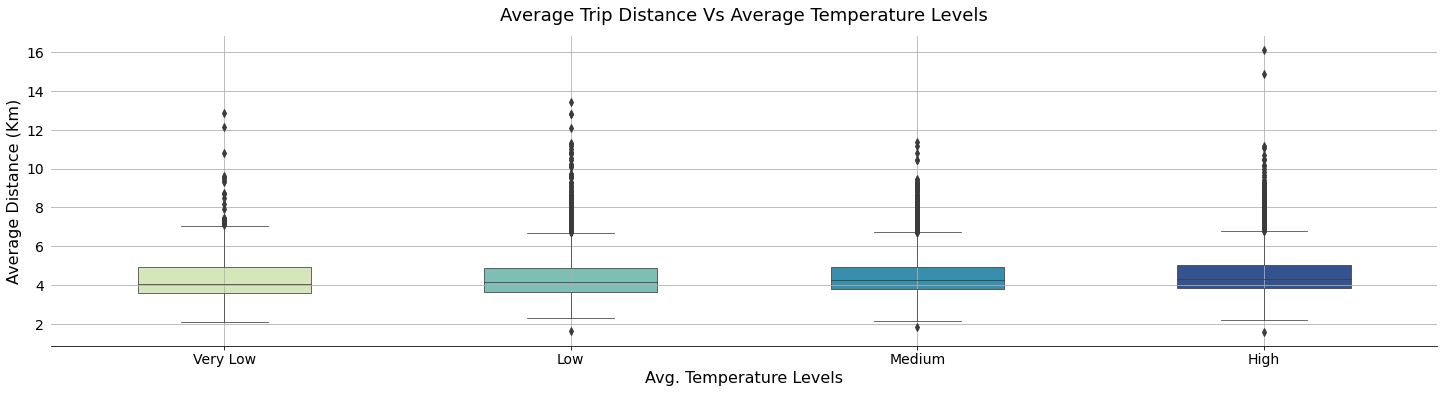

In [24]:
# Display a boxplot of average trip distance vs average temperature levels
plot_boxplot(
    pickup_wf_avg_temp_lvl,
    x_var="wf_avg_temp_lvl",
    y_var="trip_distance",
    xlabel="Avg. Temperature Levels",
    ylabel="Average Distance (Km)",
    title="average trip distance vs average temperature levels",
)

**Notes:** the boxplot above shows the average daily distance traveled for each average temperature level. No significant difference could be observed between these different levels.

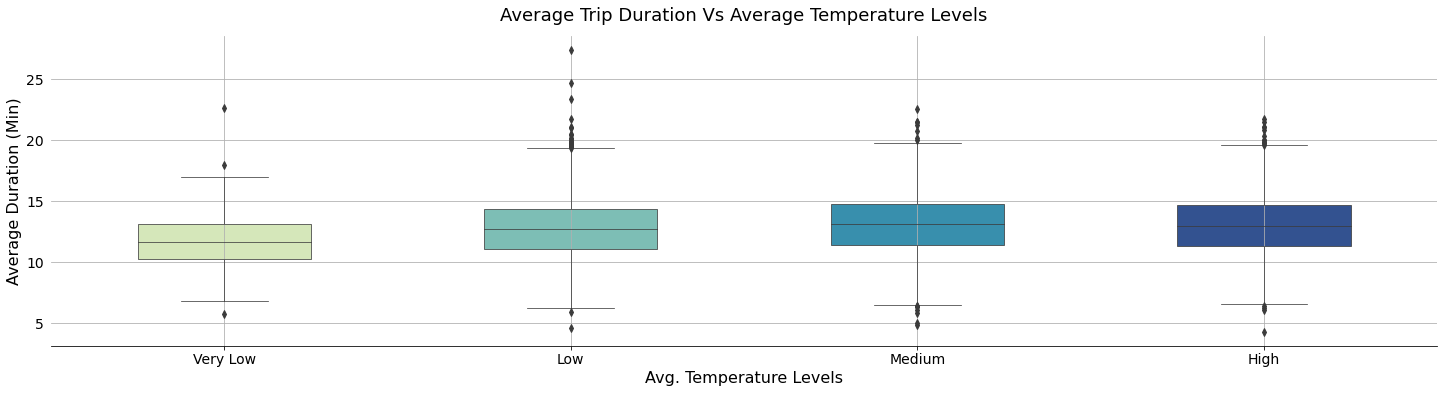

In [25]:
# Display a boxplot of average trip duration vs average temperature levels
plot_boxplot(
    pickup_wf_avg_temp_lvl,
    x_var="wf_avg_temp_lvl",
    y_var="trip_duration",
    xlabel="Avg. Temperature Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs average temperature levels",
)

**Notes:** the boxplot above shows the average daily travel duration for each average temperature level. No significant difference could be observed between these different levels, yet the average travel duration appears to be marginally lower for very low temperatures.

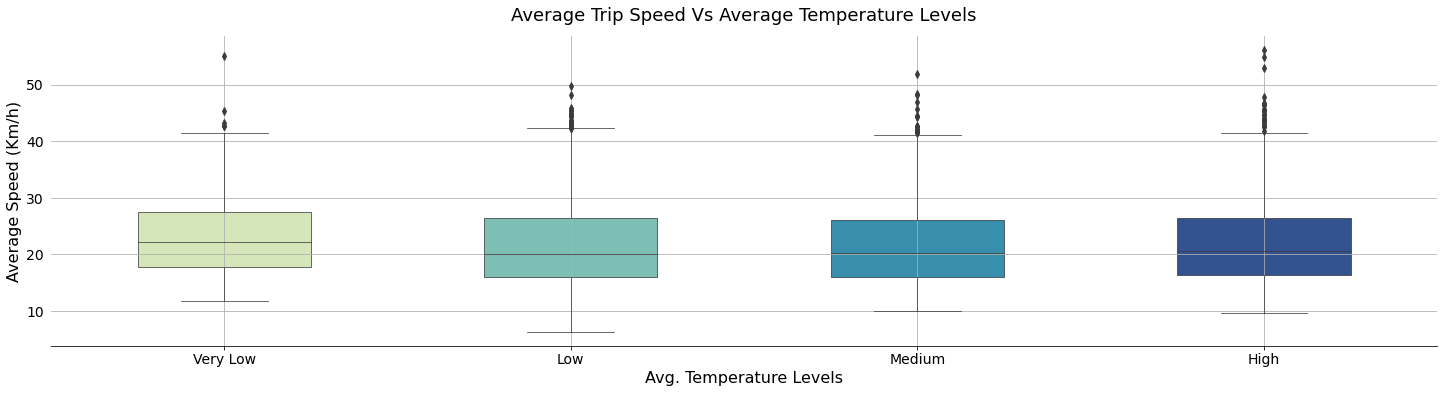

In [26]:
# Display a boxplot of average trip speed vs average temperature levels
plot_boxplot(
    pickup_wf_avg_temp_lvl,
    x_var="wf_avg_temp_lvl",
    y_var="trip_speed",
    xlabel="Avg. Temperature Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs average temperature levels",
)

**Notes:** the boxplot above shows the average daily travel speed for each average temperature level. No significant difference could be observed between these different levels, yet the average travel speed appears to be marginally higher for very low temperatures.

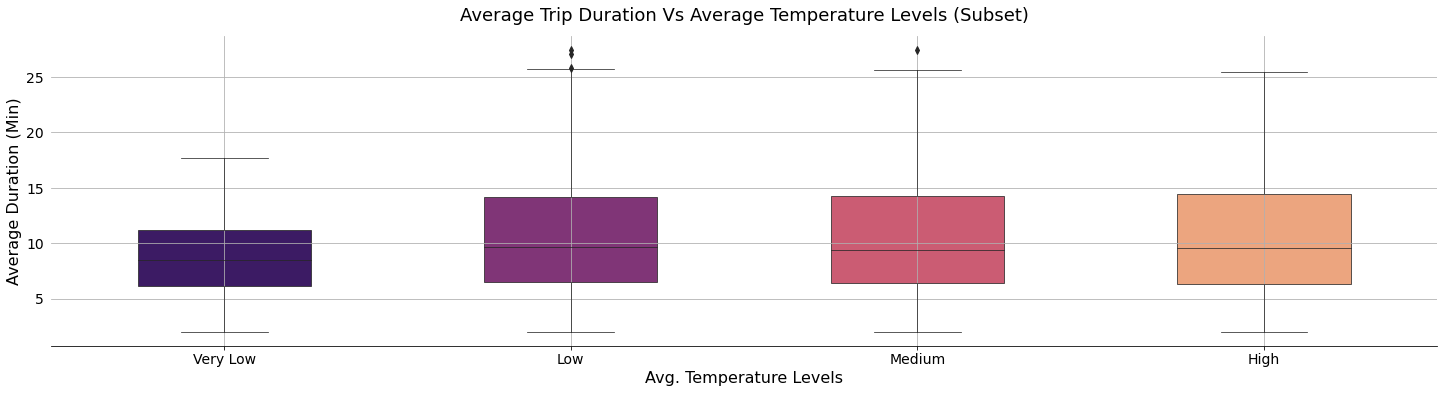

In [27]:
# Display a boxplot of average trip duration vs average temperature levels
plot_boxplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="wf_avg_temp_lvl",
    y_var="trip_duration",
    xlabel="Avg. Temperature Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs average temperature levels (subset)",
    palette="magma",
)

**Notes:** the boxplot above shows the average daily travel duration for each average temperature level. In the taxi trips subset, no significant difference could be observed between these different levels, yet the average travel duration appears to be marginally lower for very low temperatures.

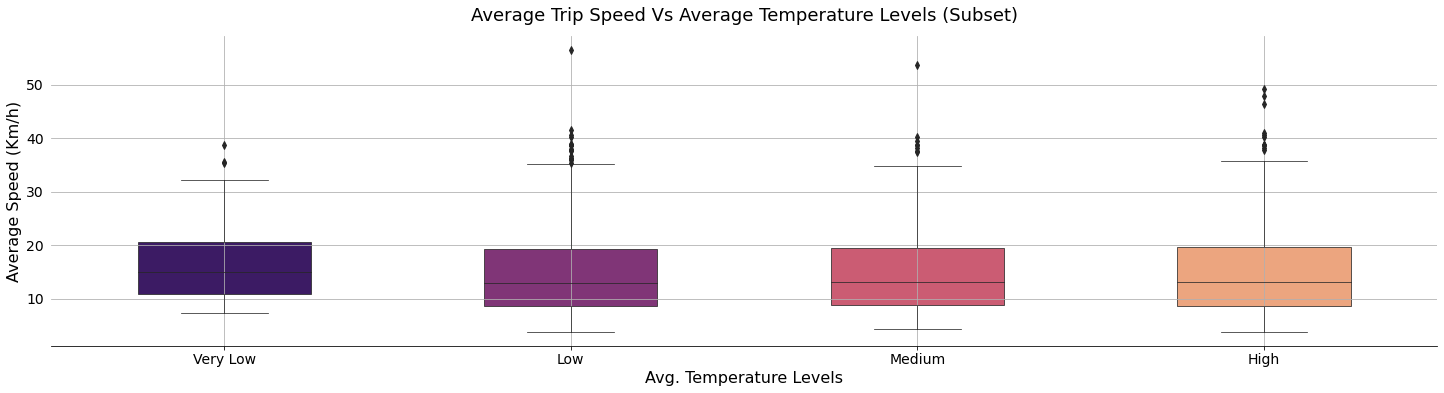

In [28]:
# Display a boxplot of average trip speed vs average temperature levels
plot_boxplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="wf_avg_temp_lvl",
    y_var="trip_speed",
    xlabel="Avg. Temperature Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs average temperature levels (subset)",
    palette="magma",
)

**Notes:** the boxplot above shows the average daily travel duration for each average temperature level. In the taxi trips subset, no significant difference could be observed between these different levels.

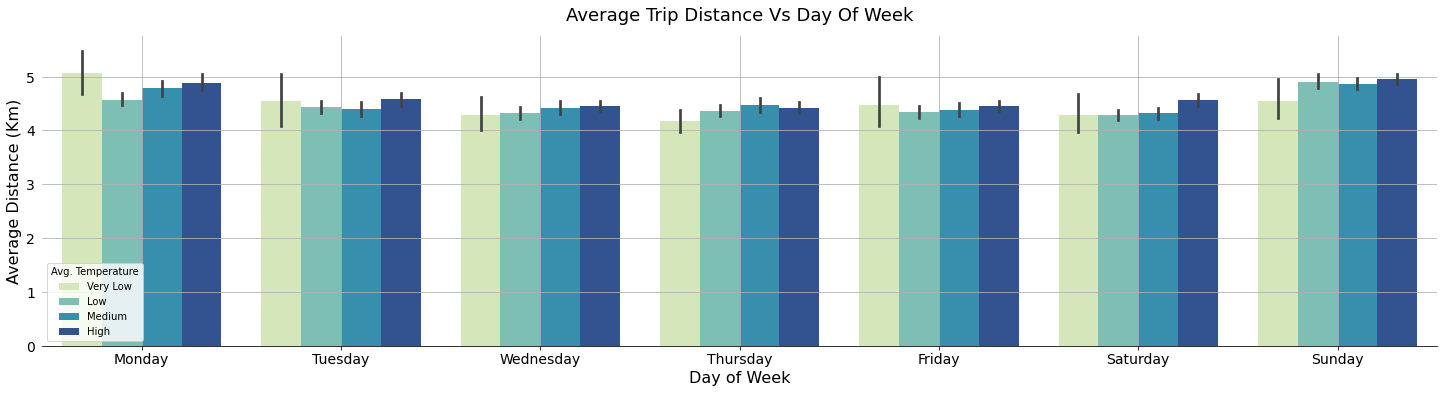

In [29]:
# Display a barplot of average trip distance vs day of week for all average temperature levels
plot_barplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_weekday",
    y_var="trip_distance",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Average Distance (Km)",
    legend="Avg. Temperature",
    title="average trip distance vs day of week",
)

**Notes:** the barplot above shows the average daily travel duration for each average temperature level. No major or minor difference could be observed between these different levels.

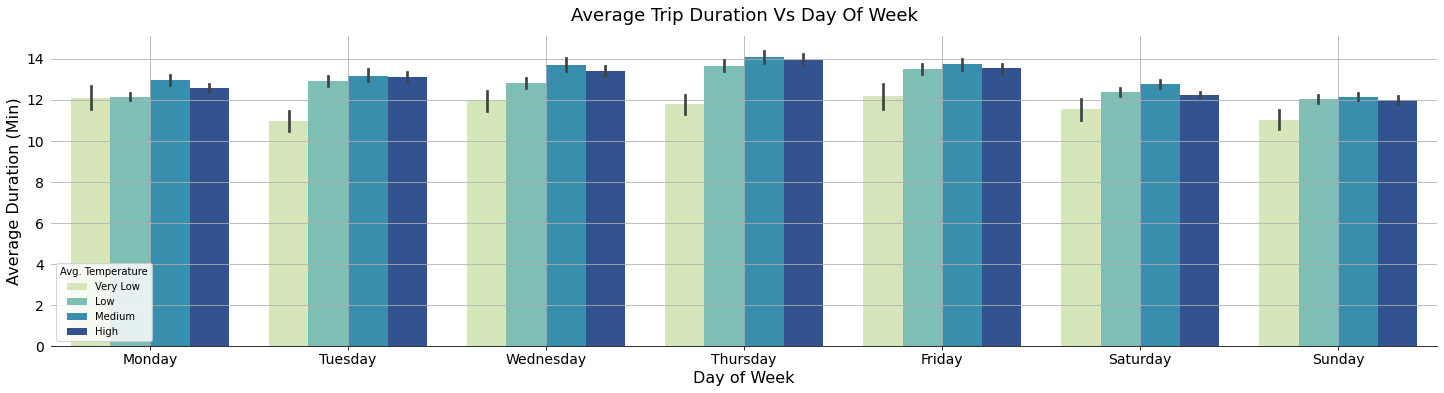

In [30]:
# Display a barplot of average trip duration vs day of week for all average temperature levels
plot_barplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Average Duration (Min)",
    legend="Avg. Temperature",
    title="average trip duration vs day of week",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and average temperature level. No significant difference could be observed between these different temperature levels, yet the average travel duration appears to be marginally lower for very low temperatures for most day of the week.

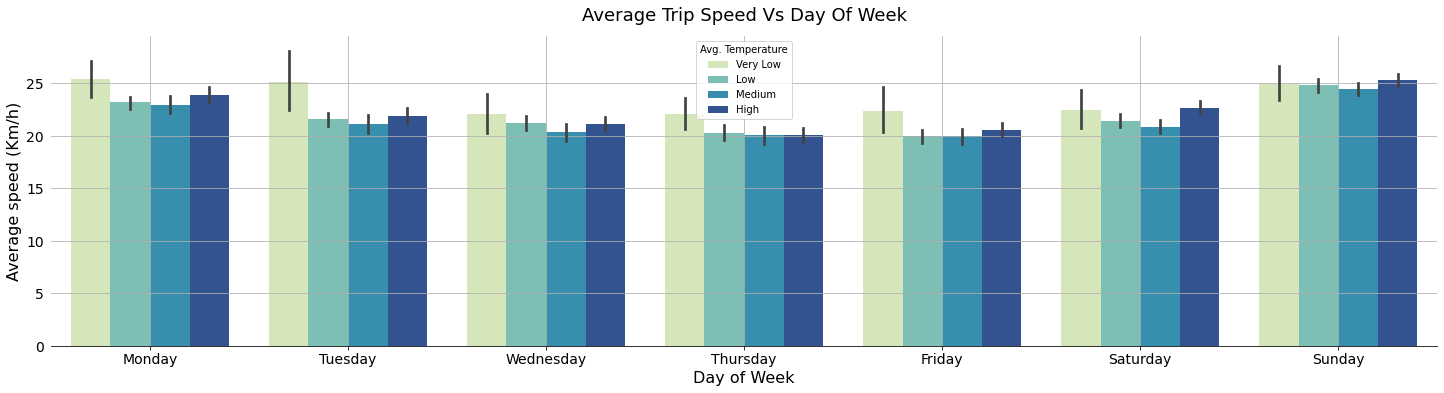

In [31]:
# Display a barplot of average trip speed vs day of week for all average temperature levels
plot_barplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Average speed (Km/h)",
    legend="Avg. Temperature",
    title="average trip speed vs day of week",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and average temperature levels. No significant difference could be observed between these different temperature levels, yet the average travel speed appears to be marginally higher for very low temperatures for most day of the week.

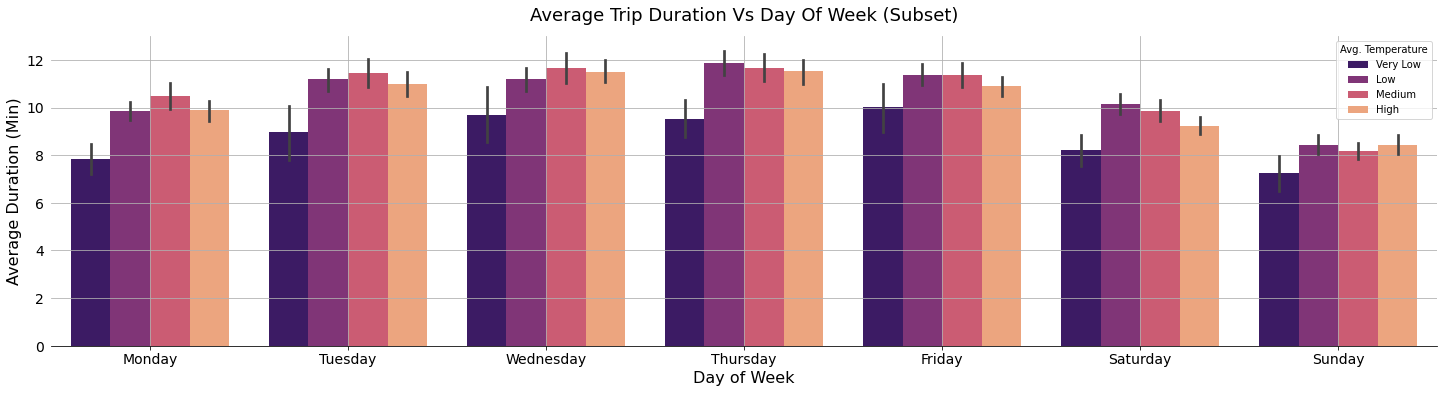

In [32]:
# Display a barplot of average trip duration vs day of week for all average temperature levels
plot_barplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Average Duration (Min)",
    legend="Avg. Temperature",
    title="average trip duration vs day of week (subset)",
    palette="magma",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and average temperature level. In the taxi trips subset, the average travel duration also appears to be lower for very low temperatures for most day of the week. Very low average temperature thus affect traffic on a global and more localised scale.

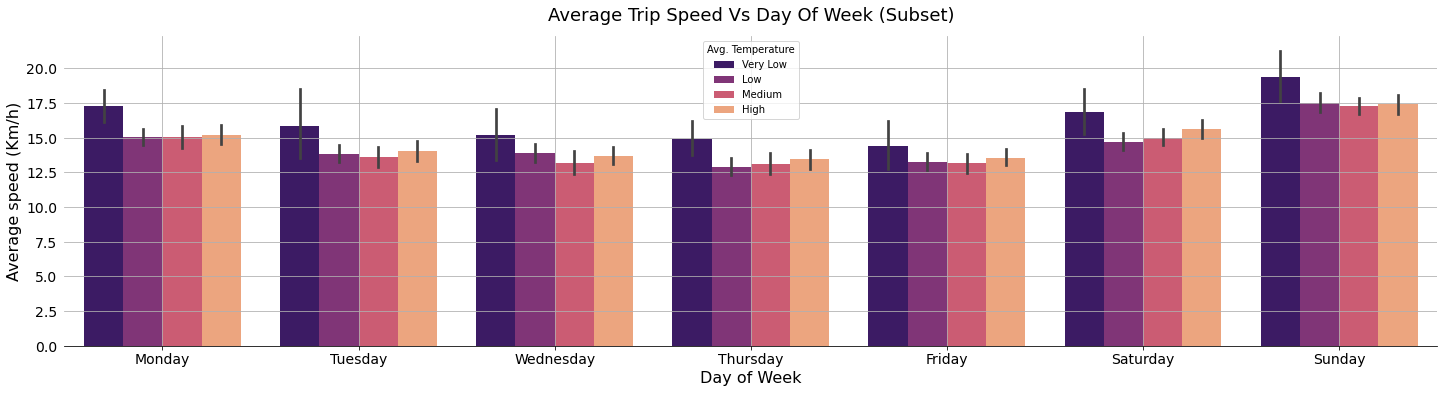

In [33]:
# Display a barplot of average trip speed vs day of week for all average temperature levels
plot_barplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_avg_temp_lvl",
    xlabel="Day of Week",
    ylabel="Average speed (Km/h)",
    legend="Avg. Temperature",
    title="average trip speed vs day of week (subset)",
    palette="magma",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and average temperature levels. In the taxi trips subset, the average travel speed also appears to be higher for very low temperatures for most day of the week.

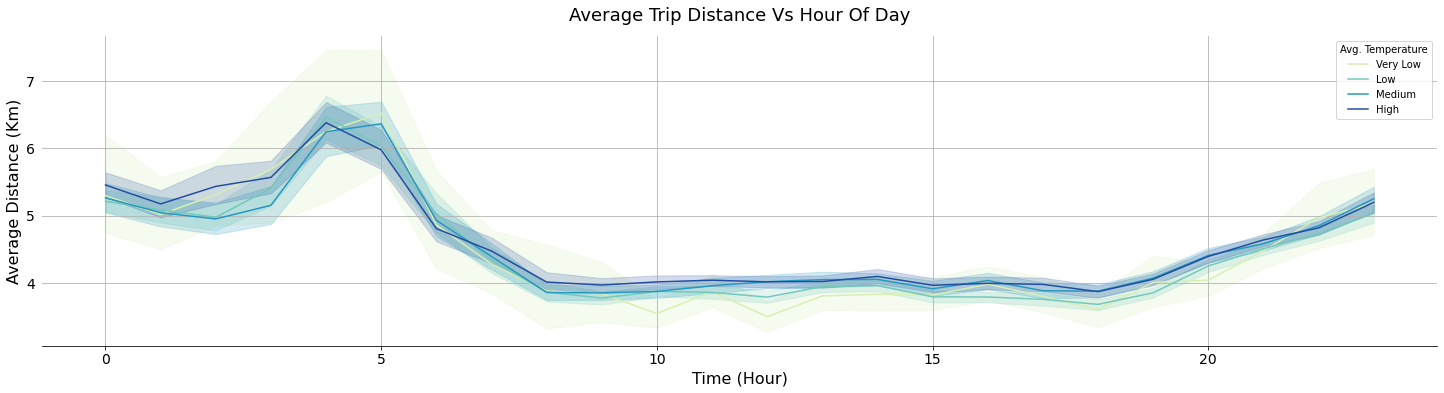

In [34]:
# Display a lineplot of average trip distance vs hour of day for all average temperature levels
plot_lineplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Distance (Km)",
    legend="Avg. Temperature",
    title="average trip distance vs hour of day",
)

**Notes:** the lineplot above shows the average daily distance traveled for each hour of the day and average temperature level. No difference could be observed between these different levels, indicating that New Yorkers tend to maintain the same travel patterns regardless of temperature.

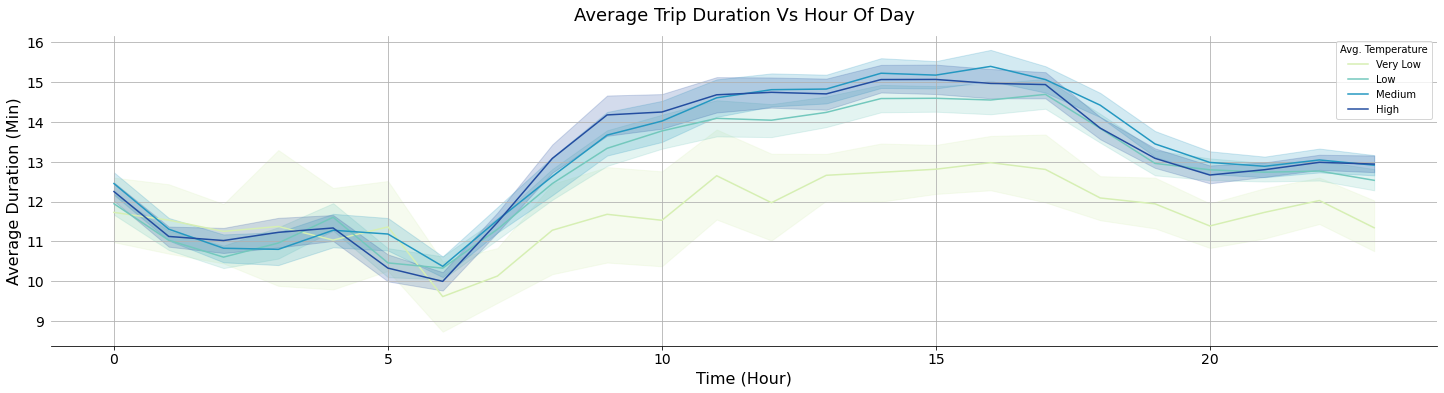

In [35]:
# Display a lineplot of average trip duration vs hour of day for all average temperature levels
plot_lineplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="Avg. Temperature",
    title="average trip duration vs hour of day",
)

**Notes:** The line plot above shows the average daily travel time for each hour of the day and average temperature level. The average travel time is lower during peak hours for days with very low temperatures. Knowing that no difference was found in travel time between each level, this could indicate that traffic is more fluid on very cold days. The exact causes are probably multiple and complex. We also cannot completely rule out the possibility that this observation is an artifact, as these cold days occur mainly in January and February.

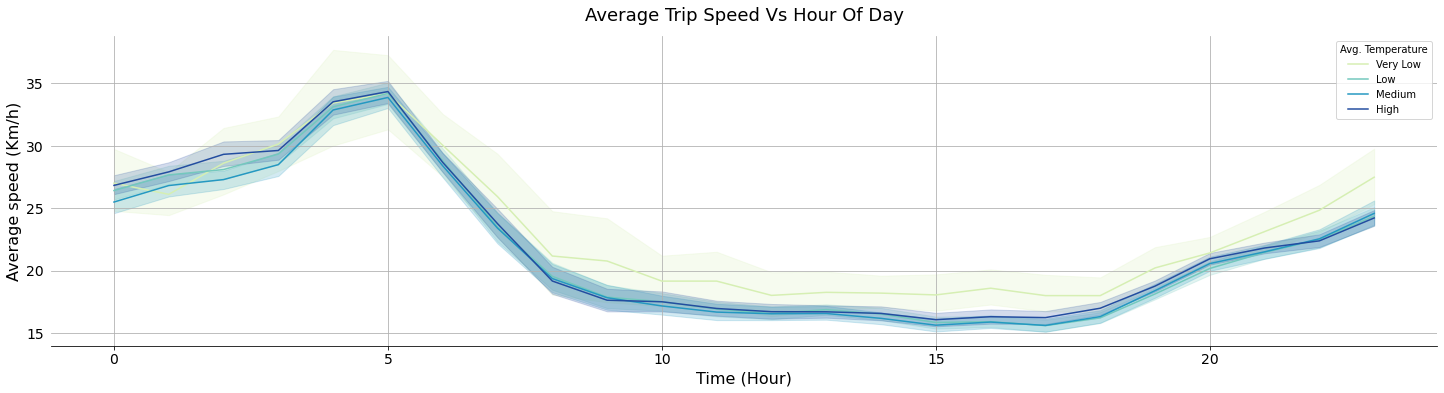

In [36]:
# Display a lineplot of average trip speed vs hour of day for all average temperature levels
plot_lineplot(
    pickup_wf_avg_temp_lvl,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="Avg. Temperature",
    title="average trip speed vs hour of day",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and average temperature levels. The average travel speed is marginally higher during peak hours for days with very low temperatures. As previously stated this could indicate that traffic is more fluid on very cold days, but the possibility that this observation is an artifact can also not be ruled out.

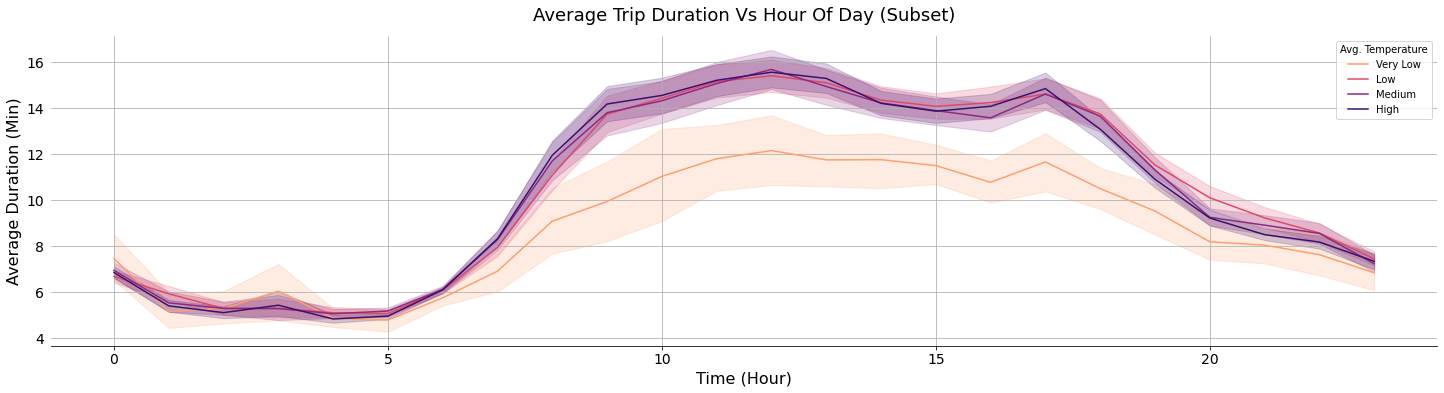

In [37]:
# Display a lineplot of average trip duration vs hour of day for all average temperature levels
plot_lineplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="Avg. Temperature",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** The line plot above shows the average daily travel time for each hour of the day and each average temperature level. In the taxi trips subset, the average travel time is lower during peak hours for days with very low temperatures. As noted previously, this indicates that traffic is probably more fluid on very cold days. However, we still cannot rule out the possibility that this observation is an artifact, as these cold days occur mainly in January and February.

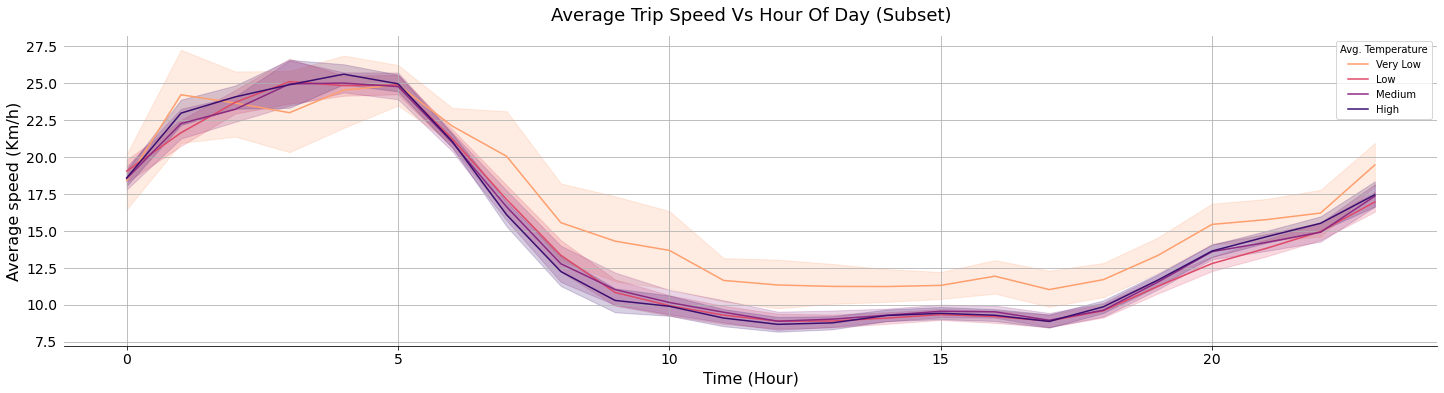

In [38]:
# Display a lineplot of average trip speed vs hour of day for all average temperature levels
plot_lineplot(
    pickup_wf_avg_temp_lvl_sub,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_avg_temp_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="Avg. Temperature",
    title="average trip speed vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and average temperature levels.  In the taxi trips subset, the average travel speed is also marginally higher during peak hours for days with very low temperatures.

### Weather Data: Precipitations

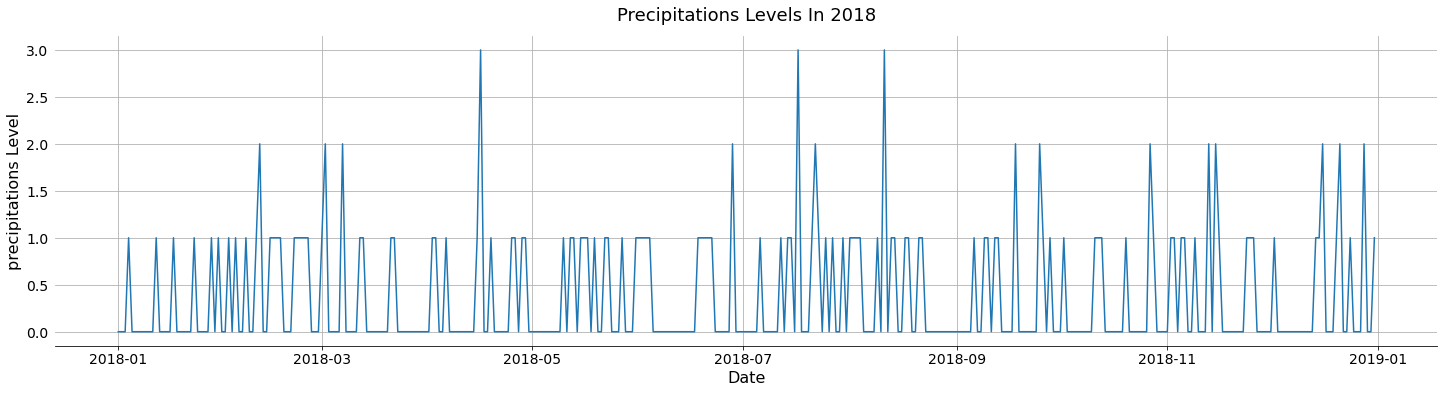

In [39]:
# Display a lineplot of precipitations vs day of year
plot_lineplot(
    weather_df,
    x_var="date",
    y_var="prec_lvl",
    xlabel="Date",
    ylabel="precipitations Level",
    title="precipitations levels in 2018"
)

**Notes:** The line plot above shows the daily precipitations levels as a function of the date. The lowest precipitations levels occur frequently throughout the year, while the highest precipitations levels occur only on a few occasions. The impact of average temperature on the distance, time and speed of daily taxi trips will be discussed below.

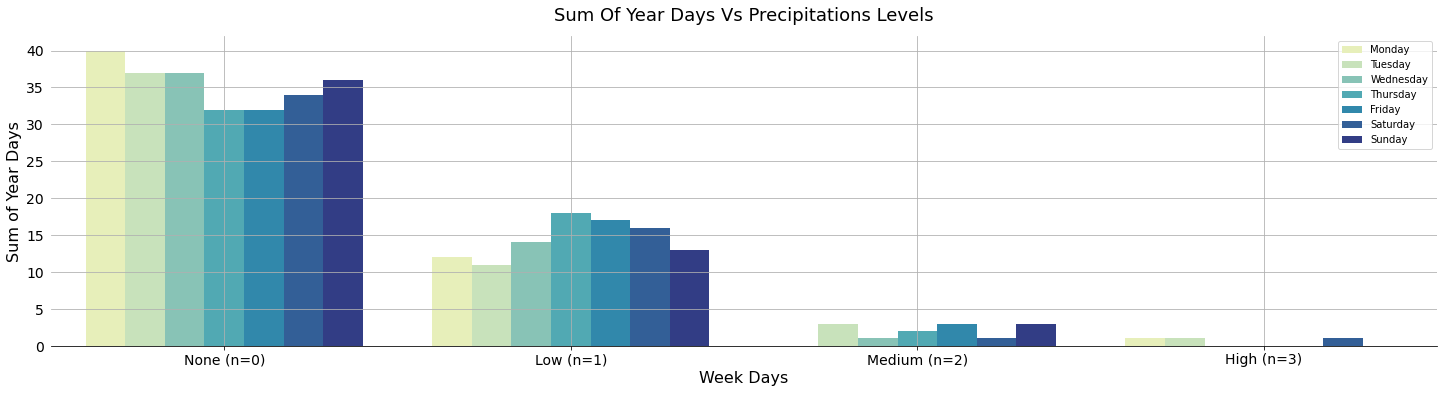

In [40]:
# Group the weather data by weekday and precipitations levels
# Compute the number days with specific precipitations levels
weather_count_wf_prec_lvl = (
    weather_df.groupby(["weekday", "prec_lvl"]).size().to_frame("count").reset_index()
).sort_values(["prec_lvl", "weekday"])

# Replace numerical values by the name of the categories
weather_count_wf_prec_lvl["prec_lvl"] = weather_count_wf_prec_lvl["prec_lvl"].map(
    dict(
        zip(np.arange(0, 4), ["None (n=0)", "Low (n=1)", "Medium (n=2)", "High (n=3)"])
    )
)

# Replace numerical values by the name of the categories
weather_count_wf_prec_lvl["weekday"] = weather_count_wf_prec_lvl["weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a barplot sum of year days vs precipitations levels for all week days
plot_barplot(
    weather_count_wf_prec_lvl,
    x_var="prec_lvl",
    y_var="count",
    labels="weekday",
    xlabel="Week Days",
    ylabel="Sum of Year Days",
    title="sum of year days vs precipitations levels",
)

**Note:** The barplot above shows the sum of days in the year that fall into one of the daily precipitations cateogry. Although much less frequent than days with a low precipitations level, days with a medium wf_prec_lvlipiation level still encompass all days of the week with more or less the same frequency. However, days with a high precipitations level are rare and only emcompass a few week days. This is noteworthy since the number of taxi trips, their distance, duration, and speed are all highly dependent on the day of the week and hour of the day.

**Warnings:** The results obtained for a high level of precipitations should be interpreted with caution.

In [41]:
# Group taxi trips by pickup year-day, week-day, hour, and precipitations levels
# Compute the number of daily trip
pickup_count_wf_prec_lvl = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_prec_lvl"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_wf_prec_lvl["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_wf_prec_lvl["wf_prec_lvl"] = pickup_count_wf_prec_lvl["wf_prec_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_wf_prec_lvl["pickup_weekday"] = pickup_count_wf_prec_lvl["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_wf_prec_lvl.head()

pickup_yearday pickup_weekday  pickup_hour wf_prec_lvl  count
0               1         Monday            0        None    117
1               1         Monday            1        None    104
2               1         Monday            2        None    117
3               1         Monday            3        None     88
4               1         Monday            4        None     43

In [42]:
# Group taxi trips by pickup year-day, week-day, hour, and precipitations levels
# Compute the number of daily trip
pickup_count_wf_prec_lvl_sub = (
    train_sub_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_prec_lvl"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_wf_prec_lvl_sub["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_wf_prec_lvl_sub["wf_prec_lvl"] = pickup_count_wf_prec_lvl_sub["wf_prec_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_wf_prec_lvl_sub["pickup_weekday"] = pickup_count_wf_prec_lvl_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_wf_prec_lvl_sub.head()

pickup_yearday pickup_weekday  pickup_hour wf_prec_lvl  count
0               1         Monday            0        None      3
1               1         Monday            1        None      6
2               1         Monday            2        None      6
3               1         Monday            3        None      3
4               1         Monday            5        None      2

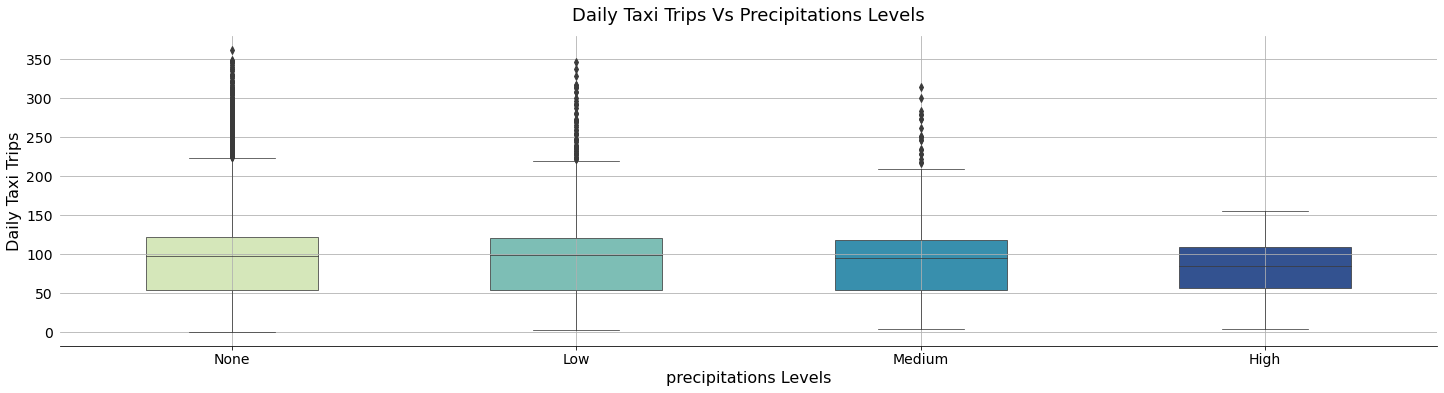

In [43]:
# Display a boxplot of daily taxi trips vs precipitations levels
plot_boxplot(
    pickup_count_wf_prec_lvl,
    x_var="wf_prec_lvl",
    y_var="count",
    xlabel="precipitations Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs precipitations levels",
)

**Notes:** The boxplot above show the average number of daily taxi trips for each precipitations level. No clear difference can be observed between the different precipitations levels.

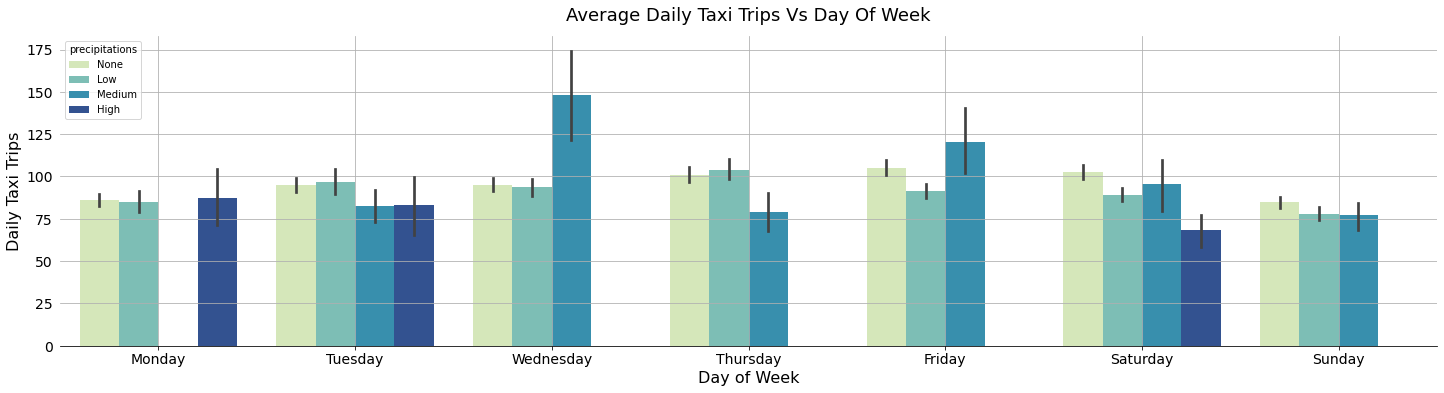

In [44]:
# Display a barplot of average daily taxi trips vs day of week for all precipitations levels
plot_barplot(
    pickup_count_wf_prec_lvl,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_prec_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="precipitations",
    title="average daily taxi trips vs day of week",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each precipitations level. No clear difference can be observed between the different precipitations levels.

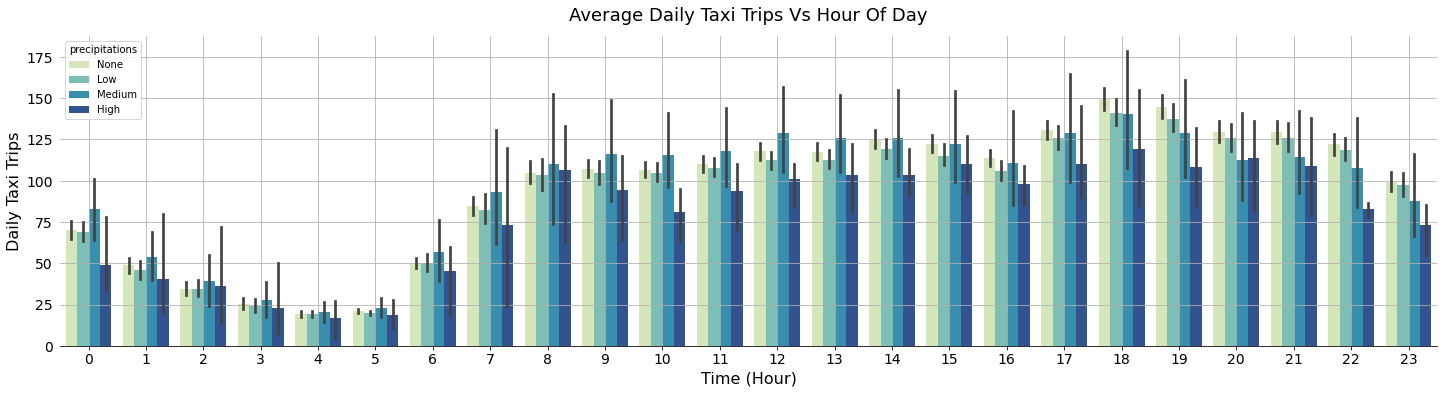

In [45]:
# Display a barplot of average daily taxi trips vs hour of day for all precipitations levels
plot_barplot(
    pickup_count_wf_prec_lvl,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="precipitations",
    title="average daily taxi trips vs hour of day",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each precipitations level. No clear difference can be observed between the different precipitations levels.

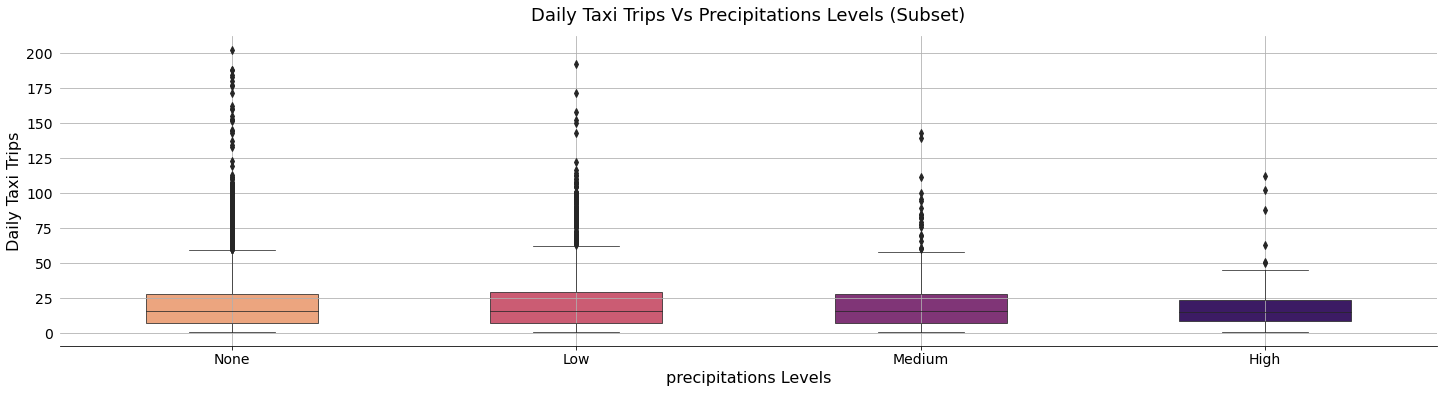

In [46]:
# Display a boxplot of daily taxi trips vs precipitations levels
plot_boxplot(
    pickup_count_wf_prec_lvl_sub,
    x_var="wf_prec_lvl",
    y_var="count",
    xlabel="precipitations Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs precipitations levels (subset)",
    palette="magma_r",
)

**Notes:** The boxplot above show the average number of daily taxi trips for each precipitations level.  In the taxi trips subset, no clear difference can be observed between the different precipitations levels.

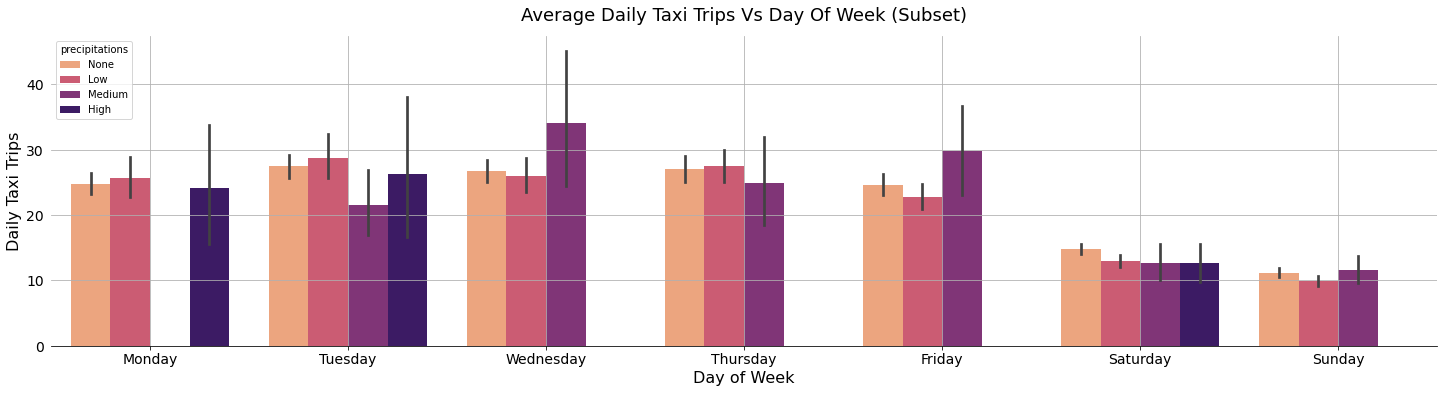

In [47]:
# Display a barplot of average daily taxi trips vs day of week for all precipitations levels
plot_barplot(
    pickup_count_wf_prec_lvl_sub,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_prec_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="precipitations",
    title="average daily taxi trips vs day of week (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each precipitations level. In the taxi trips subset, no clear difference can be observed between the different precipitations levels.

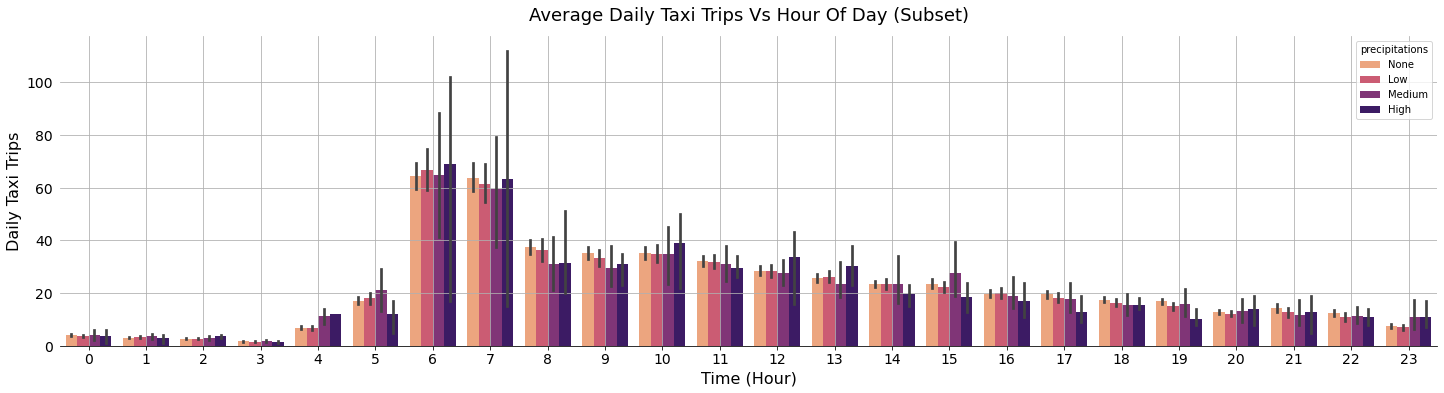

In [48]:
# Display a barplot of average daily taxi trips vs hour of day for all precipitations levels
plot_barplot(
    pickup_count_wf_prec_lvl_sub,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="precipitations",
    title="average daily taxi trips vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each precipitations level. In the taxi trips subset,no clear difference can be observed between the different precipitations levels.

In [49]:
# Group taxi trips by pickup year-day, week-day, hour, and precipitations levels
# Compute the mean of trip distances and durations
pickup_avg_wf_prec_lvl = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_prec_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_avg_wf_prec_lvl["trip_speed"] = np.divide(
    pickup_avg_wf_prec_lvl["trip_distance"], np.divide(pickup_avg_wf_prec_lvl["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_avg_wf_prec_lvl["wf_prec_lvl"] = pickup_avg_wf_prec_lvl["wf_prec_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_wf_prec_lvl["pickup_weekday"] = pickup_avg_wf_prec_lvl["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_wf_prec_lvl[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8759.000000    8759.000000  8759.000000
mean        4.527946      12.903568    21.884770
std         1.191982       2.456410     7.048098
min         1.609340       4.280952     6.325601
25%         3.757973      11.220652    16.110745
50%         4.247400      12.811538    20.315860
75%         4.970132      14.530928    26.433480
max        16.103458      27.379333    56.125353

In [50]:
# Group taxi trips by pickup year-day, week-day, hour, and precipitations levels
# Compute the mean of trip distances and durations
pickup_avg_wf_prec_lvl_sub = (
    train_sub_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_prec_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_avg_wf_prec_lvl_sub["trip_speed"] = np.divide(
    pickup_avg_wf_prec_lvl_sub["trip_distance"],
    np.divide(pickup_avg_wf_prec_lvl_sub["trip_duration"], 60),
)

# Replace numerical values by the name of the categories
pickup_avg_wf_prec_lvl_sub["wf_prec_lvl"] = pickup_avg_wf_prec_lvl_sub["wf_prec_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_wf_prec_lvl_sub["pickup_weekday"] = pickup_avg_wf_prec_lvl_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_wf_prec_lvl_sub[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8473.000000    8473.000000  8473.000000
mean        2.057241      10.448869    14.581679
std         0.192553       4.762699     6.765805
min         0.804670       2.000000     3.809506
25%         1.961671       6.375000     8.786640
50%         2.065776       9.457143    13.153260
75%         2.153128      14.131579    19.482481
max         3.266960      27.461538    56.487834

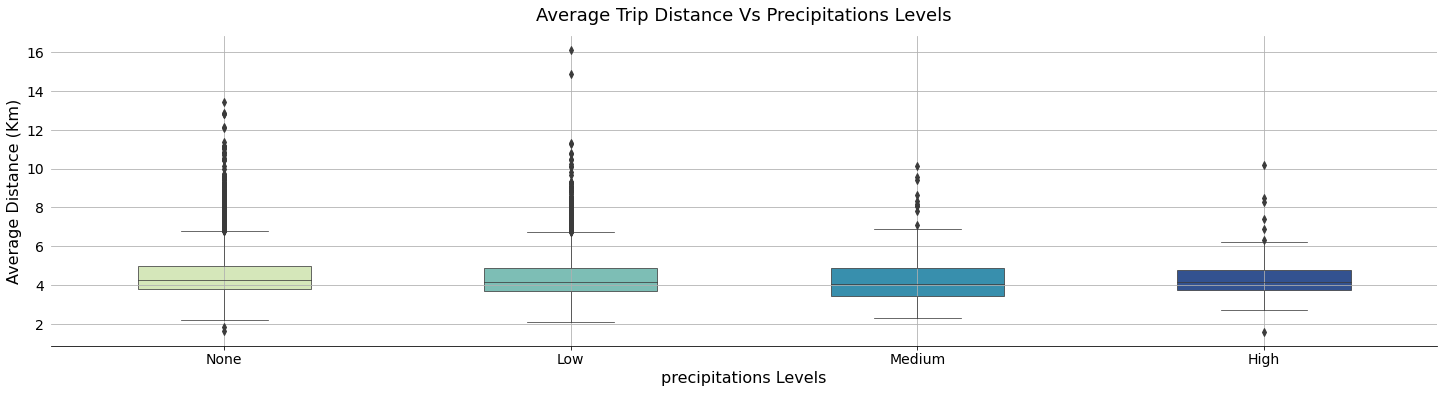

In [51]:
# Display a boxplot of average trip distance vs precipitations levels
plot_boxplot(
    pickup_avg_wf_prec_lvl,
    x_var="wf_prec_lvl",
    y_var="trip_distance",
    xlabel="precipitations Levels",
    ylabel="Average Distance (Km)",
    title="average trip distance vs precipitations levels",
)

**Notes:** the boxplot above shows the average daily distance traveled for each precipitations level. No clear difference could be observed between these different levels.

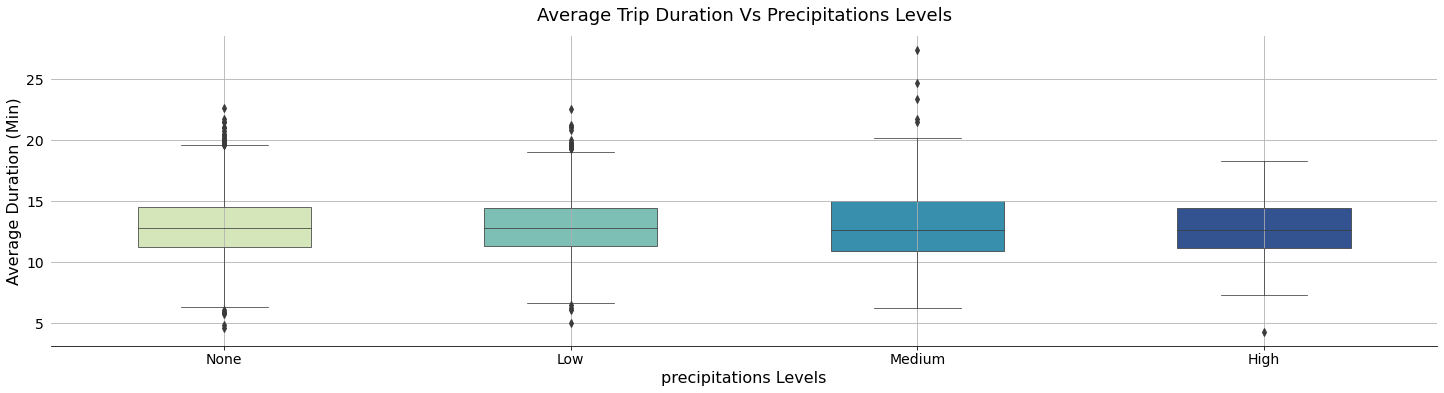

In [52]:
# Display a boxplot of average trip duration vs precipitations levels
plot_boxplot(
    pickup_avg_wf_prec_lvl,
    x_var="wf_prec_lvl",
    y_var="trip_duration",
    xlabel="precipitations Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs precipitations levels",
)

**Notes:** the boxplot above shows the average daily travel duration for each precipitations level. No clear difference could be observed between these different levels.

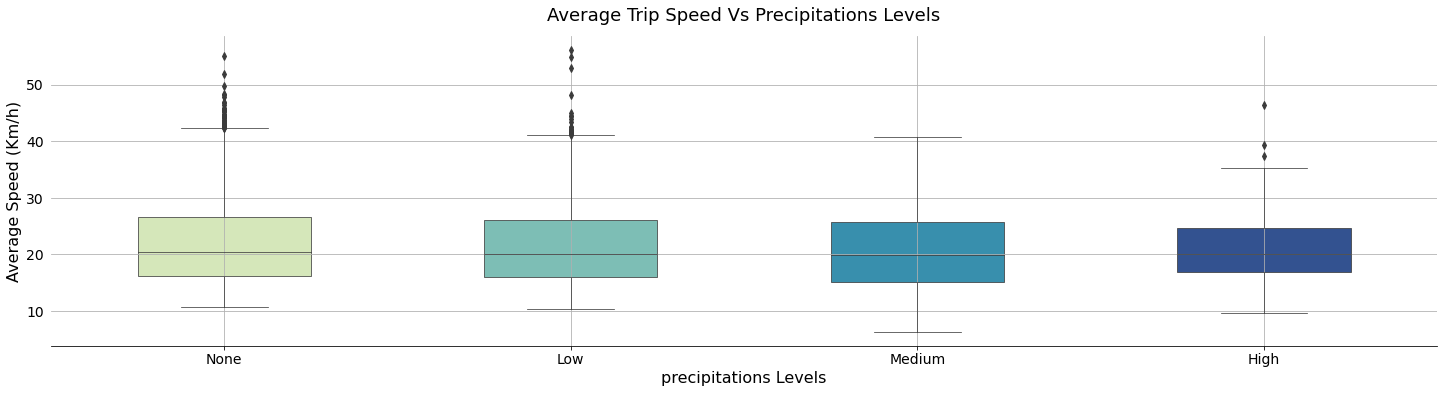

In [53]:
# Display a boxplot of average trip speed vs precipitations levels
plot_boxplot(
    pickup_avg_wf_prec_lvl,
    x_var="wf_prec_lvl",
    y_var="trip_speed",
    xlabel="precipitations Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs precipitations levels",
)

**Notes:** the boxplot above shows the average daily travel duration for each precipitations level. No clear difference could be observed between these different levels.

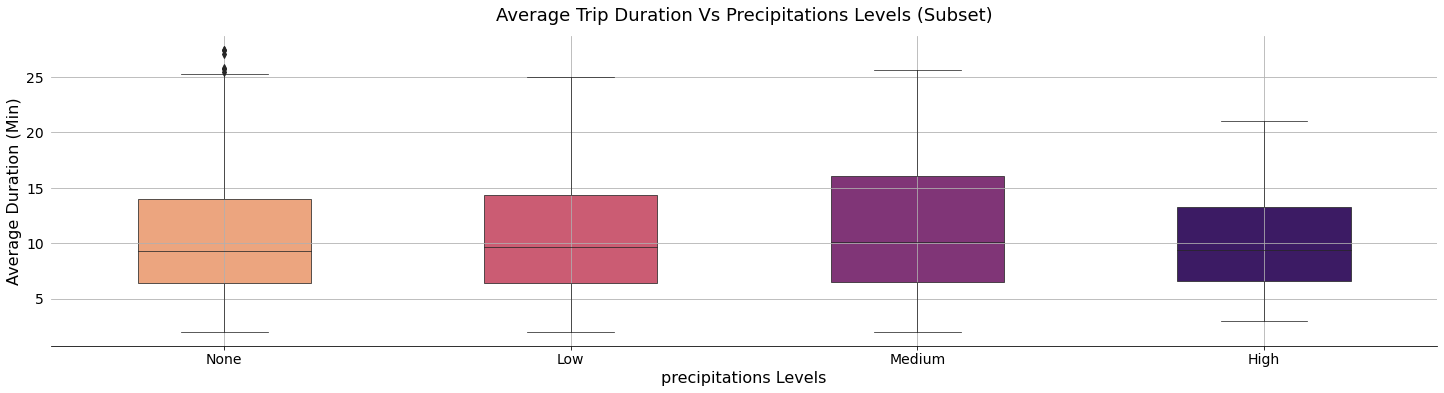

In [54]:
# Display a boxplot of average trip duration vs precipitations levels
plot_boxplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="wf_prec_lvl",
    y_var="trip_duration",
    xlabel="precipitations Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs precipitations levels (subset)",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel duration for each precipitations level. In the taxi trips subset, no clear difference could be observed between these different levels.

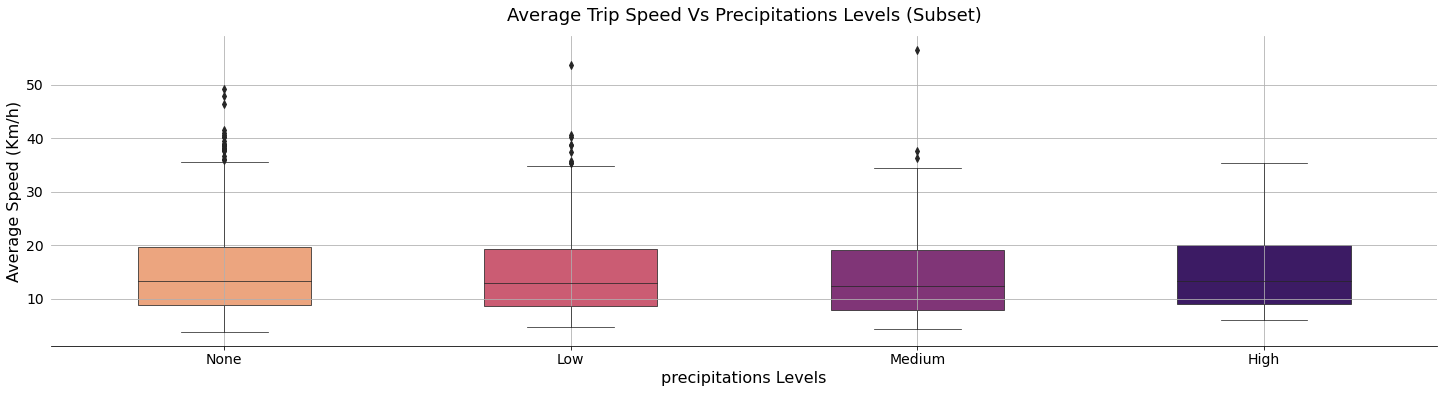

In [55]:
# Display a boxplot of average trip speed vs precipitations levels
plot_boxplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="wf_prec_lvl",
    y_var="trip_speed",
    xlabel="precipitations Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs precipitations levels (subset)",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel duration for each precipitations level. In the taxi trips subset, no clear difference could be observed between these different levels.

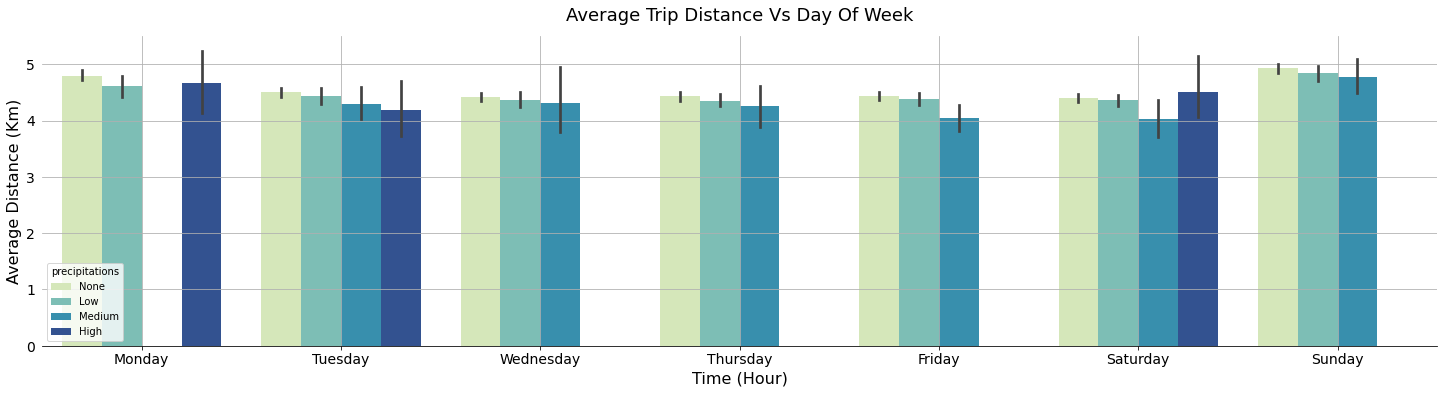

In [56]:
# Display a barplot of average trip distance vs day of week for all precipitations levels
plot_barplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_weekday",
    y_var="trip_distance",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Distance (Km)",
    legend="precipitations",
    title="average trip distance vs day of week",
)

**Notes:** the barplot above shows the average daily distance travelled for each precipitations level. No clear difference could be observed between these different levels.

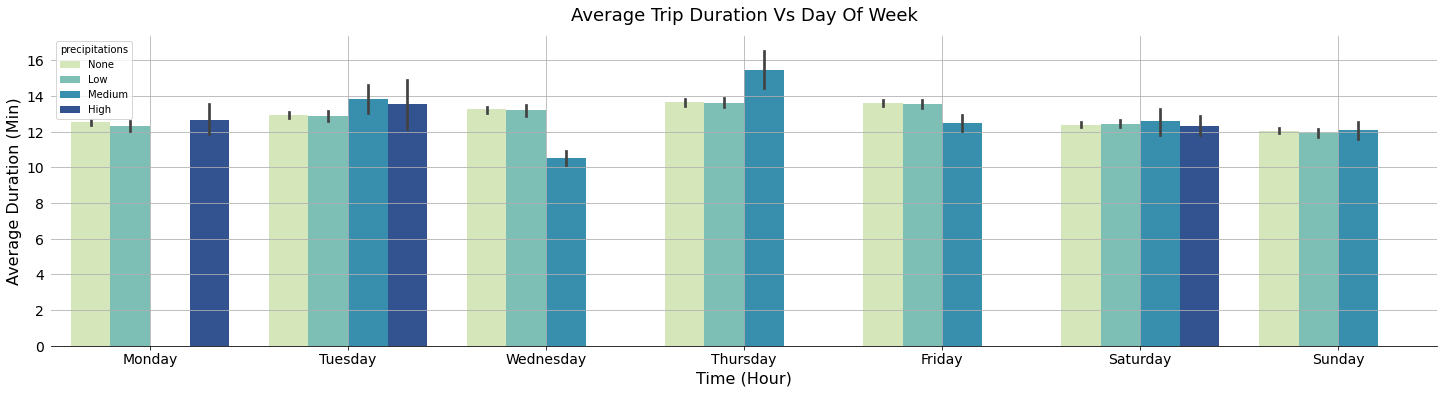

In [57]:
# Display a barplot of average trip duration vs day of week for all precipitations levels
plot_barplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="precipitations",
    title="average trip duration vs day of week",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and precipitations level. No clear difference could be observed between these different levels.

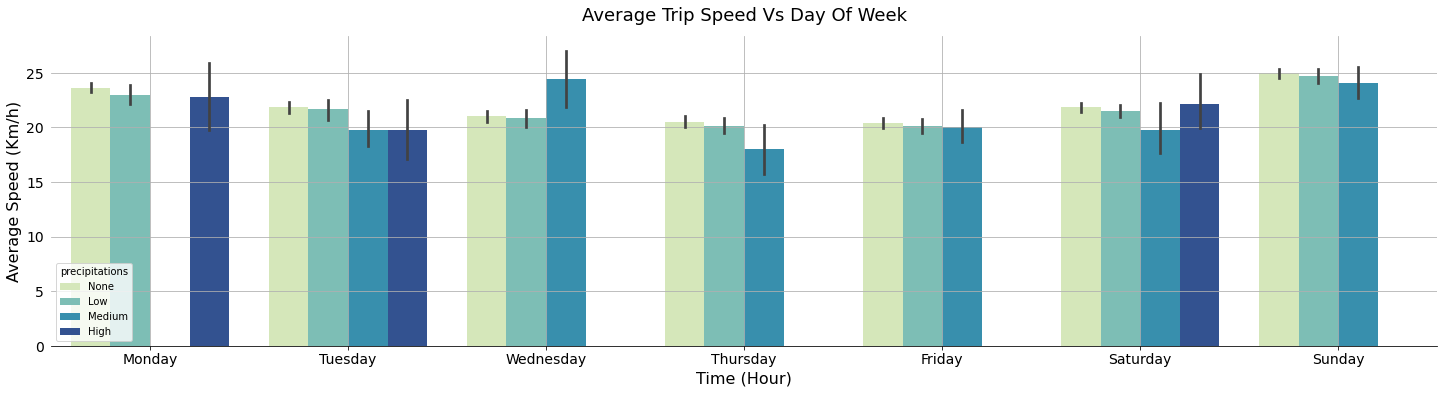

In [58]:
# Display a barplot of average trip speed vs day of week for all precipitations levels
plot_barplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Speed (Km/h)",
    legend="precipitations",
    title="average trip speed vs day of week",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and precipitations level. No clear differences could be observed between these different levels.

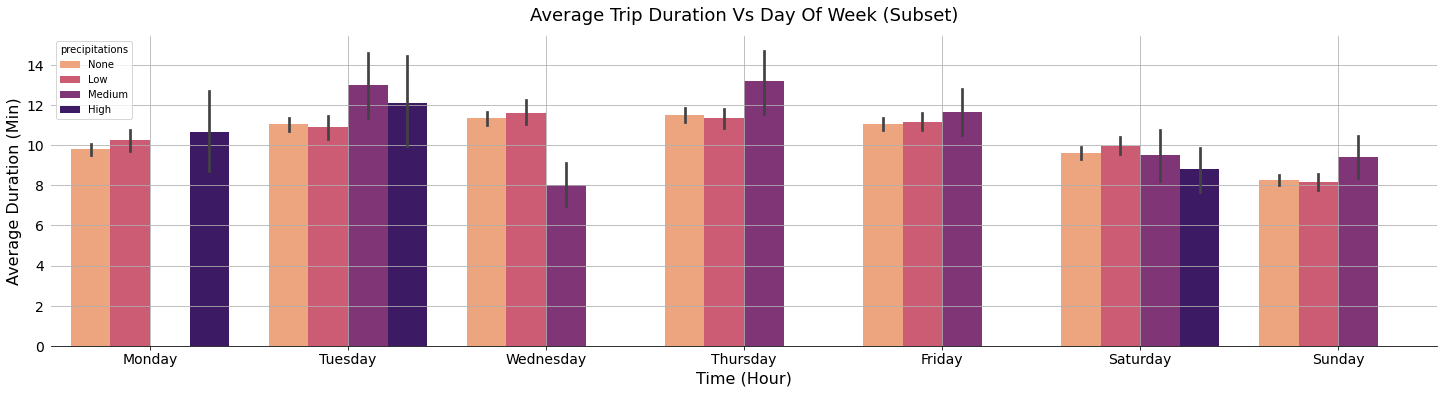

In [59]:
# Display a barplot of average trip duration vs day of week for all precipitations levels
plot_barplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="precipitations",
    title="average trip duration vs day of week (subset)",
    palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and precipitations level. In the taxi trips subset, no clear difference could be observed between these different levels.

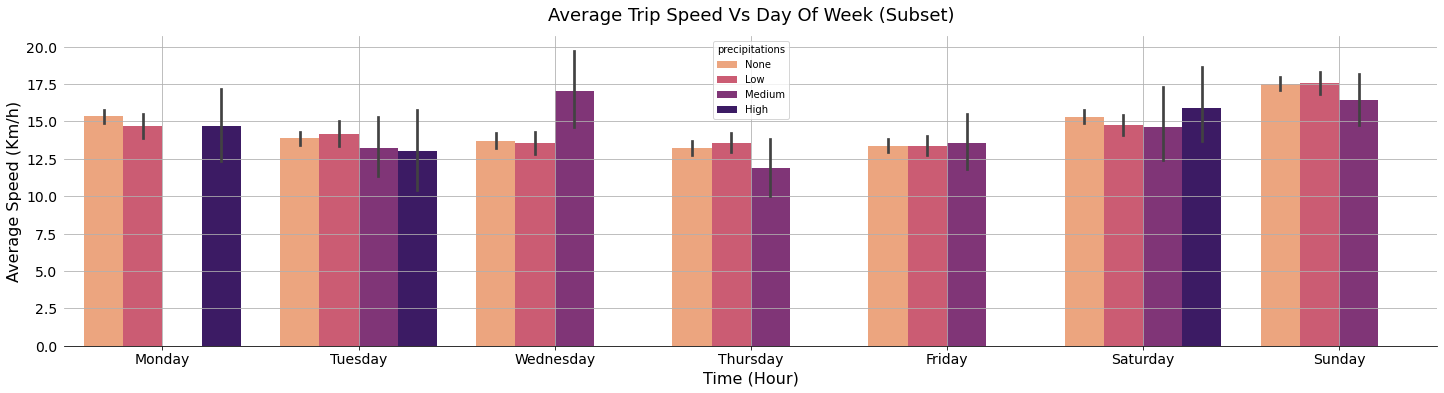

In [60]:
# Display a barplot of average trip speed vs day of week for all precipitations levels
plot_barplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Speed (Km/h)",
    legend="precipitations",
    title="average trip speed vs day of week (subset)",
    palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and precipitations level. In the taxi trips subset, no clear differences could be observed between these different levels.

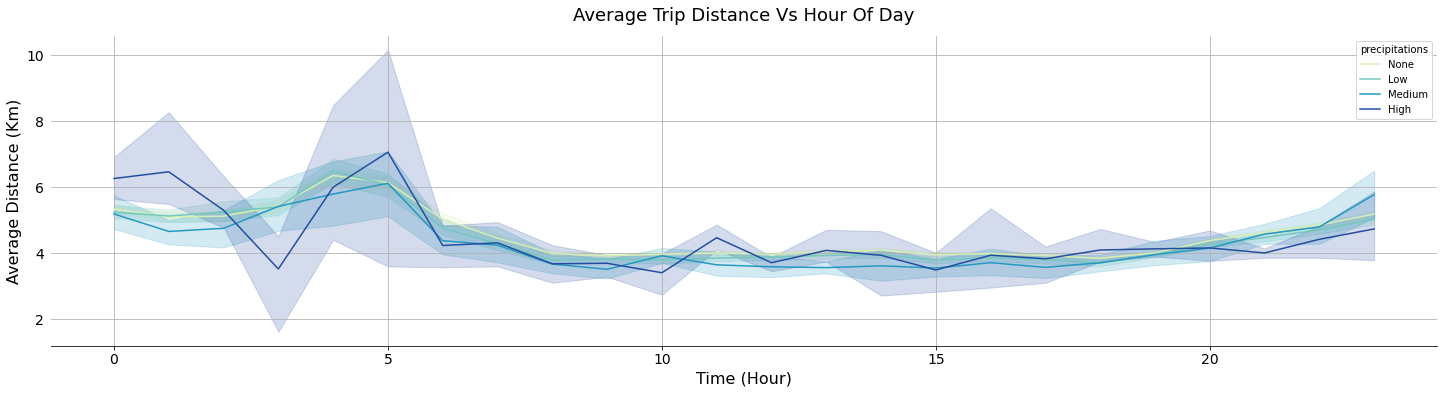

In [61]:
# Display a lineplot of average trip distance vs hour of day for all precipitations levels
plot_lineplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Distance (Km)",
    legend="precipitations",
    title="average trip distance vs hour of day",
)

**Notes:** the lineplot above shows the average daily distance traveled for each hour of the day and precipitations level. No clear differences could be observed between these different levels.

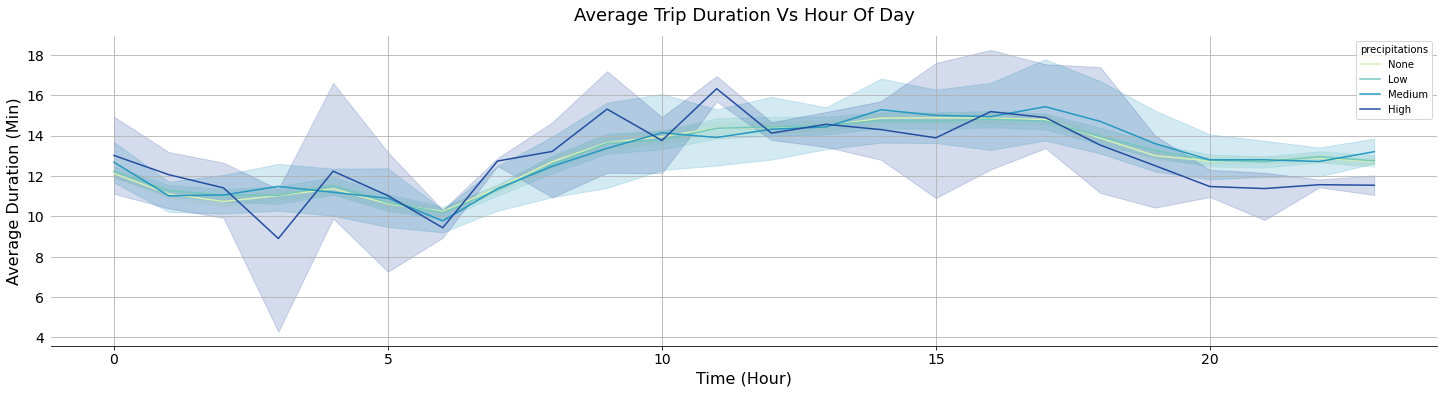

In [62]:
# Display a lineplot of average trip duration vs hour of day for all precipitations levels
plot_lineplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="precipitations",
    title="average trip duration vs hour of day",
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and precipitations level. No clear differences could be observed between these different levels.

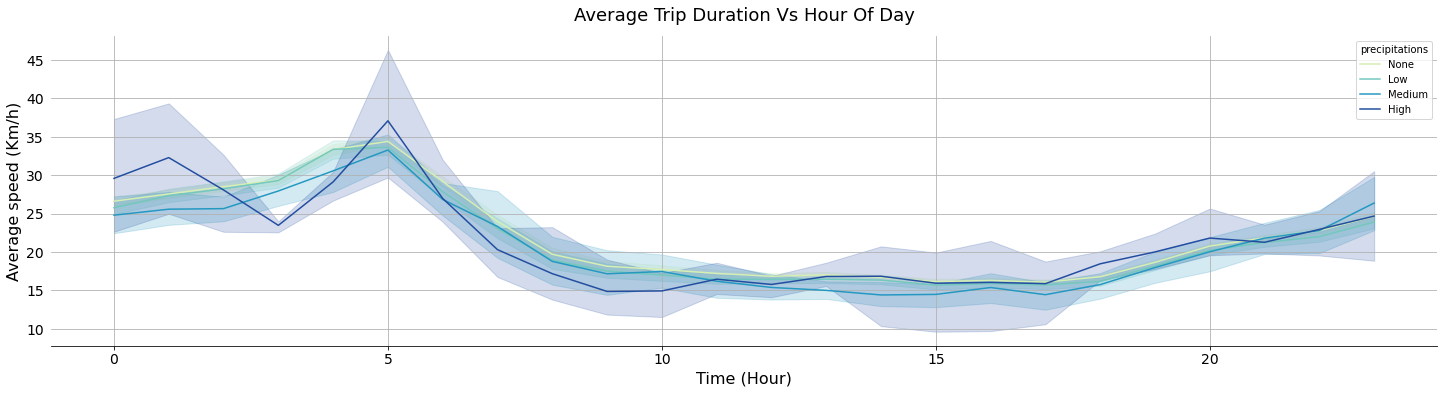

In [63]:
# Display a lineplot of average trip duration vs hour of day for all precipitations levels
plot_lineplot(
    pickup_avg_wf_prec_lvl,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="precipitations",
    title="average trip duration vs hour of day",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and precipitations level. No clear differences could be observed between these different levels.

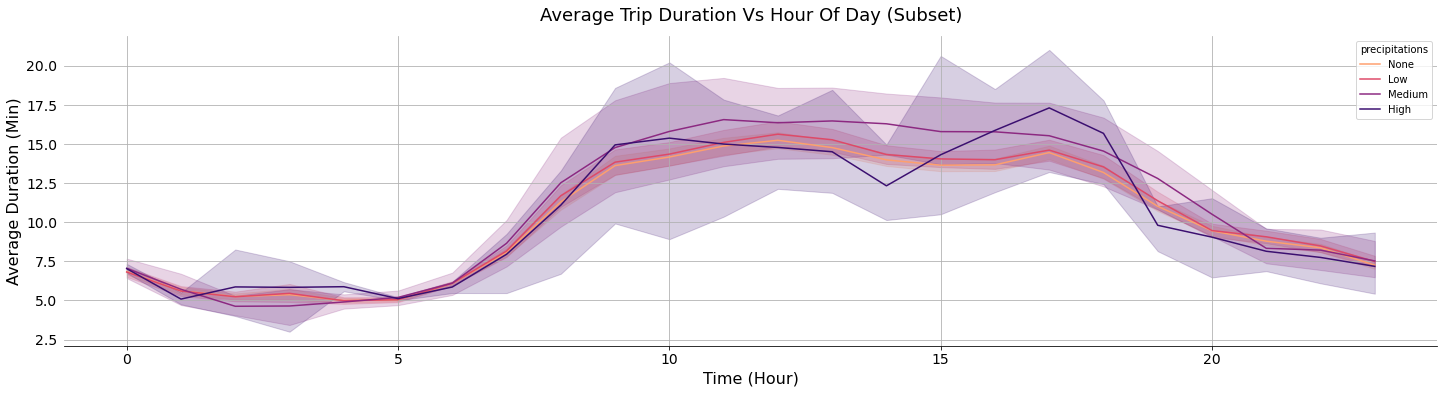

In [64]:
# Display a lineplot of average trip duration vs hour of day for all precipitations levels
plot_lineplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="precipitations",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and precipitations level. In the taxi trips subset, no clear differences could be observed between these different levels.

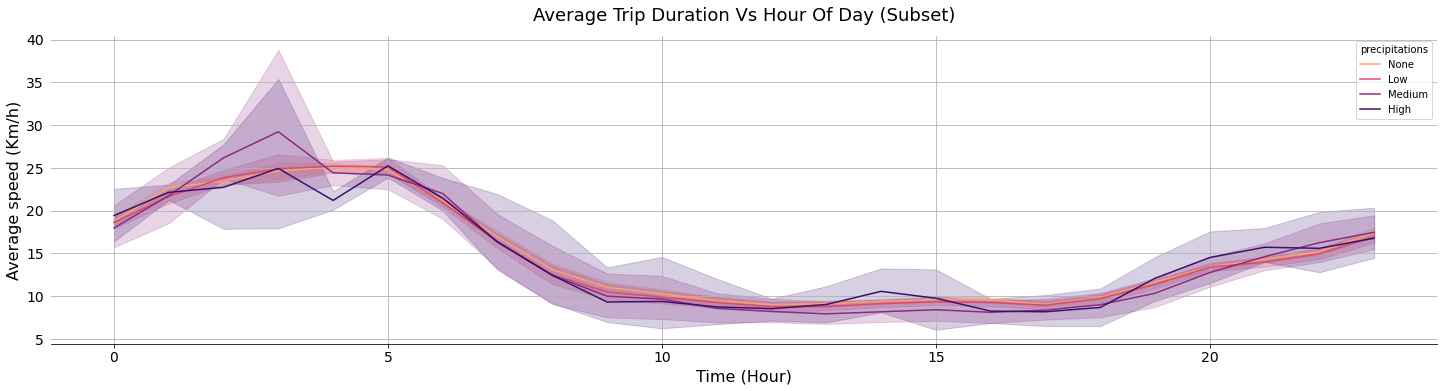

In [65]:
# Display a lineplot of average trip duration vs hour of day for all precipitations levels
plot_lineplot(
    pickup_avg_wf_prec_lvl_sub,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_prec_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="precipitations",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and precipitations level. In the taxi trips subset, no clear differences could be observed between these different levels.

### Weather Data: New Snowfall

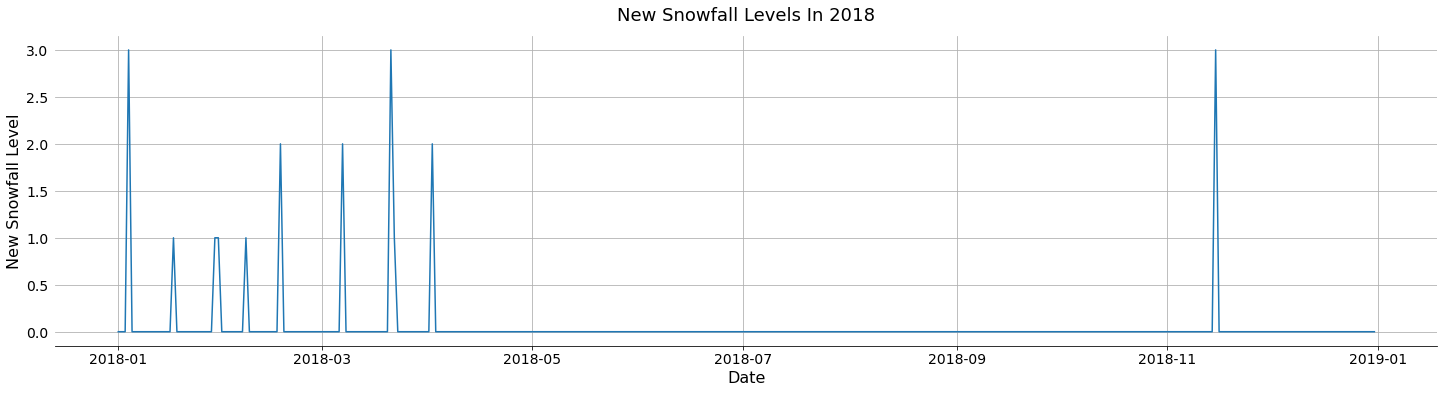

In [66]:
# Display a lineplot of new snowfall vs day of year
plot_lineplot(
    weather_df,
    x_var="date",
    y_var="new_snow_lvl",
    xlabel="Date",
    ylabel="New Snowfall Level",
    palette="magma_r",
    title="new snowfall levels in 2018"
)

**Notes:** The line plot above shows the daily new snowfall levels as a function of the date. Snowfalls only occur at few rare occasions during the coldest months of the year. However its impact on traffic congestion can be considerable as it might increase the amount of accident and lower travel speed. The impact of new snowfall on the distance, time and speed of daily taxi trips will be discussed below.

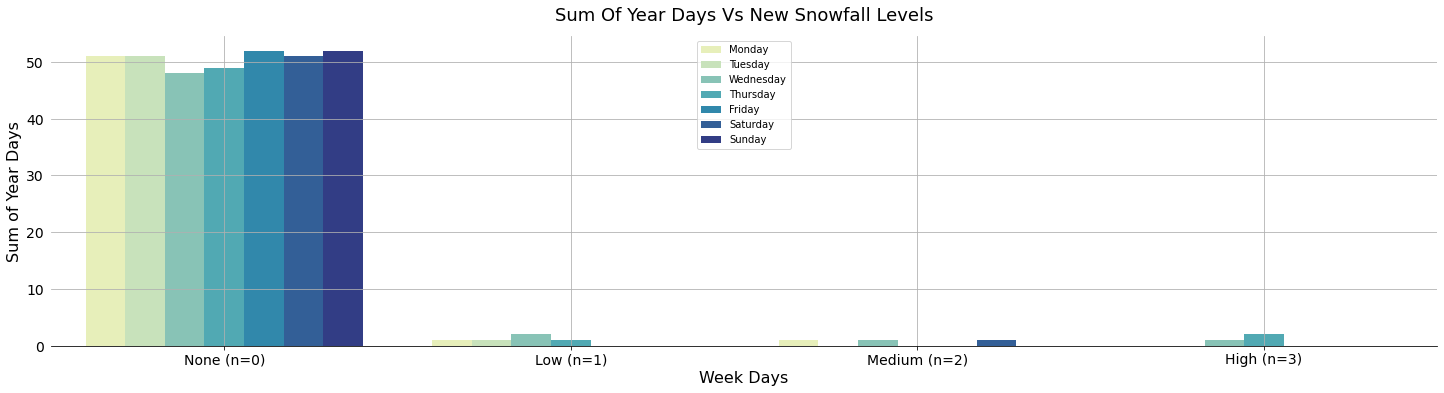

In [67]:
# Group the weather data by weekday and new snowfall levels
# Compute the number days with specific new snowfall levels
weather_count_nsnow = (
    weather_df.groupby(["weekday", "new_snow_lvl"]).size().to_frame("count").reset_index()
)

# Replace numerical values by the name of the categories
weather_count_nsnow["new_snow_lvl"] = weather_count_nsnow["new_snow_lvl"].map(
    dict(zip(np.arange(0, 4), ["None (n=0)", "Low (n=1)", "Medium (n=2)", "High (n=3)"]))
)

# Replace numerical values by the name of the categories
weather_count_nsnow["weekday"] = weather_count_nsnow["weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a barplot sum of year days vs new snowfall levels for all weekdays
plot_barplot(
    weather_count_nsnow,
    x_var="new_snow_lvl",
    y_var="count",
    labels="weekday",
    xlabel="Week Days",
    ylabel="Sum of Year Days",
    title="sum of year days vs new snowfall levels"
)

**Note:** The barplot above shows the sum of days in the year that fall into one of the daily precipitations cateogry. Days with snowfalls are rare and only emcompass a few week days. This is noteworthy since the number of taxi trips, their distance, duration, and speed are all highly dependent on the day of the week and hour of the day.

**Warnings:** The results obtained for a all levels of new snowfall should be interpreted with caution.

In [68]:
# Group taxi trips by pickup year-day, week-day, hour, and new snowfall levels
# Compute the number of daily trip
pickup_count_nsnow = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_new_snow_lvl"])
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["wf_new_snow_lvl", "pickup_weekday"])

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_nsnow["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_nsnow["wf_new_snow_lvl"] = pickup_count_nsnow["wf_new_snow_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_nsnow["pickup_weekday"] = pickup_count_nsnow["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_nsnow.head()

pickup_yearday pickup_weekday  pickup_hour wf_new_snow_lvl  count
0               1         Monday            0            None    117
1               1         Monday            1            None    104
2               1         Monday            2            None    117
3               1         Monday            3            None     88
4               1         Monday            4            None     43

In [69]:
# Group taxi trips by pickup year-day, week-day, hour, and new snowfall levels
# Compute the number of daily trip
pickup_count_nsnow_sub = (
    train_sub_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_new_snow_lvl"]
    )
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["wf_new_snow_lvl", "pickup_weekday"])

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_nsnow_sub["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_nsnow_sub["wf_new_snow_lvl"] = pickup_count_nsnow_sub["wf_new_snow_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_nsnow_sub["pickup_weekday"] = pickup_count_nsnow_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_nsnow_sub.head()

pickup_yearday pickup_weekday  pickup_hour wf_new_snow_lvl  count
0               1         Monday            0            None      3
1               1         Monday            1            None      6
2               1         Monday            2            None      6
3               1         Monday            3            None      3
4               1         Monday            5            None      2

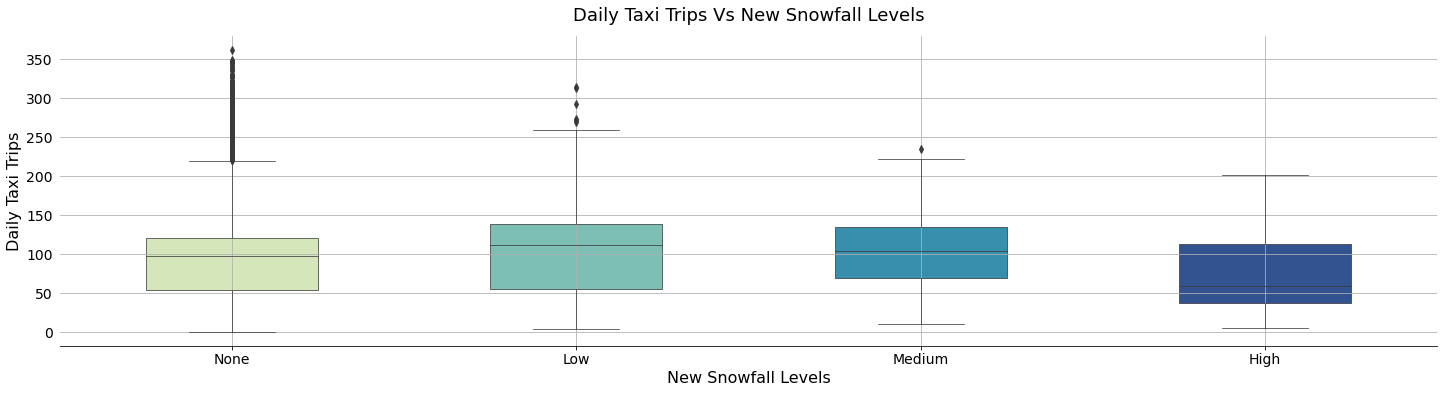

In [70]:
# Display a barplot of daily taxi trips vs new snowfall levels
plot_boxplot(
    pickup_count_nsnow,
    x_var="wf_new_snow_lvl",
    y_var="count",
    xlabel="New Snowfall Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs new snowfall levels",
)

**Notes:** The boxplot above show the average number of daily taxi trips for each new snowfall level. The average number of daily rides is lower for days with high snowfalls.

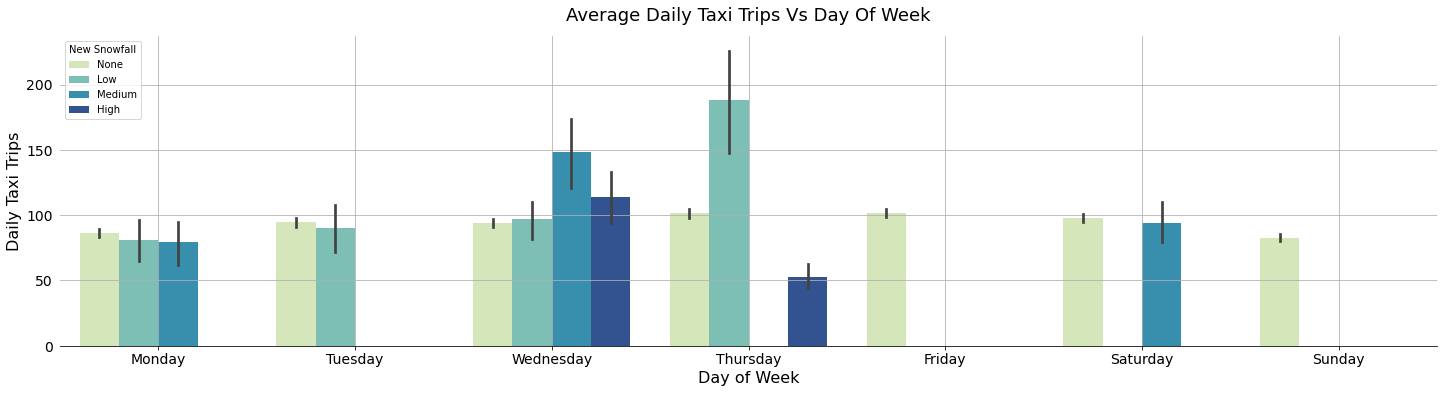

In [71]:
# Display a barplot of average daily taxi trips vs day of week for all new snowfall levels
plot_barplot(
    pickup_count_nsnow,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="New Snowfall",
    title="average daily taxi trips vs day of week",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each level of new snowfall. The average number of daily trips is significantly lower on Thursdays for the high new snowfall level. However, we saw earlier that New York was caught in a blizzard in early January and the city remained buried under a thick layer of snow for a few days after a heavy snowfall on Thursday, January 4, 2018. Two additional heavy snowfalls occurred on Wednesday, March 21 and Thursday, November 15, yet the one in March did not seem to affect traffic.

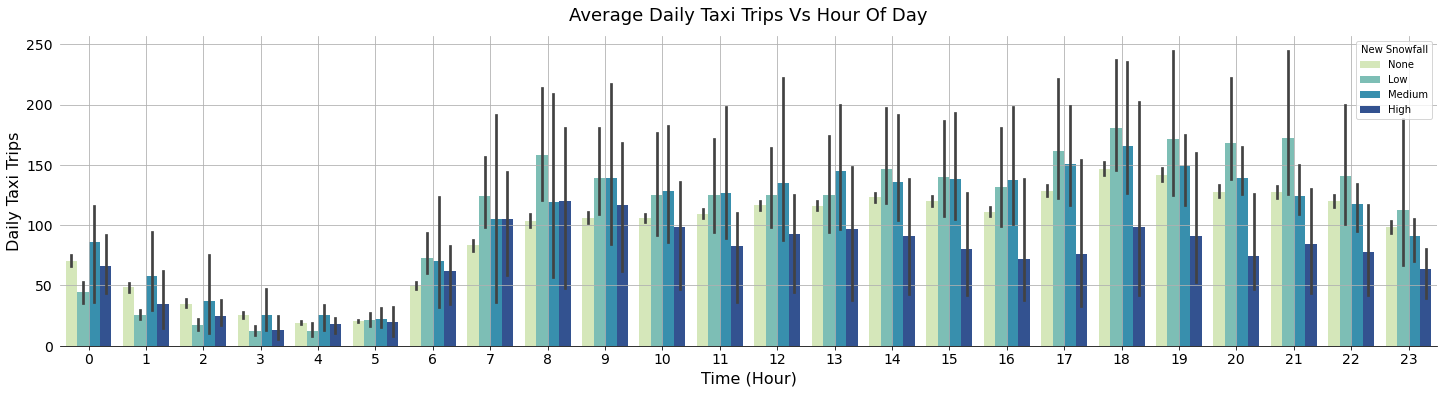

In [72]:
# Display a barplot of average daily taxi trips vs hour of day for new snowfall levels
plot_barplot(
    pickup_count_nsnow,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="New Snowfall",
    title="average daily taxi trips vs hour of day",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each level of new snowfall. No clear difference can be seen between the different new snowfall, as most new snowfall levels fall within their margins of error. However, the heaviest snowfall of 2018 still seem to have affected traffic throughout the day and night. Indeed, the high new snowfalls occured on the two busiest day of the week and caused a drop in the number of average daily taxi trip.

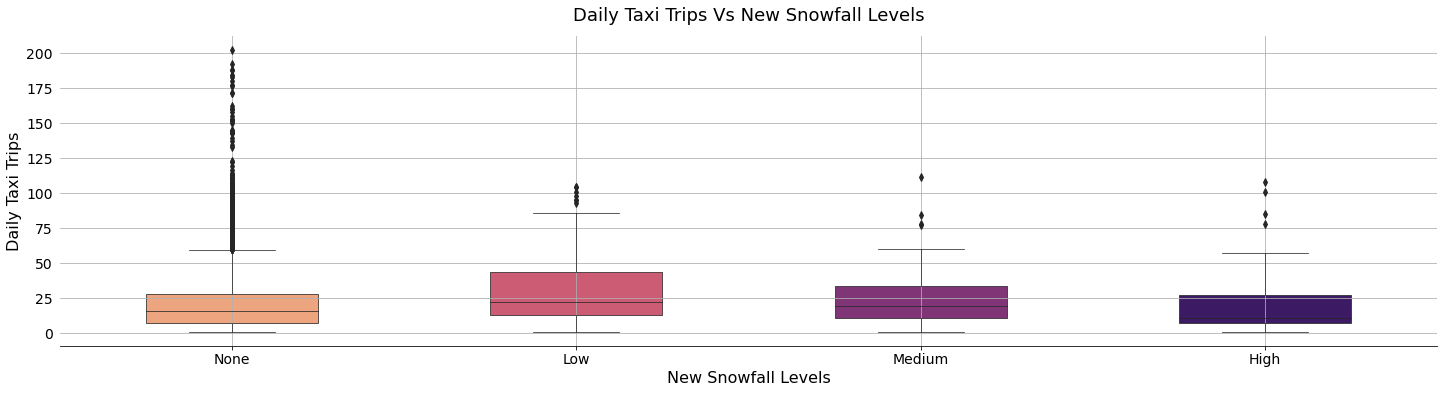

In [73]:
# Display a barplot of daily taxi trips vs new snowfall levels
plot_boxplot(
    pickup_count_nsnow_sub,
    x_var="wf_new_snow_lvl",
    y_var="count",
    xlabel="New Snowfall Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs new snowfall levels",
    palette="magma_r",
)

**Notes:** The boxplot above show the average number of daily taxi trips for each new snowfall level. In the taxi trips subset, the average number of daily rides is marginally lower for days with high snowfalls and higher for low snowfalls compared to days with no snowfalls.

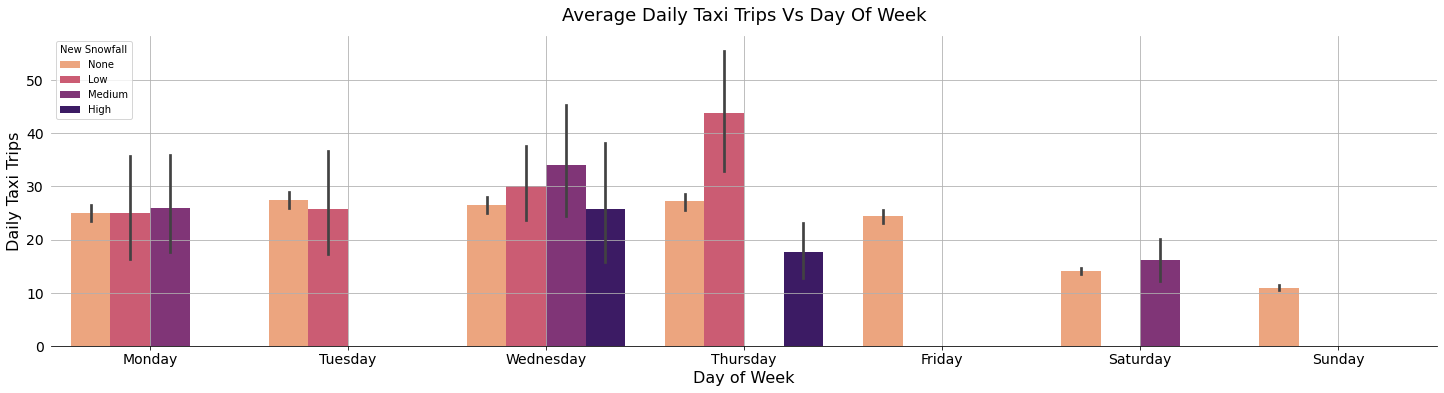

In [74]:
# Display a barplot of average daily taxi trips vs day of week for all new snowfall levels
plot_barplot(
    pickup_count_nsnow_sub,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="New Snowfall",
    title="average daily taxi trips vs day of week",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each level of new snowfall. In the taxi trips subset, the average number of daily trips shows no major difference, with the exception of a significant drop on Thursday due to the blizzard that hit New York City on Thursday, January 4, 2018. 

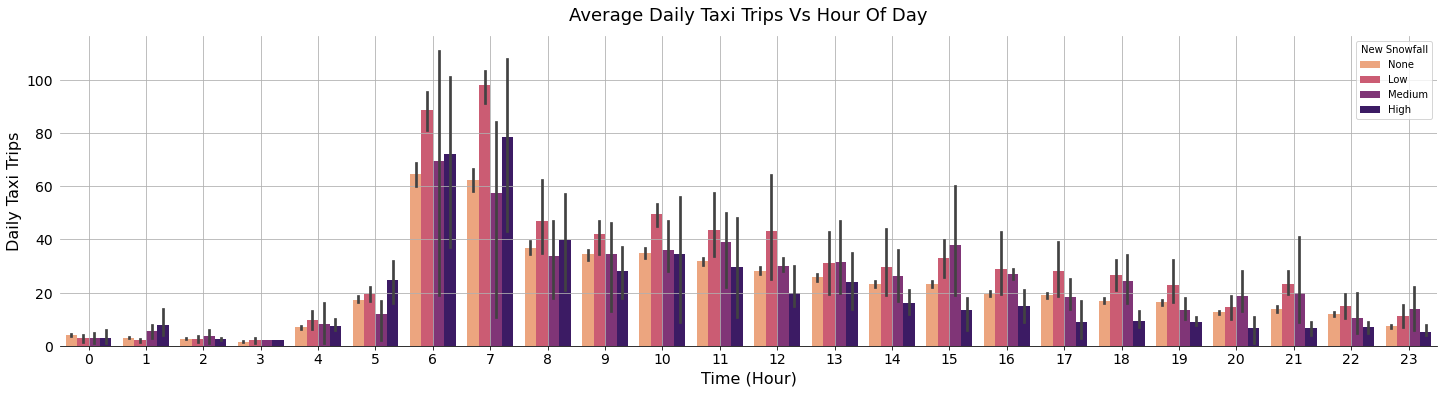

In [75]:
# Display a barplot of average daily taxi trips vs hour of day for new snowfall levels
plot_barplot(
    pickup_count_nsnow_sub,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="New Snowfall",
    title="average daily taxi trips vs hour of day",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each level of new snowfall. In the taxi trips subset, no clear difference can be seen between the different new snowfall, as most new snowfall levels fall within their margins of error. However, the heaviest snowfall of 2018 have probably affected traffic throughout the day.

In [76]:
# Group taxi trips by pickup year-day, week-day, hour, and new snowfall levels
# Compute the mean of trip distances and durations
pickup_avg_nsnow = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_new_snow_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
).sort_values(["wf_new_snow_lvl", "pickup_weekday"])

# Compute the average trip speed
pickup_avg_nsnow["trip_speed"] = np.divide(
    pickup_avg_nsnow["trip_distance"], np.divide(pickup_avg_nsnow["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_avg_nsnow["wf_new_snow_lvl"] = pickup_avg_nsnow["wf_new_snow_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_nsnow["pickup_weekday"] = pickup_avg_nsnow["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_nsnow[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8759.000000    8759.000000  8759.000000
mean        4.527946      12.903568    21.884770
std         1.191982       2.456410     7.048098
min         1.609340       4.280952     6.325601
25%         3.757973      11.220652    16.110745
50%         4.247400      12.811538    20.315860
75%         4.970132      14.530928    26.433480
max        16.103458      27.379333    56.125353

In [77]:
# Group taxi trips by pickup year-day, week-day, hour, and new snowfall levels
# Compute the mean of trip distances and durations
pickup_avg_nsnow_sub = (
    train_sub_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_new_snow_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
).sort_values(["wf_new_snow_lvl", "pickup_weekday"])

# Compute the average trip speed
pickup_avg_nsnow_sub["trip_speed"] = np.divide(
    pickup_avg_nsnow_sub["trip_distance"], np.divide(pickup_avg_nsnow_sub["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_avg_nsnow_sub["wf_new_snow_lvl"] = pickup_avg_nsnow_sub["wf_new_snow_lvl"].map(
    dict(zip(np.arange(0, 4), ["None", "Low", "Medium", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_nsnow_sub["pickup_weekday"] = pickup_avg_nsnow_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_nsnow_sub[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8473.000000    8473.000000  8473.000000
mean        2.057241      10.448869    14.581679
std         0.192553       4.762699     6.765805
min         0.804670       2.000000     3.809506
25%         1.961671       6.375000     8.786640
50%         2.065776       9.457143    13.153260
75%         2.153128      14.131579    19.482481
max         3.266960      27.461538    56.487834

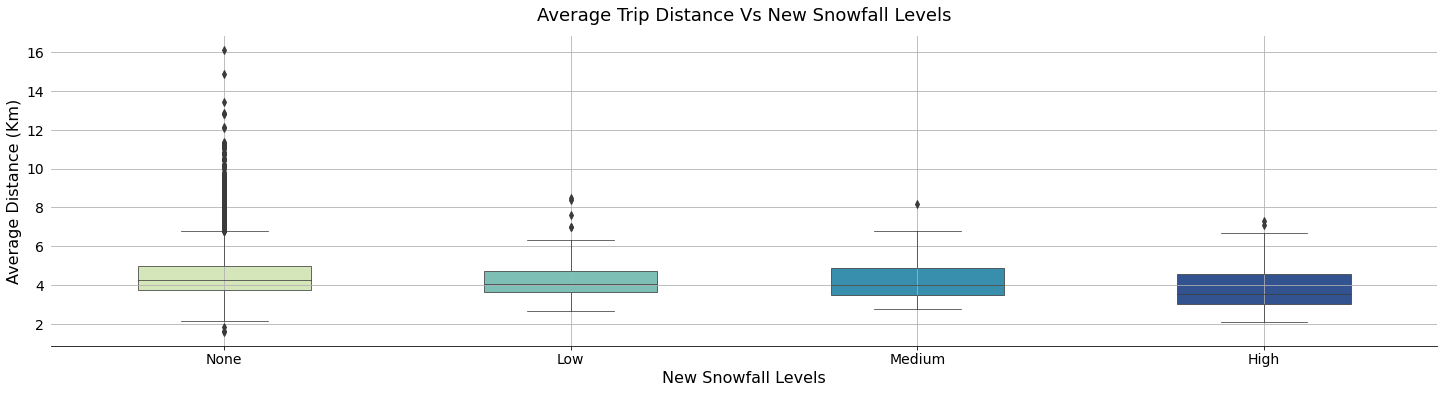

In [78]:
# Display a boxplot of average trip distance vs new snowfall levels
plot_boxplot(
    pickup_avg_nsnow,
    x_var="wf_new_snow_lvl",
    y_var="trip_distance",
    xlabel="New Snowfall Levels",
    ylabel="Average Distance (Km)",
    title="average trip distance vs new snowfall levels",
)

**Notes:** the boxplot above shows the average daily distance traveled for each new snow level. No clear difference could be observed between these different levels.

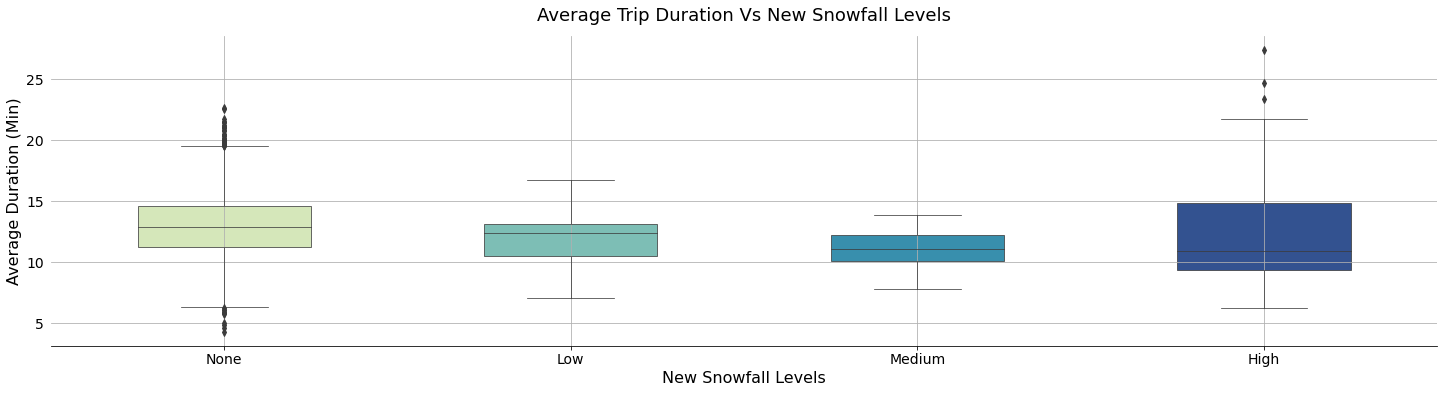

In [79]:
# Display a boxplot of average trip duration vs new snowfall levels
plot_boxplot(
    pickup_avg_nsnow,
    x_var="wf_new_snow_lvl",
    y_var="trip_duration",
    xlabel="New Snowfall Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs new snowfall levels",
)

**Notes:** the boxplot above shows the average daily travel duration for each new snowfall level. No clear difference could be observed between these different levels.

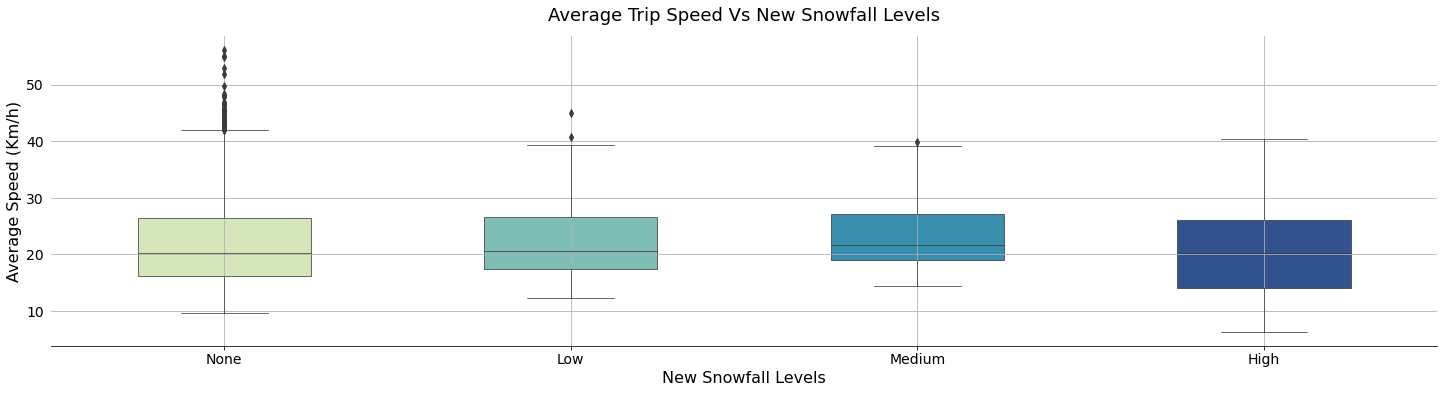

In [80]:
# Display a boxplot of average trip speed vs new snowfall levels
plot_boxplot(
    pickup_avg_nsnow,
    x_var="wf_new_snow_lvl",
    y_var="trip_speed",
    xlabel="New Snowfall Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs new snowfall levels",
)

**Notes:** the boxplot above shows the average daily travel speed for each new snowfall level. No clear difference could be observed between these different levels.

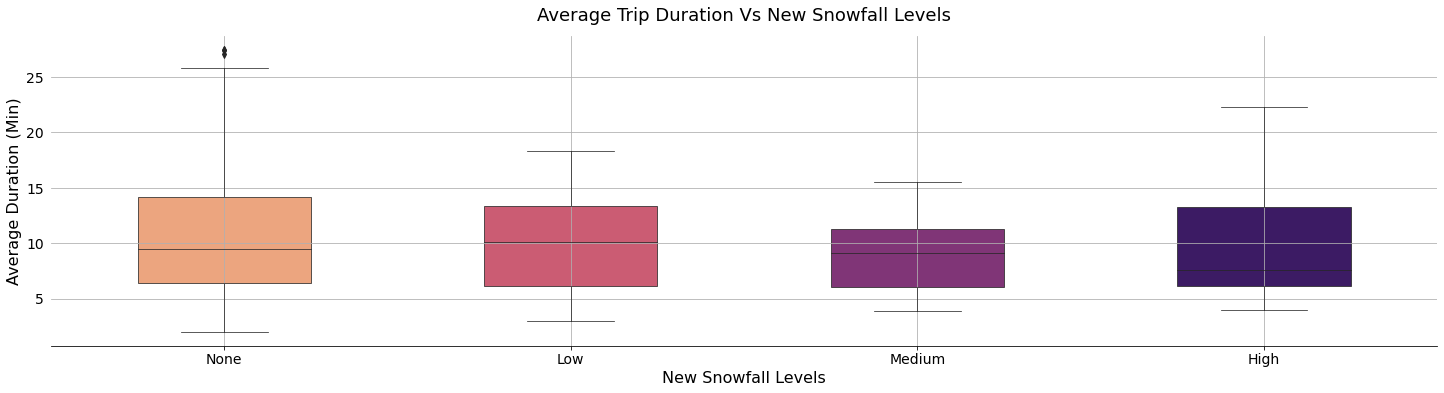

In [81]:
# Display a boxplot of average trip duration vs new snowfall levels
plot_boxplot(
    pickup_avg_nsnow_sub,
    x_var="wf_new_snow_lvl",
    y_var="trip_duration",
    xlabel="New Snowfall Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs new snowfall levels",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel duration for each new snowfall level. In the taxi trips subset, no clear difference could be observed between these different levels.

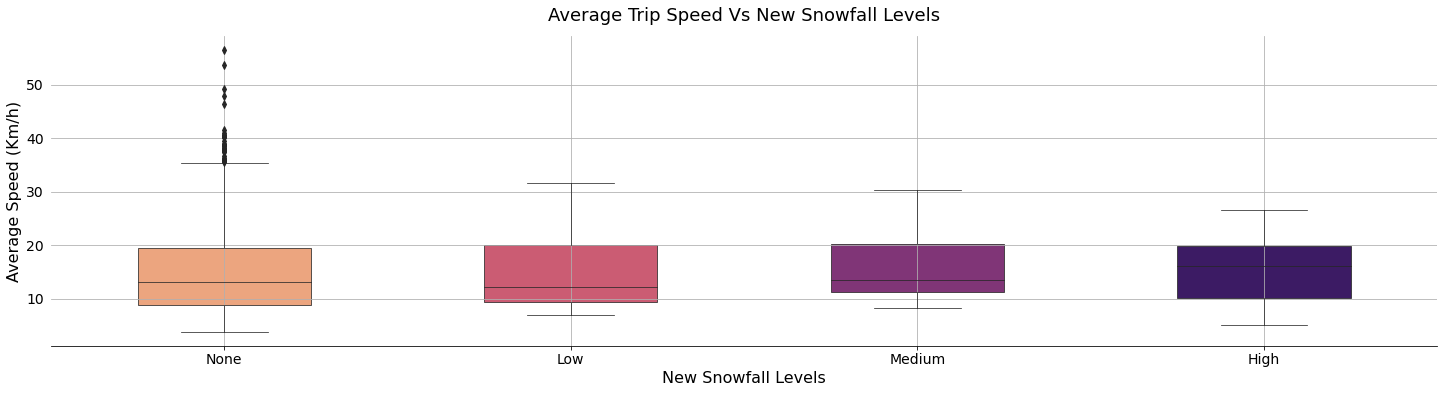

In [82]:
# Display a boxplot of average trip speed vs new snowfall levels
plot_boxplot(
    pickup_avg_nsnow_sub,
    x_var="wf_new_snow_lvl",
    y_var="trip_speed",
    xlabel="New Snowfall Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs new snowfall levels",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel speed for each new snowfall level. In the taxi trips subset, no clear difference could be observed between these different levels.

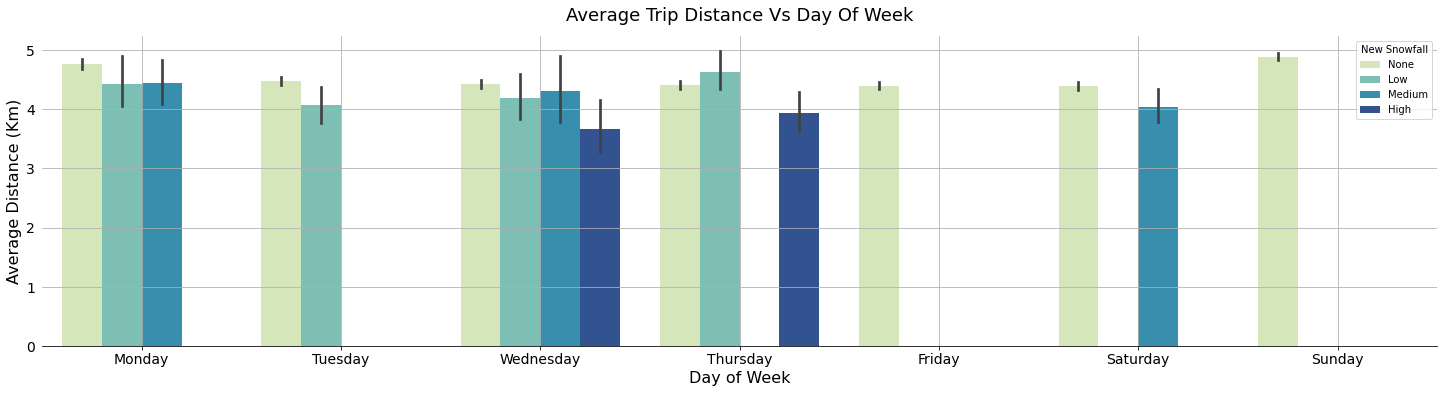

In [83]:
# Display a barplot of average trip distance vs day of week for all new snowfall levels
plot_barplot(
    pickup_avg_nsnow,
    x_var="pickup_weekday",
    y_var="trip_distance",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Average Distance (Km)",
    legend="New Snowfall",
    title="average trip distance vs day of week",
)

**Notes:** the barplot above shows the average daily distance travelled for each new snowfall level. No clear difference could be observed between these different levels.

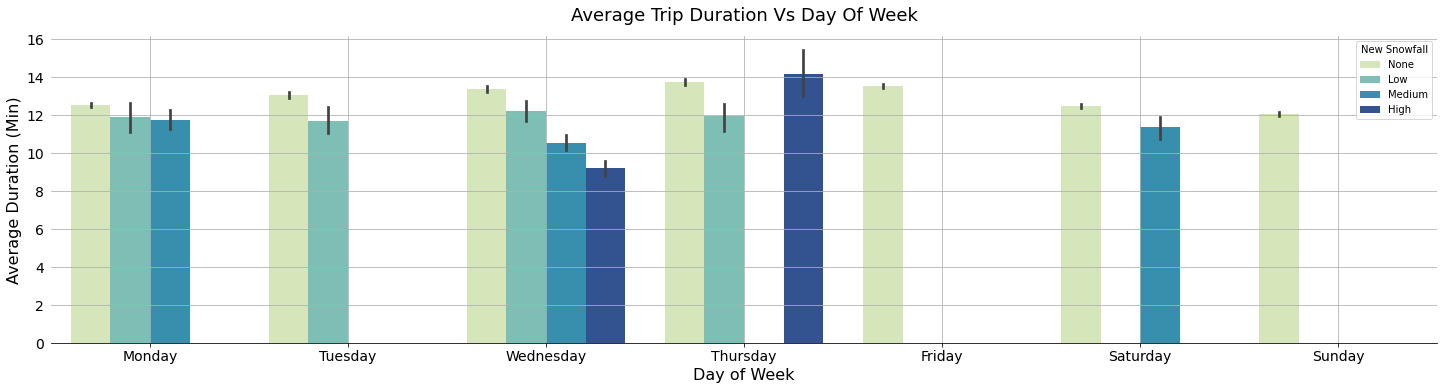

In [84]:
# Display a barplot of average trip duration vs day of week for all new snowfall levels
plot_barplot(
    pickup_avg_nsnow,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Average Duration (Min)",
    legend="New Snowfall",
    title="average trip duration vs day of week",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and new snowfall level. No clear difference could be observed between these different levels.

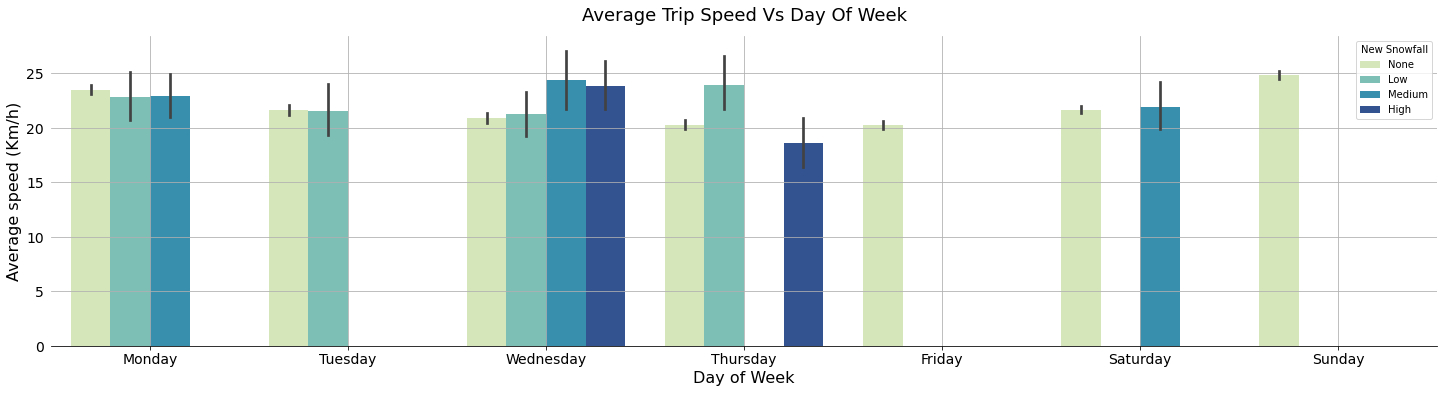

In [85]:
# Display a barplot of average trip speed vs day of week for all new snowfall levels
plot_barplot(
    pickup_avg_nsnow,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Average speed (Km/h)",
    legend="New Snowfall",
    title="average trip speed vs day of week",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and new snowfall level. No clear differences could be observed between these different levels.

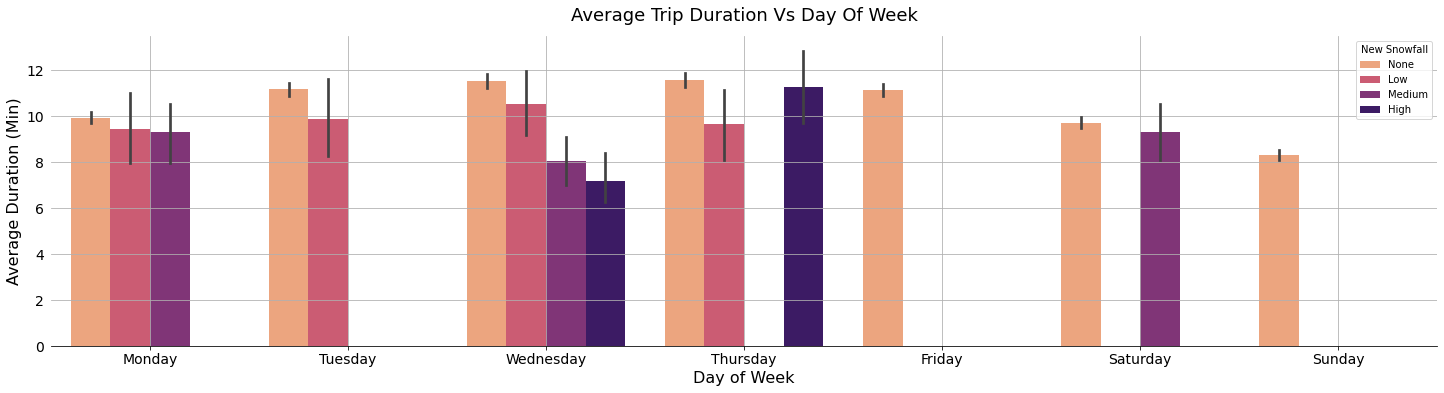

In [86]:
# Display a barplot of average trip duration vs day of week for all new snowfall levels
plot_barplot(
    pickup_avg_nsnow_sub,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Average Duration (Min)",
    legend="New Snowfall",
    title="average trip duration vs day of week",
    palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and new snowfall level. In the taxi trips subset, no clear difference could be observed between these different levels.

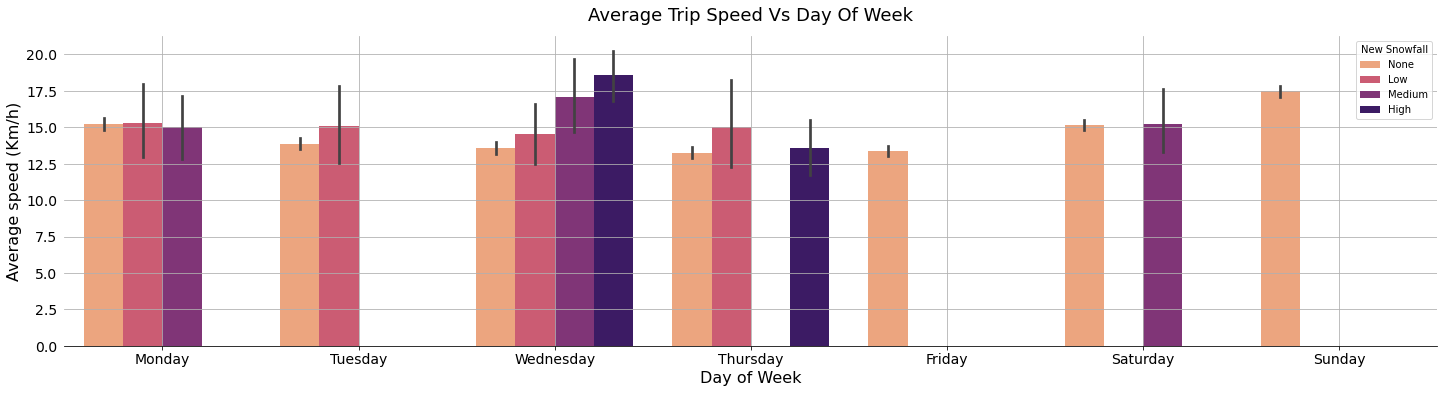

In [87]:
# Display a barplot of average trip speed vs day of week for all new snowfall levels
plot_barplot(
    pickup_avg_nsnow_sub,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Day of Week",
    ylabel="Average speed (Km/h)",
    legend="New Snowfall",
    title="average trip speed vs day of week",
    palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and new snowfall level. In the taxi trips subset, no clear differences could be observed between these different levels.

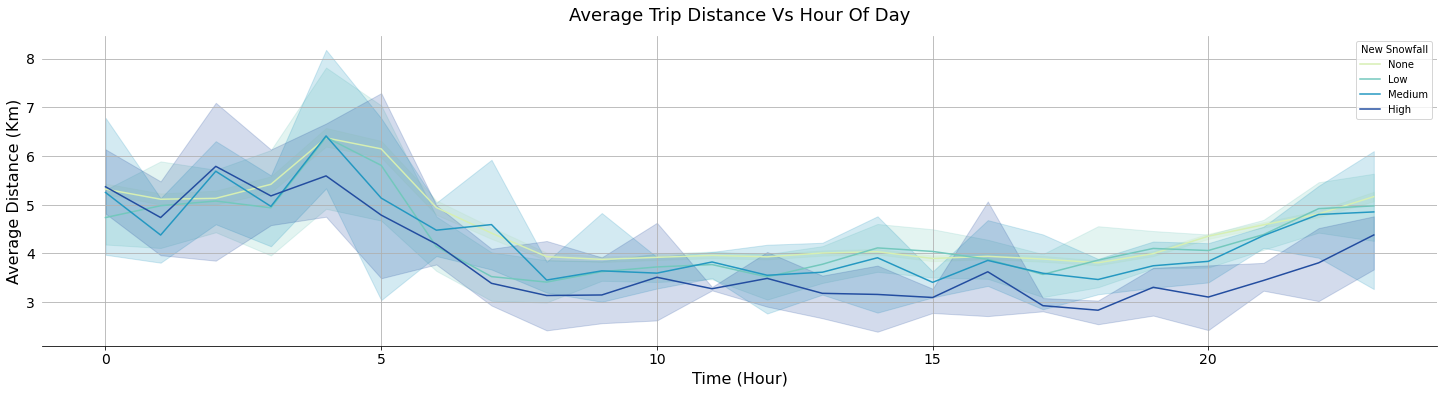

In [88]:
# Display a lineplot of average trip distance vs hour of day for all new snowfall levels
plot_lineplot(
    pickup_avg_nsnow,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Average Distance (Km)",
    legend="New Snowfall",
    title="average trip distance vs hour of day",
)

**Notes:** the lineplot above shows the average daily distance traveled for each hour of the day and new snowfall level. No clear differences could be observed between these different levels

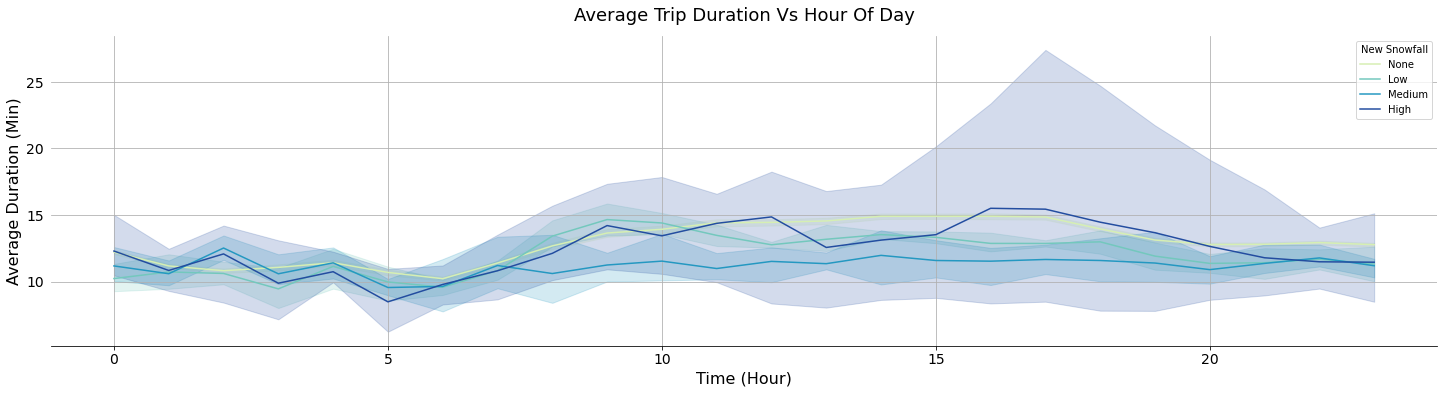

In [89]:
# Display a lineplot of average trip duration vs hour of day for all new snowfall levels
plot_lineplot(
    pickup_avg_nsnow,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="New Snowfall",
    title="average trip duration vs hour of day",
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and new snowfall level. No clear difference could be observed between these different levels, but it appears that heavy snowfall resulted in an increase in travel time between 15:00 and 22:00.

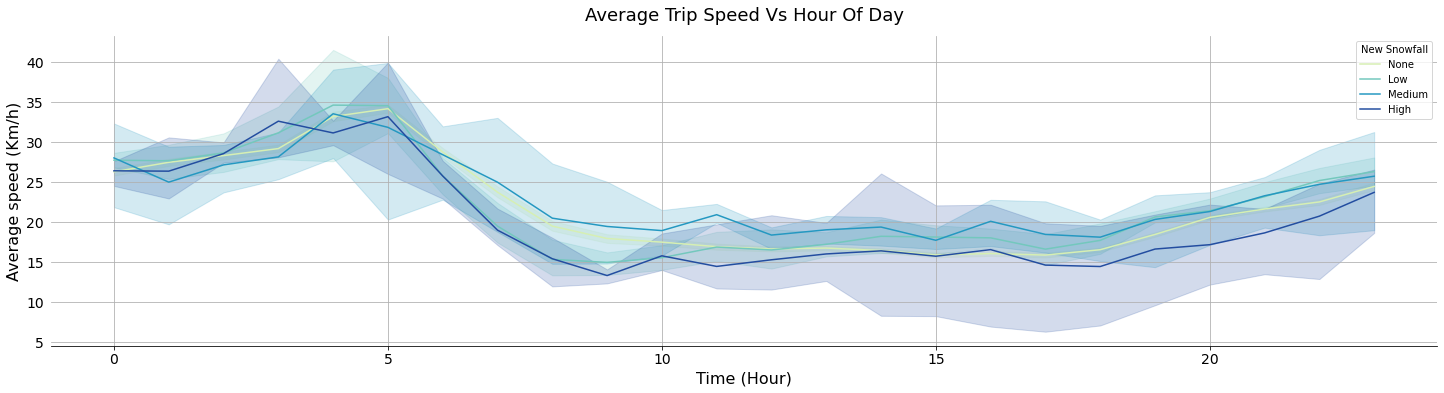

In [90]:
# Display a lineplot of average trip speed vs hour of day for all new snowfall levels
plot_lineplot(
    pickup_avg_nsnow,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="New Snowfall",
    title="average trip speed vs hour of day",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and new snowfall level. No clear difference could be observed between these different levels,

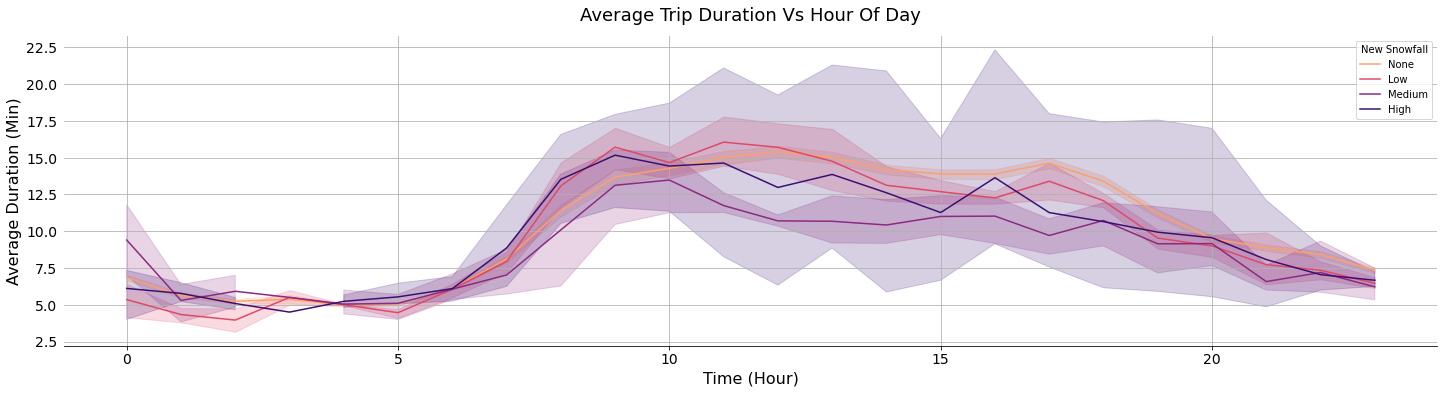

In [91]:
# Display a lineplot of average trip duration vs hour of day for all new snowfall levels
plot_lineplot(
    pickup_avg_nsnow_sub,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="New Snowfall",
    title="average trip duration vs hour of day",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and new snowfall level. In the taxi trips subset, no clear difference could be observed between these different levels, but it appears that heavy snowfall resulted in an increase in travel time between 15:00 and 22:00.

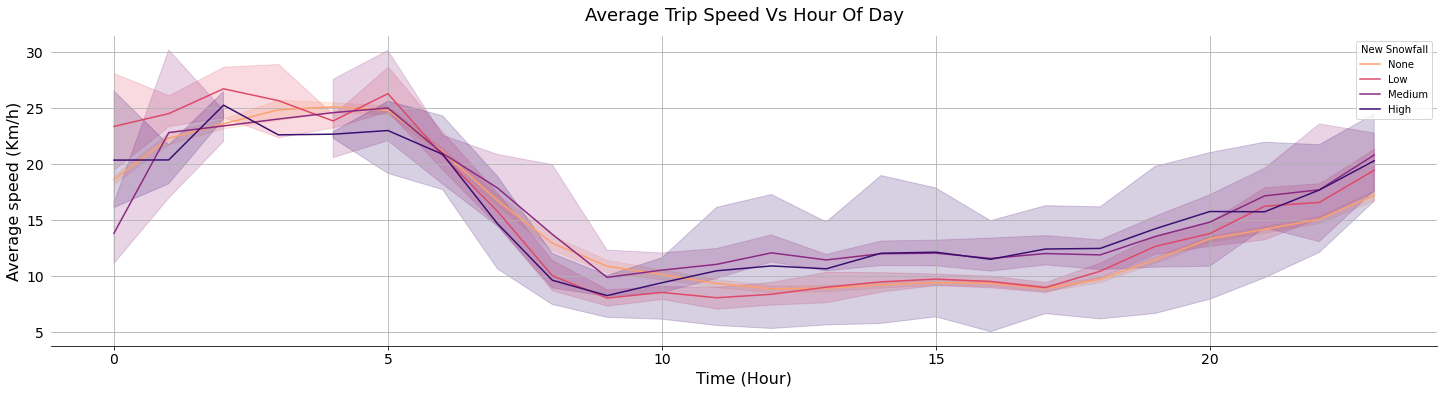

In [92]:
# Display a lineplot of average trip speed vs hour of day for all new snowfall levels
plot_lineplot(
    pickup_avg_nsnow_sub,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_new_snow_lvl",
    label_order=["None", "Low", "Medium", "High"],
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="New Snowfall",
    title="average trip speed vs hour of day",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel speed for each hour of the day and new snowfall level. In the taxi trips subset, no clear difference could be observed between these different levels,

### Weather Data: Snow Depth

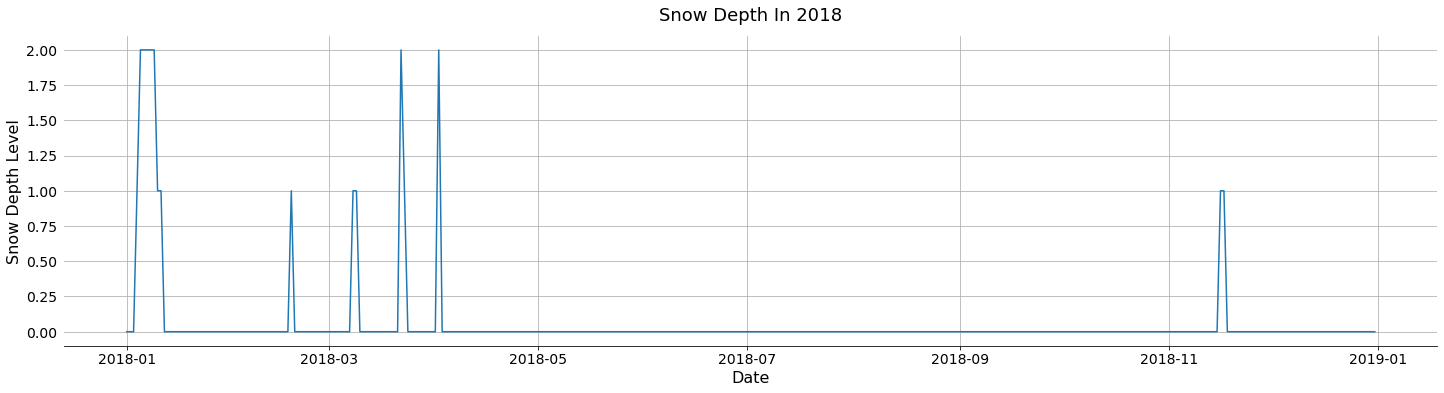

In [93]:
# Display a lineplot of snow depth vs day of year
plot_lineplot(
    weather_df,
    x_var="date",
    y_var="snow_depth_lvl",
    xlabel="Date",
    ylabel="Snow Depth Level",
    title="Snow Depth in 2018"
)

**Notes:** The line plot above shows the daily snow depth levels as a function of the date. Snowfalls only occur at few rare occasions during the coldest months of the year and snow usually rapidely melts within a few days. However its impact on traffic congestion can be considerable as it might increase the amount of accident and lower travel speed. The impact of snow depth on the distance, time and speed of daily taxi trips will be discussed below.

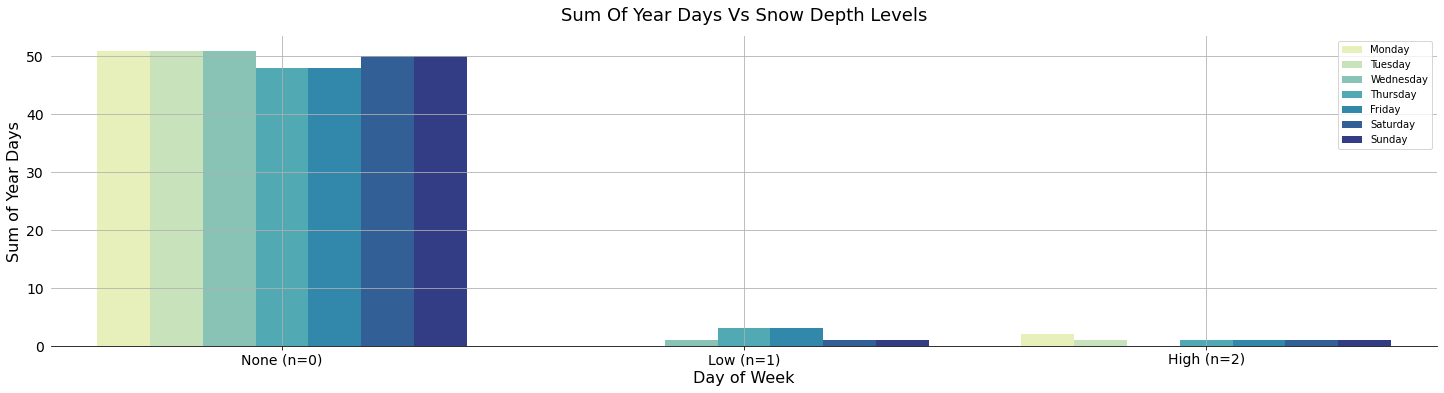

In [94]:
# Group the weather data by weekday and snow depth levels
# Compute the number days with specific snow depth levels
weather_count_temp = (
    weather_df.groupby(["weekday", "snow_depth_lvl"]).size().to_frame("count").reset_index()
).sort_values(["snow_depth_lvl", "weekday"])

# Replace numerical values by the name of the categories
weather_count_temp["snow_depth_lvl"] = weather_count_temp["snow_depth_lvl"].map(
    dict(zip(np.arange(0, 4), ["None (n=0)", "Low (n=1)", "High (n=2)"]))
)

# Replace numerical values by the name of the categories
weather_count_temp["weekday"] = weather_count_temp["weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a barplot sum of year days vs snow depth levels for all weekdays
plot_barplot(
    weather_count_temp,
    x_var="snow_depth_lvl",
    y_var="count",
    labels="weekday",
    xlabel="Day of Week",
    ylabel="Sum of Year Days",
    title="sum of year days vs snow depth levels",
)

**Note:** The barplot above shows the sum of days in the year that fall into one of the daily snow depth categories. As noted earlier, days with snowfall are rare, but snow generally remains for a few days on roads and other infrastructure. Both levels of snow depth cover most weekdays, but with very little frequency.

**Warnings:** The results obtained for a all levels of snow depth should be interpreted with caution due to their low frequency.

In [95]:
# Group taxi trips by pickup year-day, week-day, hour, and snow depth levels
# Compute the number of daily trip
pickup_count_dsnow = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_snow_depth_lvl"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_dsnow["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_dsnow["wf_snow_depth_lvl"] = pickup_count_dsnow["wf_snow_depth_lvl"].map(
    dict(zip(np.arange(0, 3), ["None", "Low", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_dsnow["pickup_weekday"] = pickup_count_dsnow["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_dsnow.head()

pickup_yearday pickup_weekday  pickup_hour wf_snow_depth_lvl  count
0               1         Monday            0              None    117
1               1         Monday            1              None    104
2               1         Monday            2              None    117
3               1         Monday            3              None     88
4               1         Monday            4              None     43

In [96]:
# Group taxi trips by pickup year-day, week-day, hour, and snow depth levels
# Compute the number of daily trip
pickup_count_dsnow_sub = (
    train_sub_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_snow_depth_lvl"]
    )
    .size()
    .to_frame("count")
    .reset_index()
)

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_dsnow_sub["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_dsnow_sub["wf_snow_depth_lvl"] = pickup_count_dsnow_sub["wf_snow_depth_lvl"].map(
    dict(zip(np.arange(0, 3), ["None", "Low", "High"]))
)

# Replace numerical values by the name of the categories
pickup_count_dsnow_sub["pickup_weekday"] = pickup_count_dsnow_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_dsnow_sub.head()

pickup_yearday pickup_weekday  pickup_hour wf_snow_depth_lvl  count
0               1         Monday            0              None      3
1               1         Monday            1              None      6
2               1         Monday            2              None      6
3               1         Monday            3              None      3
4               1         Monday            5              None      2

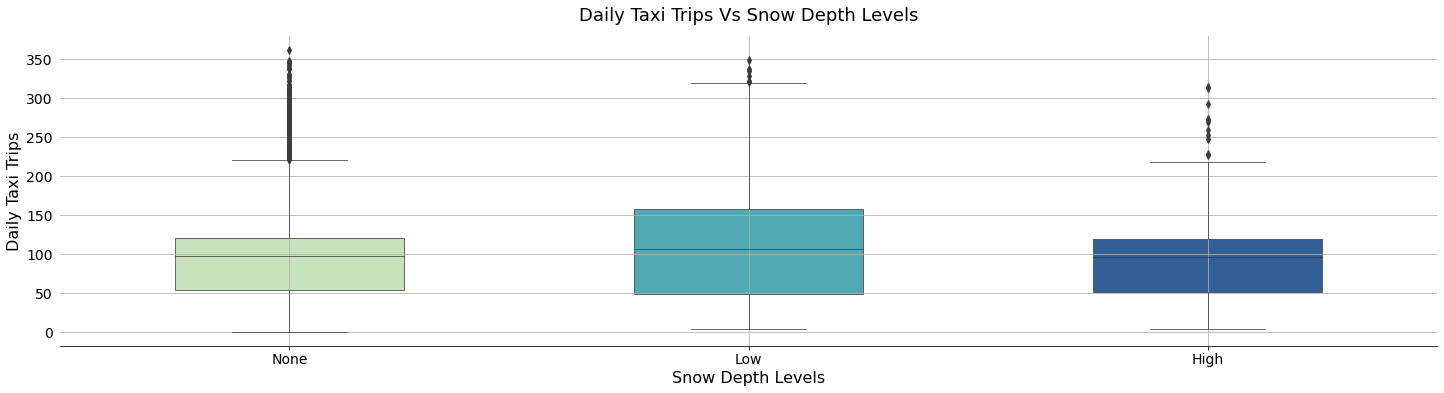

In [97]:
# Display a barplot of daily taxi trips vs snow depth levels
plot_boxplot(
    pickup_count_dsnow,
    x_var="wf_snow_depth_lvl",
    y_var="count",
    xlabel="Snow Depth Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs snow depth levels",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each snow depth level. No clear difference can be observed between the different snow depth levels.

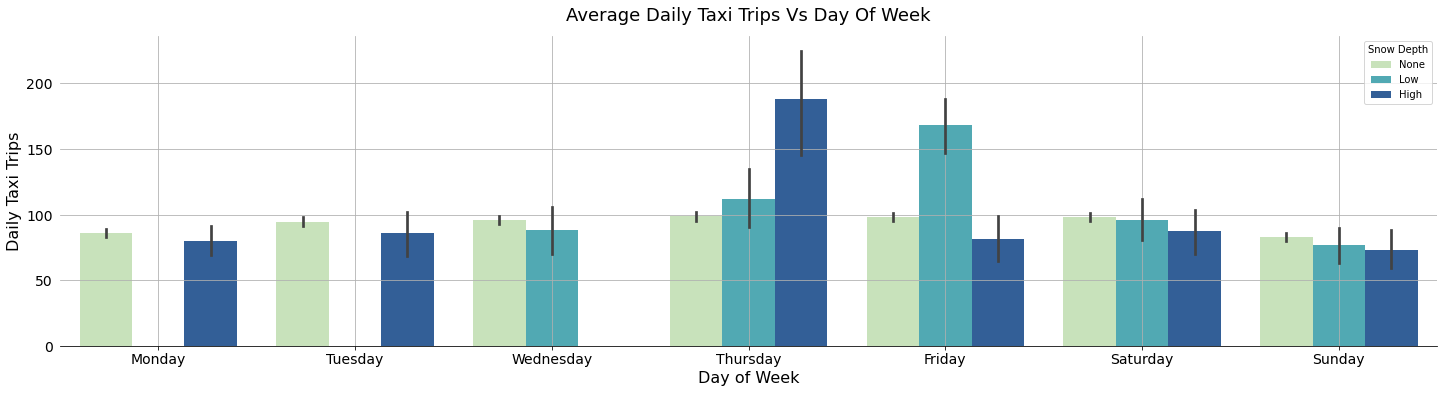

In [98]:
# Display a barplot of average daily taxi trips vs day of week for all snow depth levels
plot_barplot(
    pickup_count_dsnow,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_snow_depth_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="Snow Depth",
    title="average daily taxi trips vs day of week",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each snow depth level. No clear difference can be observed between the different snow depth levels, yet the high snow depth level is higher on thursday. New Yorkers may have used taxi more frequently during heavy snow storm.

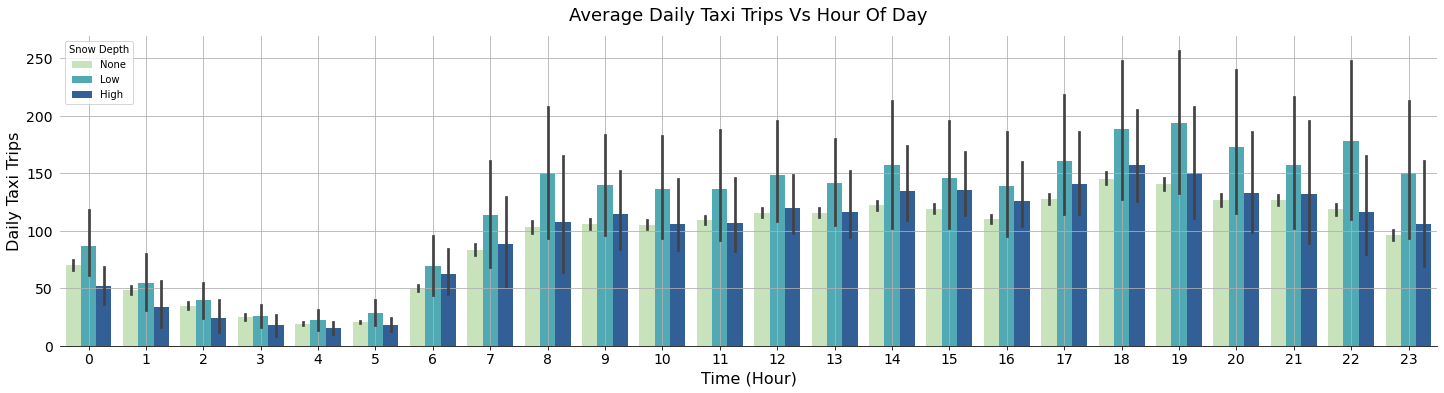

In [99]:
# Display a barplot of average daily taxi trips vs hour of day for all snow depth levels
plot_barplot(
    pickup_count_dsnow,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="Snow Depth",
    title="average daily taxi trips vs hour of day",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each snow depth level. No clear difference can be observed between the different precipitations levels.

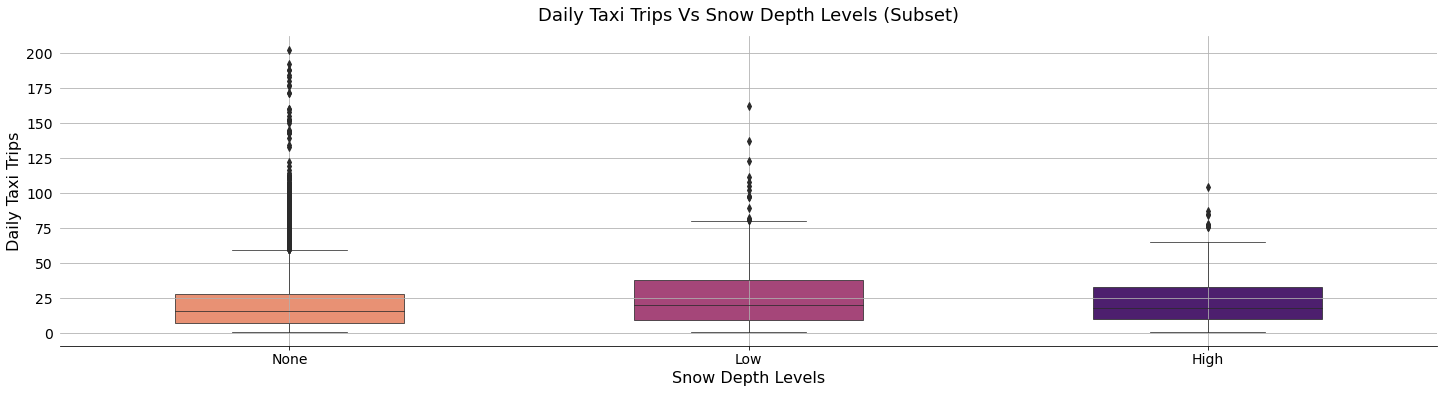

In [100]:
# Display a barplot of average daily taxi trips vs snow depth levels
plot_boxplot(
    pickup_count_dsnow_sub,
    x_var="wf_snow_depth_lvl",
    y_var="count",
    xlabel="Snow Depth Levels",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs snow depth levels (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each snow depth level. In the taxi trips subset, no clear difference can be observed between the different snow depth levels.

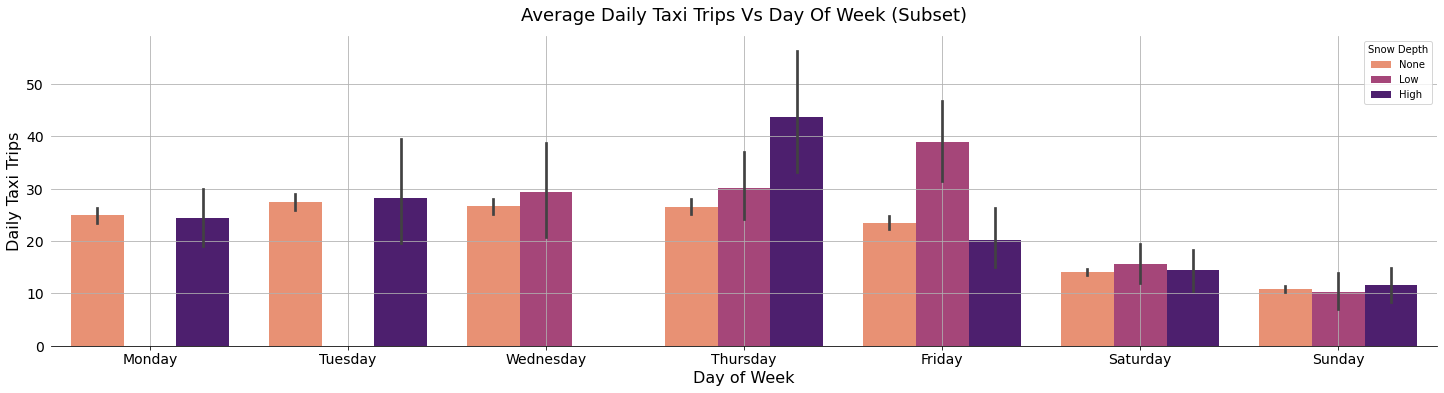

In [101]:
# Display a barplot of average daily taxi trips vs day of week for all snow depth levels
plot_barplot(
    pickup_count_dsnow_sub,
    x_var="pickup_weekday",
    y_var="count",
    labels="wf_snow_depth_lvl",
    xlabel="Day of Week",
    ylabel="Daily Taxi Trips",
    legend="Snow Depth",
    title="average daily taxi trips vs day of week (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each day of the week and each snow depth level. In the taxi trips subset, no clear difference can be observed between the different snow depth levels, yet the high snow depth level is higher on thursday. New Yorkers probably used taxi more frequently during heavy snow storm.

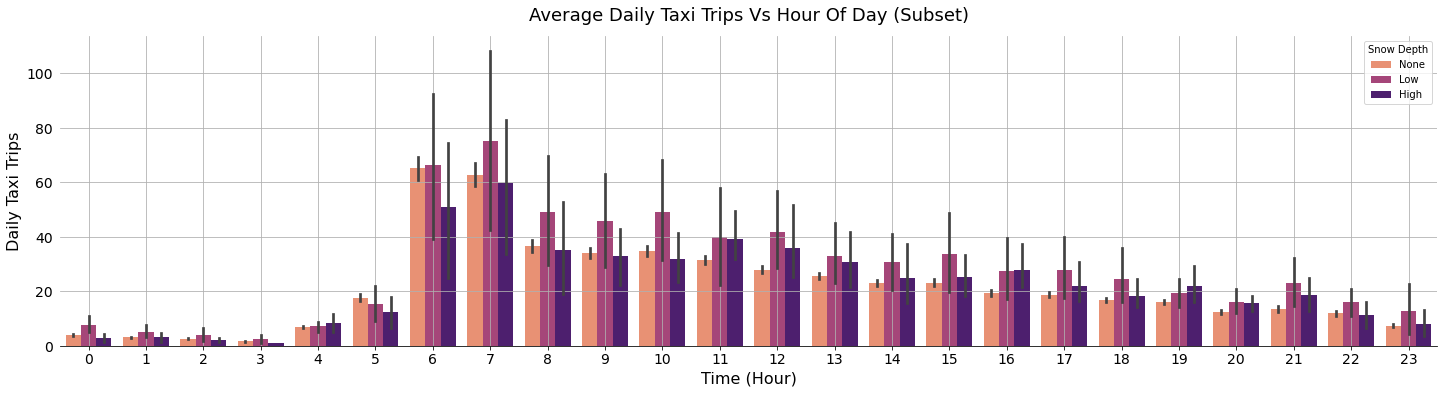

In [102]:
# Display a barplot of average daily taxi trips vs hour of day for all snow depth levels
plot_barplot(
    pickup_count_dsnow_sub,
    x_var="pickup_hour",
    y_var="count",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Daily Taxi Trips",
    legend="Snow Depth",
    title="average daily taxi trips vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** The barplot above shows the average number of daily taxi trips for each hour of the day and each snow depth level. In the taxi trips subset, no clear difference can be observed between the different precipitations levels.

In [103]:
# Group taxi trips by pickup year-day, week-day, hour, and snow depth levels
# Compute the mean of trip distances and durations
pickup_avg_dsnow = (
    train_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_snow_depth_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_avg_dsnow["trip_speed"] = np.divide(
    pickup_avg_dsnow["trip_distance"], np.divide(pickup_avg_dsnow["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_avg_dsnow["wf_snow_depth_lvl"] = pickup_avg_dsnow["wf_snow_depth_lvl"].map(
    dict(zip(np.arange(0, 3), ["None", "Low", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_dsnow["pickup_weekday"] = pickup_avg_dsnow["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_dsnow[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8759.000000    8759.000000  8759.000000
mean        4.527946      12.903568    21.884770
std         1.191982       2.456410     7.048098
min         1.609340       4.280952     6.325601
25%         3.757973      11.220652    16.110745
50%         4.247400      12.811538    20.315860
75%         4.970132      14.530928    26.433480
max        16.103458      27.379333    56.125353

In [104]:
# Group taxi trips by pickup year-day, week-day, hour, and snow depth levels
# Compute the mean of trip distances and durations
pickup_avg_dsnow_sub = (
    train_sub_df.groupby(["pickup_yearday", "pickup_weekday", "pickup_hour", "wf_snow_depth_lvl"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
pickup_avg_dsnow_sub["trip_speed"] = np.divide(
    pickup_avg_dsnow_sub["trip_distance"], np.divide(pickup_avg_dsnow_sub["trip_duration"], 60)
)

# Replace numerical values by the name of the categories
pickup_avg_dsnow_sub["wf_snow_depth_lvl"] = pickup_avg_dsnow_sub["wf_snow_depth_lvl"].map(
    dict(zip(np.arange(0, 3), ["None", "Low", "High"]))
)

# Replace numerical values by the name of the categories
pickup_avg_dsnow_sub["pickup_weekday"] = pickup_avg_dsnow_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_dsnow_sub[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8473.000000    8473.000000  8473.000000
mean        2.057241      10.448869    14.581679
std         0.192553       4.762699     6.765805
min         0.804670       2.000000     3.809506
25%         1.961671       6.375000     8.786640
50%         2.065776       9.457143    13.153260
75%         2.153128      14.131579    19.482481
max         3.266960      27.461538    56.487834

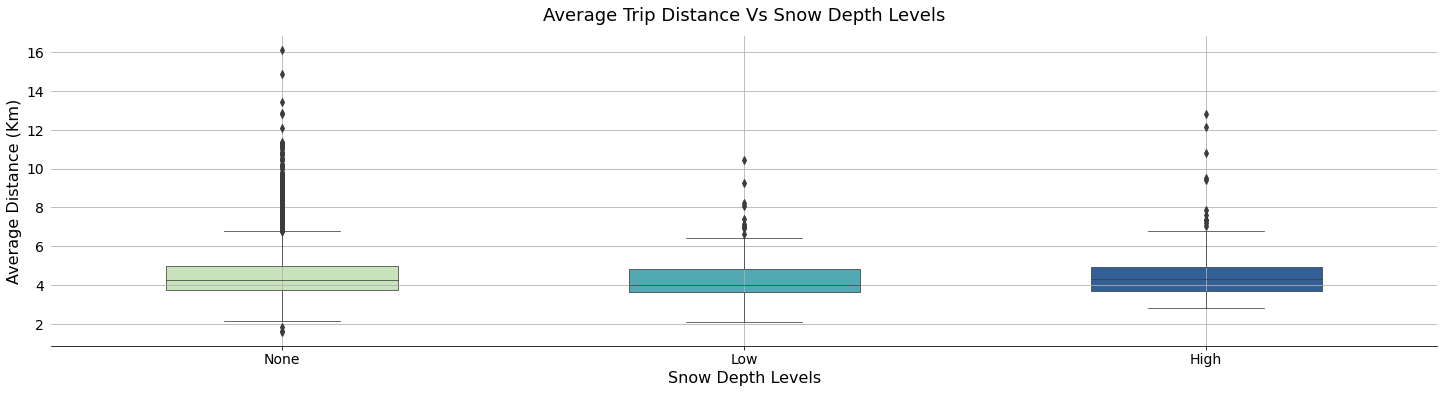

In [105]:
# Display a boxplot of average trip distance vs snow depth levels
plot_boxplot(
    pickup_avg_dsnow,
    x_var="wf_snow_depth_lvl",
    y_var="trip_distance",
    xlabel="Snow Depth Levels",
    ylabel="Average Distance (Km)",
    title="average trip distance vs snow depth levels",
)

**Notes:** the boxplot above shows the average daily distance traveled for each snow depth level. No clear difference could be observed between these different levels.

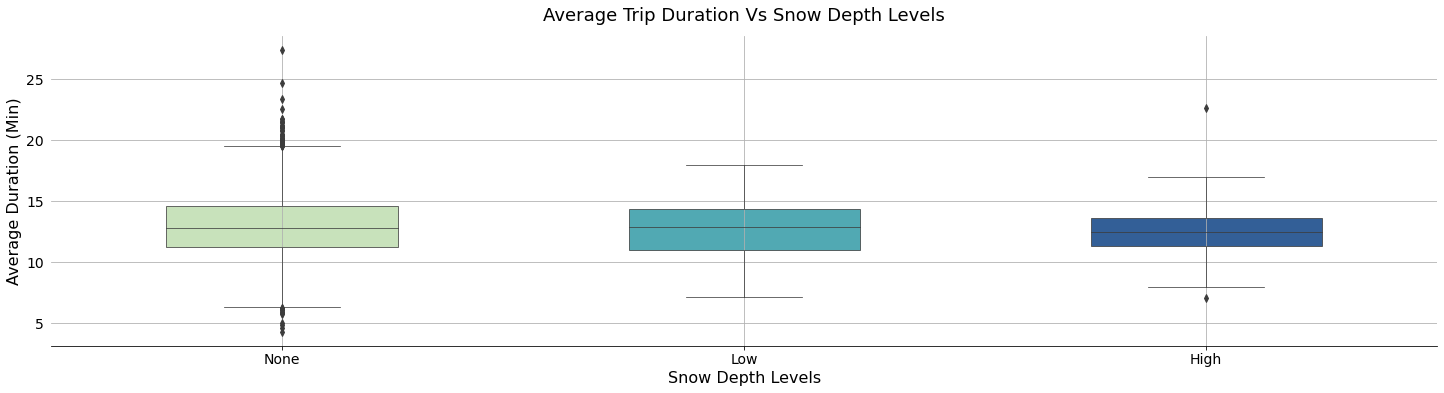

In [106]:
# Display a boxplot of average trip duration vs snow depth levels
plot_boxplot(
    pickup_avg_dsnow,
    x_var="wf_snow_depth_lvl",
    y_var="trip_duration",
    xlabel="Snow Depth Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs snow depth levels",
)

**Notes:** the boxplot above shows the average daily travel duration for each snow depth level. No clear difference could be observed between these different levels.

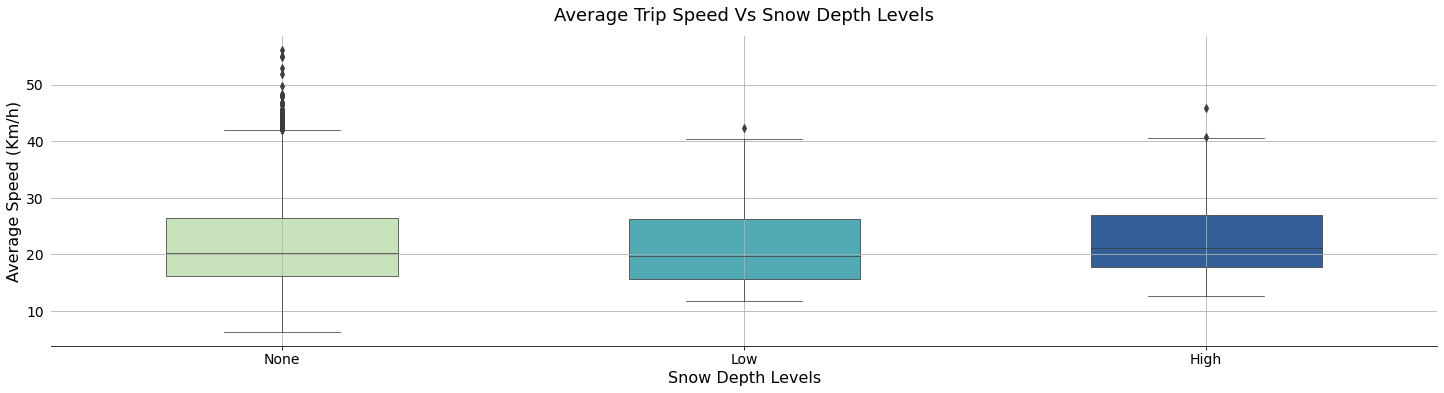

In [107]:
# Display a boxplot of average trip speed vs snow depth levels
plot_boxplot(
    pickup_avg_dsnow,
    x_var="wf_snow_depth_lvl",
    y_var="trip_speed",
    xlabel="Snow Depth Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs snow depth levels",
)

**Notes:** the boxplot above shows the average daily travel speed for each snow depth level. No clear difference could be observed between these different levels.

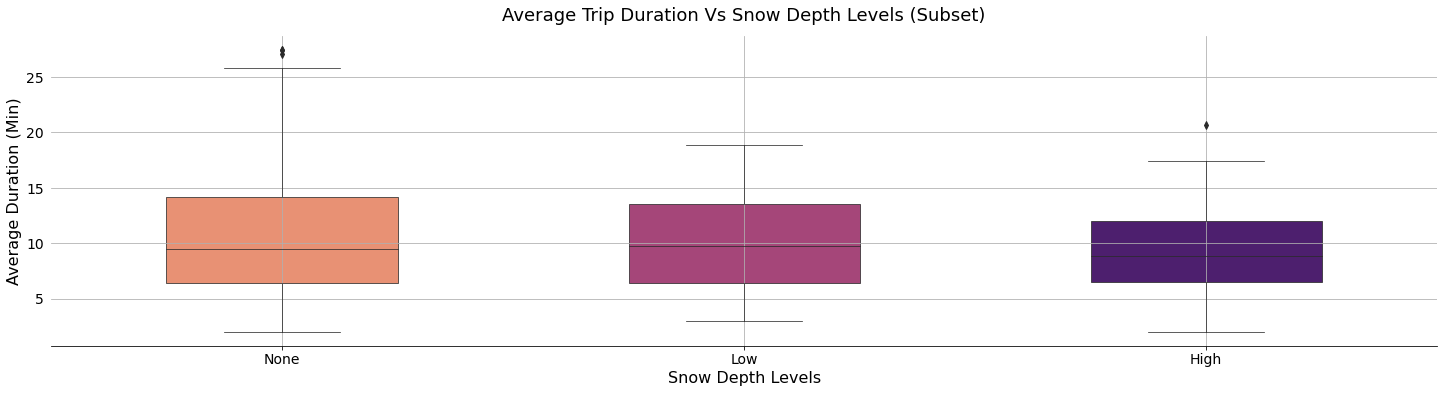

In [108]:
# Display a boxplot of average trip duration vs snow depth levels
plot_boxplot(
    pickup_avg_dsnow_sub,
    x_var="wf_snow_depth_lvl",
    y_var="trip_duration",
    xlabel="Snow Depth Levels",
    ylabel="Average Duration (Min)",
    title="average trip duration vs snow depth levels (subset)",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel duration for each snow depth level. In the taxi trips subset, no clear difference could be observed between these different levels.

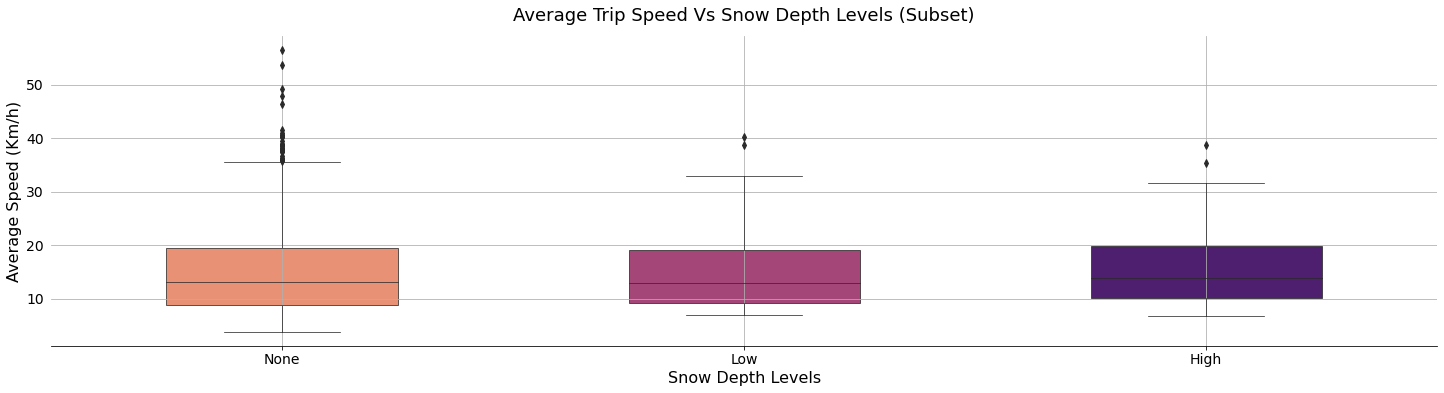

In [109]:
# Display a boxplot of average trip speed vs snow depth levels
plot_boxplot(
    pickup_avg_dsnow_sub,
    x_var="wf_snow_depth_lvl",
    y_var="trip_speed",
    xlabel="Snow Depth Levels",
    ylabel="Average Speed (Km/h)",
    title="average trip speed vs snow depth levels (subset)",
    palette="magma_r",
)

**Notes:** the boxplot above shows the average daily travel speed for each snow depth level. In the taxi trips subset, no clear difference could be observed between these different levels.

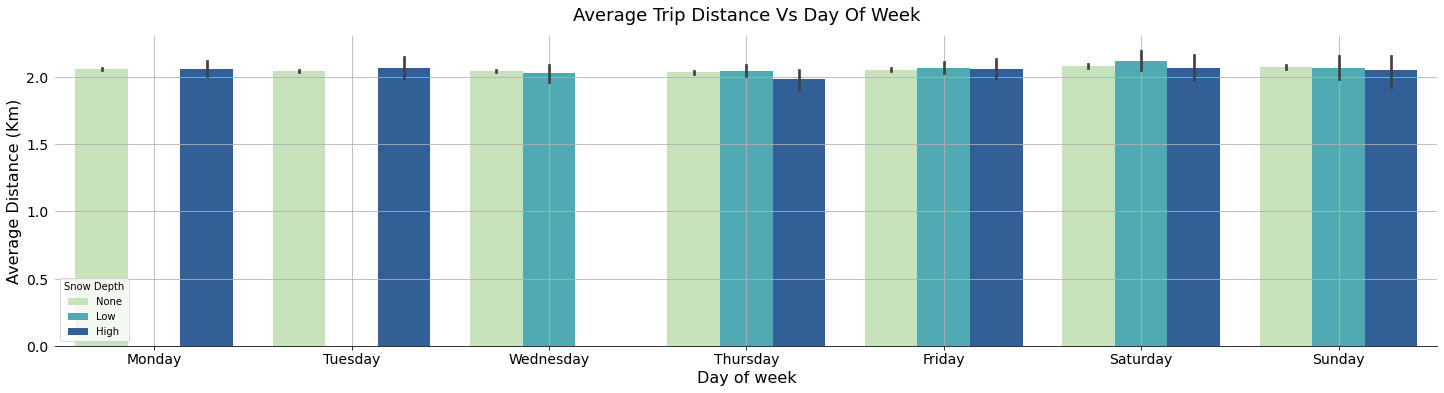

In [110]:
# Display a barplot of average trip distance vs day of week for all snow depth levels
plot_barplot(
    pickup_avg_dsnow_sub,
    x_var="pickup_weekday",
    y_var="trip_distance",
    labels="wf_snow_depth_lvl",
    xlabel="Day of week",
    ylabel="Average Distance (Km)",
    legend="Snow Depth",
    title="average trip distance vs day of week",
)

**Notes:** the barplot above shows the average daily distance travelled for each day of the week and each snow depth level. No clear difference could be observed between these different levels.

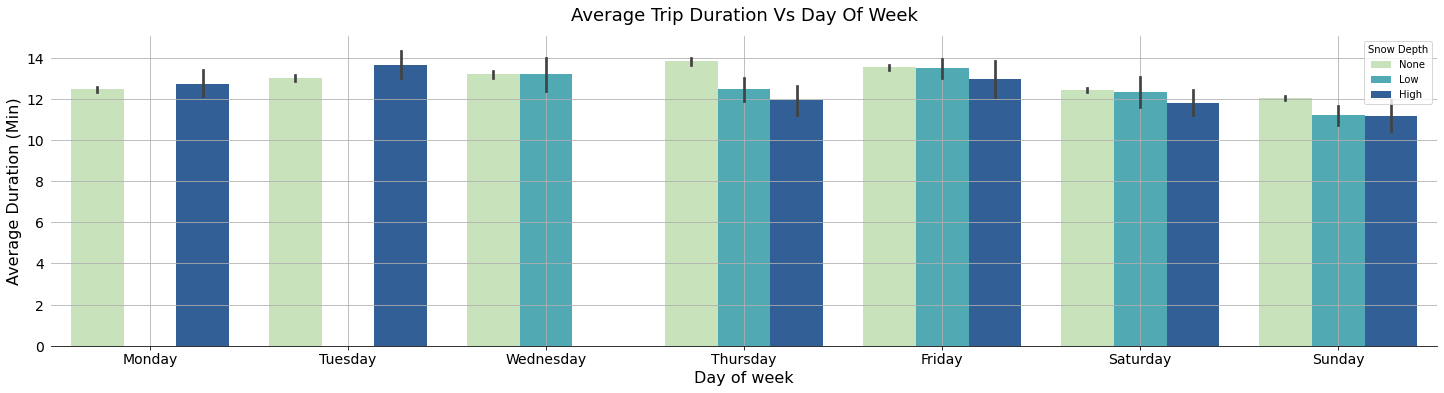

In [111]:
# Display a barplot of average trip duration vs day of week for all snow depth levels
plot_barplot(
    pickup_avg_dsnow,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_snow_depth_lvl",
    xlabel="Day of week",
    ylabel="Average Duration (Min)",
    legend="Snow Depth",
    title="average trip duration vs day of week",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and each snow depth level. No clear difference could be observed between these different levels. However, a few days show a decrease in average travel time with both low and high snow depth, indicating that snow can affect traffic under specific conditions.

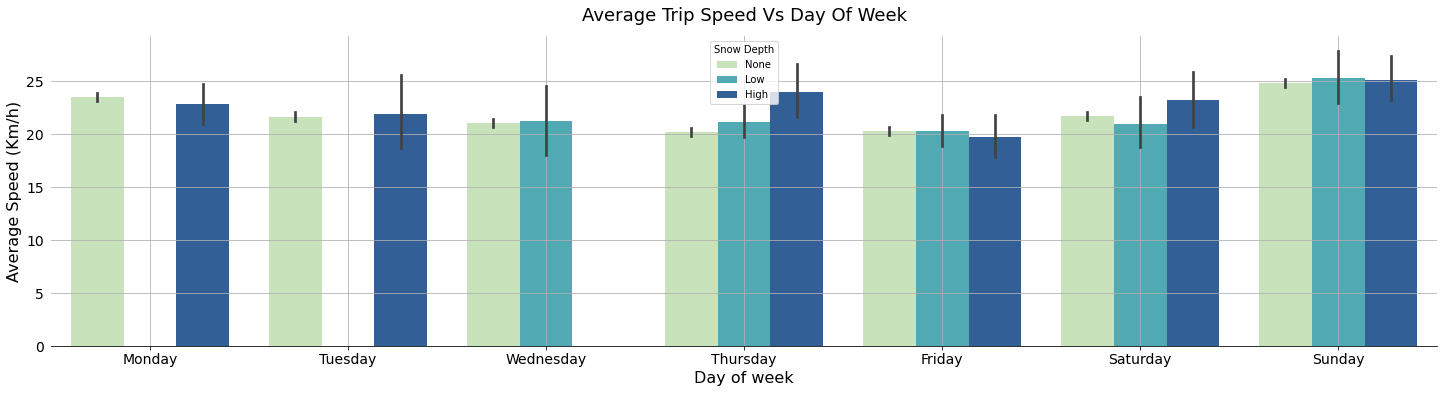

In [112]:
# Display a barplot of average trip speed vs day of week for all snow depth levels
plot_barplot(
    pickup_avg_dsnow,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_snow_depth_lvl",
    xlabel="Day of week",
    ylabel="Average Speed (Km/h)",
    legend="Snow Depth",
    title="average trip speed vs day of week",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and each snow depth level. No clear difference could be observed between these different levels.

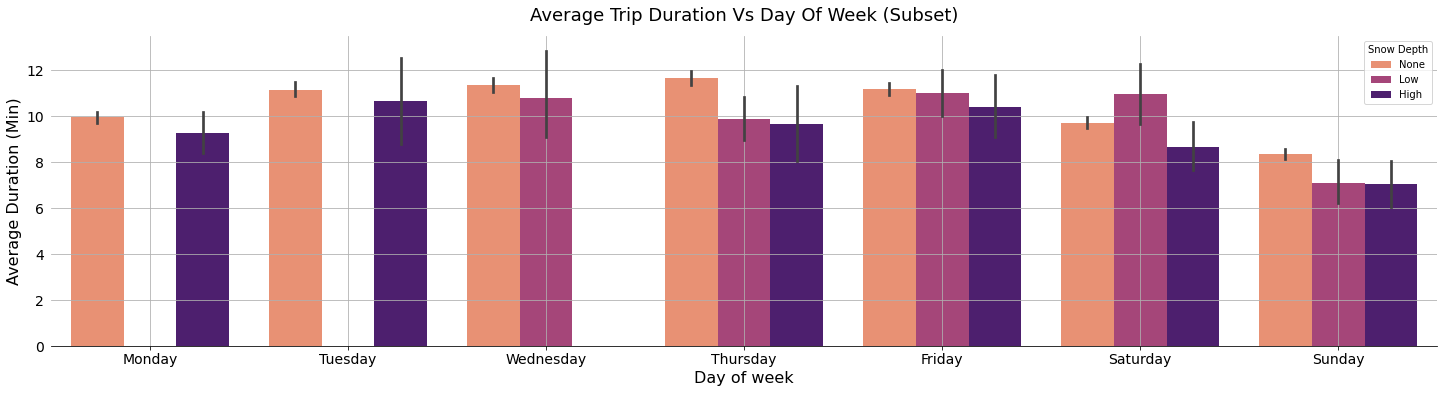

In [113]:
# Display a barplot of average trip duration vs day of week for all snow depth levels
plot_barplot(
    pickup_avg_dsnow_sub,
    x_var="pickup_weekday",
    y_var="trip_duration",
    labels="wf_snow_depth_lvl",
    xlabel="Day of week",
    ylabel="Average Duration (Min)",
    legend="Snow Depth", title="average trip duration vs day of week (subset)",palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel duration for each day of the week and each snow depth level. In the taxi trips susbet, no clear difference could be observed between these different levels. However, a few days show a slighly decrease in average travel time with both low and high snow depth, indicating that snow can affect traffic under specific conditions.

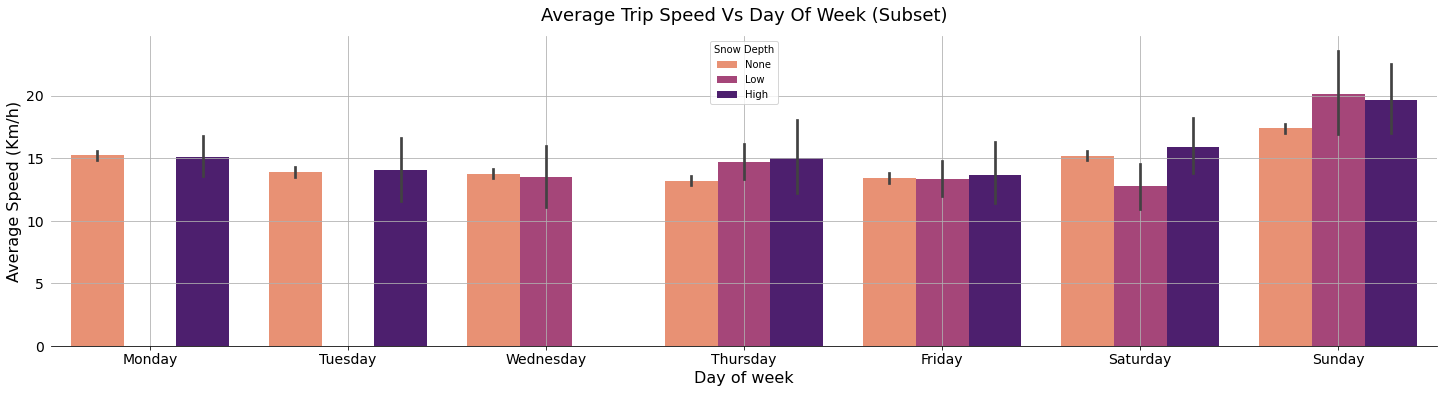

In [114]:
# Display a barplot of average trip speed vs day of week for all snow depth levels
plot_barplot(
    pickup_avg_dsnow_sub,
    x_var="pickup_weekday",
    y_var="trip_speed",
    labels="wf_snow_depth_lvl",
    xlabel="Day of week",
    ylabel="Average Speed (Km/h)",
    legend="Snow Depth", title="average trip speed vs day of week (subset)",palette="magma_r",
)

**Notes:** the barplot above shows the average daily travel speed for each day of the week and each snow depth level. In the taxi trips susbet, no clear difference could be observed between these different levels.

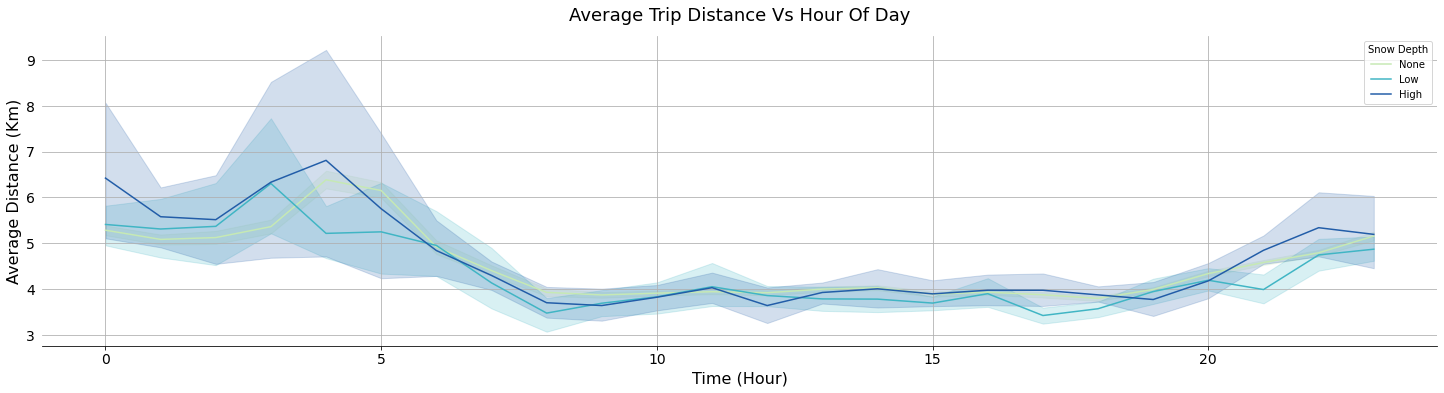

In [115]:
# Display a lineplot of average trip distance vs hour of day for all snow depth levels
plot_lineplot(
    pickup_avg_dsnow,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Distance (Km)",
    legend="Snow Depth",title="average trip distance vs hour of day"
)

**Notes:** the lineplot above shows the average daily distance traveled for each hour of the day and snow depth level. No clear differences could be observed between these different levels.

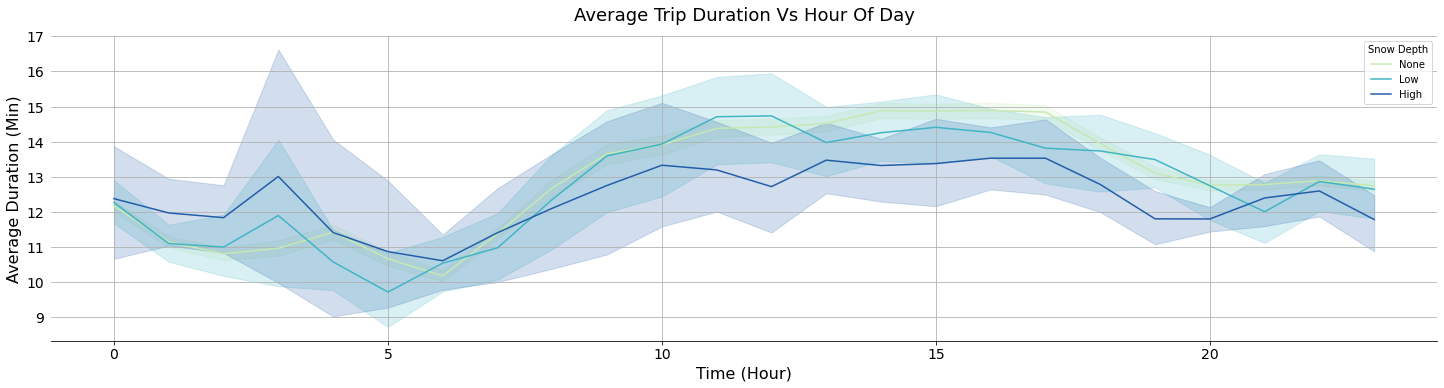

In [116]:
# Display a lineplot of average trip duration vs hour of day for all snow depth levels
plot_lineplot(
    pickup_avg_dsnow,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="Snow Depth",title="average trip duration vs hour of day"
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and snow depth level. No clear differences could be observed between these different levels. However, by examining the variation in high snow depth, we can observe that under specific conditions, snow can strongly affect travel time.

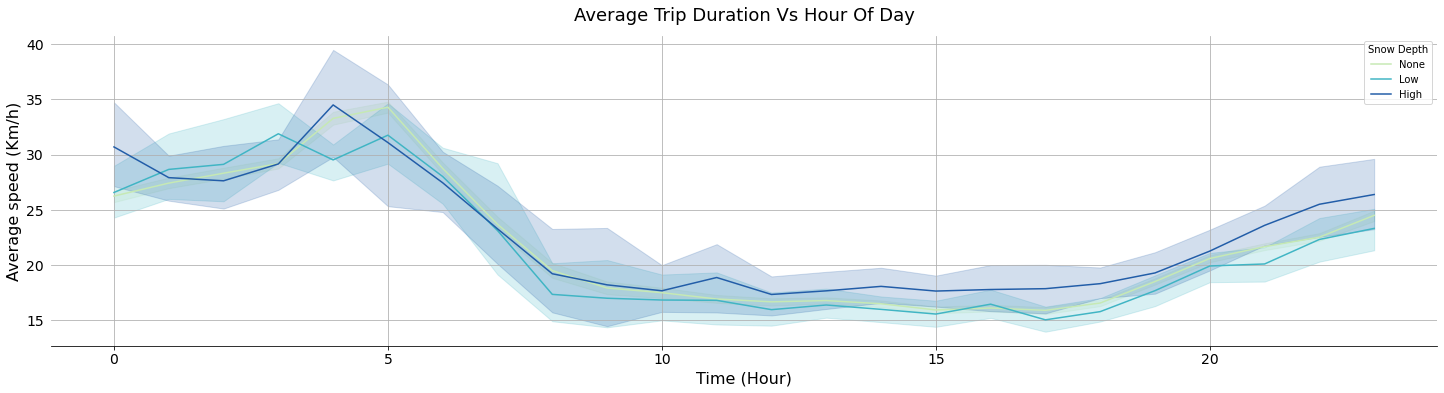

In [117]:
# Display a lineplot of average trip duration vs hour of day for all now depth levels
plot_lineplot(
    pickup_avg_dsnow,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="Snow Depth",title="average trip duration vs hour of day"
)

**Notes:** the lineplot above shows the average daily travel speedfor each hour of the day and snow depth level. No clear differences could be observed between these different levels.

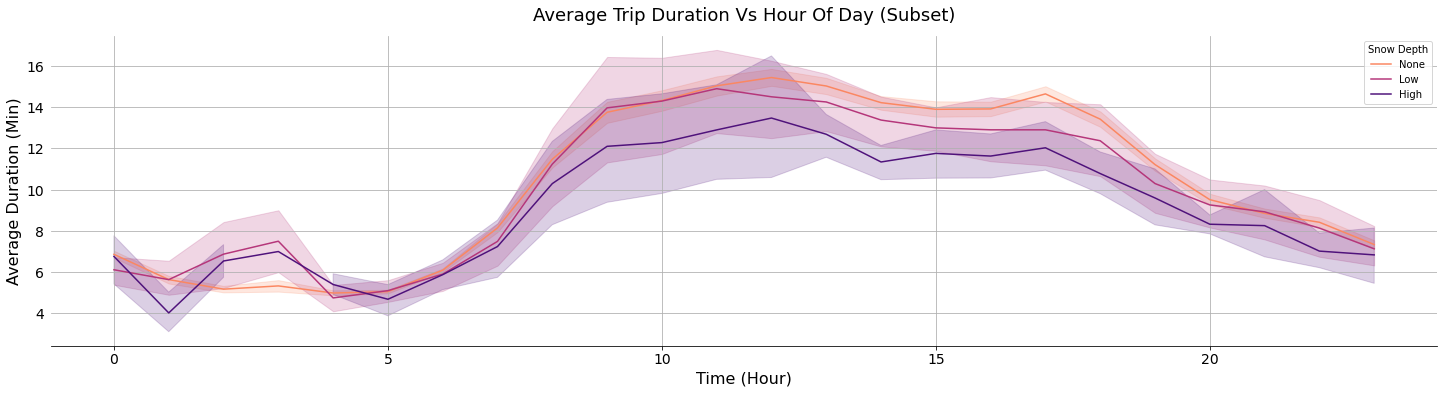

In [118]:
# Display a lineplot of average trip duration vs hour of day for all snow depth levels
plot_lineplot(
    pickup_avg_dsnow_sub,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Average Duration (Min)",
    legend="Snow Depth",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel duration for each hour of the day and snow depth level. In the taxi trips subset, no clear differences could be observed between these different levels. However, by examining the variation in high snow depth, we can observe that under specific conditions, snow can will affect travel time.

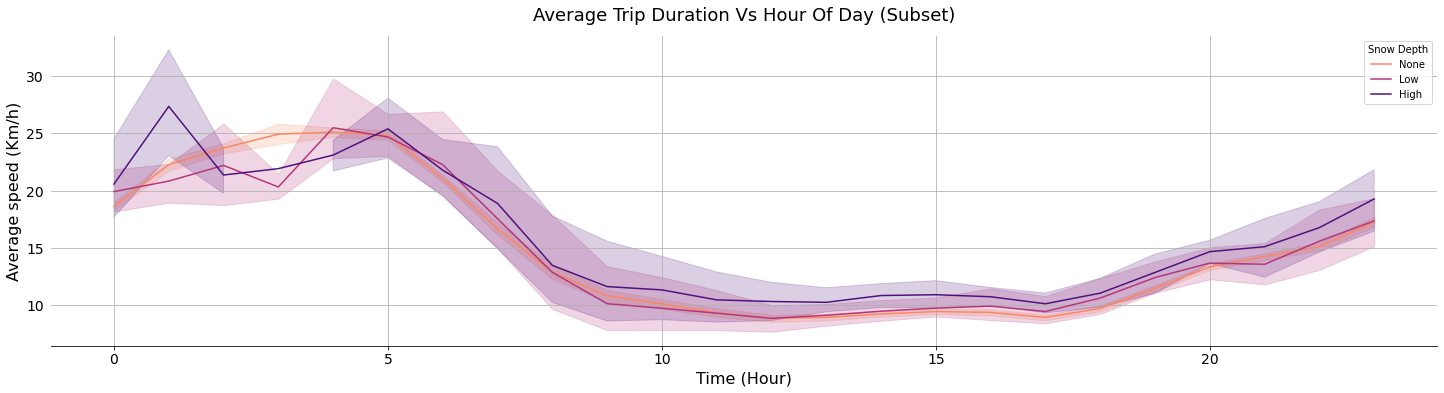

In [119]:
# Display a lineplot of average trip duration vs hour of day for all now depth levels
plot_lineplot(
    pickup_avg_dsnow_sub,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="wf_snow_depth_lvl",
    xlabel="Time (Hour)",
    ylabel="Average speed (Km/h)",
    legend="Snow Depth",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Notes:** the lineplot above shows the average daily travel speedfor each hour of the day and snow depth level. In the taxi trips subset, no clear differences could be observed between these different levels.

## 2.2.1 External Dataset: Temporal Analysis of Holidays Data 
### Goal:
Detect and describe patterns, trends, and relationships among temporal features in a subset (1%) of the 2018 NYC yellow cab trip dataset to identify holidays and celebrations that may impact traffic flow, and thus trip duration, in and around New York City.
### Code:

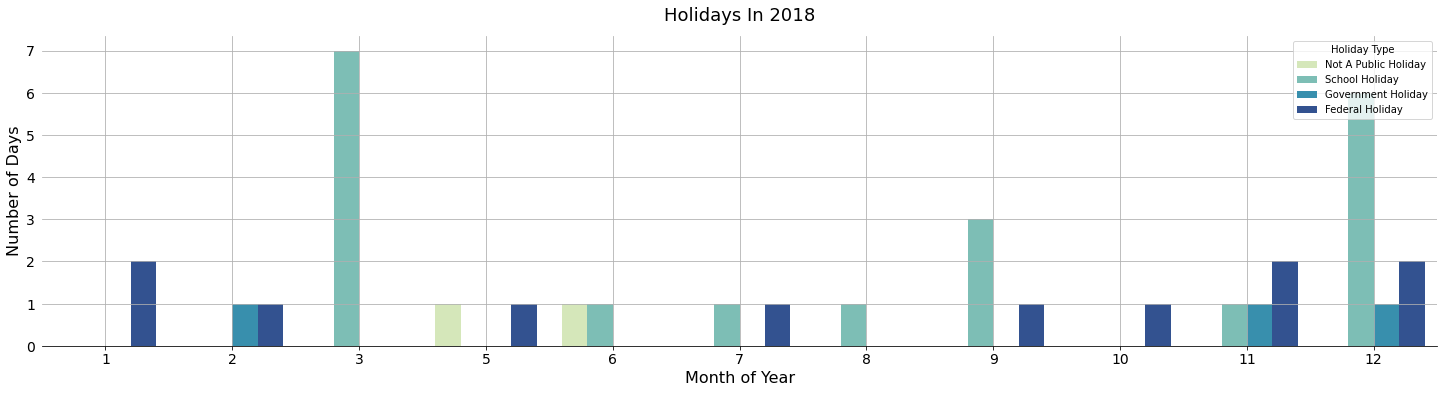

In [120]:
# Add a month column to the weather data frame
holidays_df["holiday_month"] = holidays_df["holiday_date"].dt.month

# Add a month column to the weather data frame
holidays_df["holiday_weekday"] = holidays_df["holiday_date"].dt.dayofweek

# Group the holidays data by wholiday date and type
# Compute the number days with specific average holiday types
holidays_count_viz = (
    holidays_df.groupby(["holiday_month", "holiday_type"])
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["holiday_type", "holiday_month"])


# Replace numerical values by the name of the categories
holidays_count_viz["holiday_type"] = holidays_count_viz["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            [
                "Not A Public Holiday",
                "School Holiday",
                "Government Holiday",
                "Federal Holiday",
            ],
        )
    )
)

# Display a barplot of the monthly holidays
plot_barplot(
    holidays_count_viz,
    x_var="holiday_month",
    y_var="count",
    labels="holiday_type",
    xlabel="Month of Year",
    ylabel="Number of Days",
    legend="Holiday Type",
    title="Holidays in 2018",
)

**Note:** the barplot above shows the number of holidays per month for each holiday category. School vacations are the most common type of vacation during the year, followed by federal and government vacations.

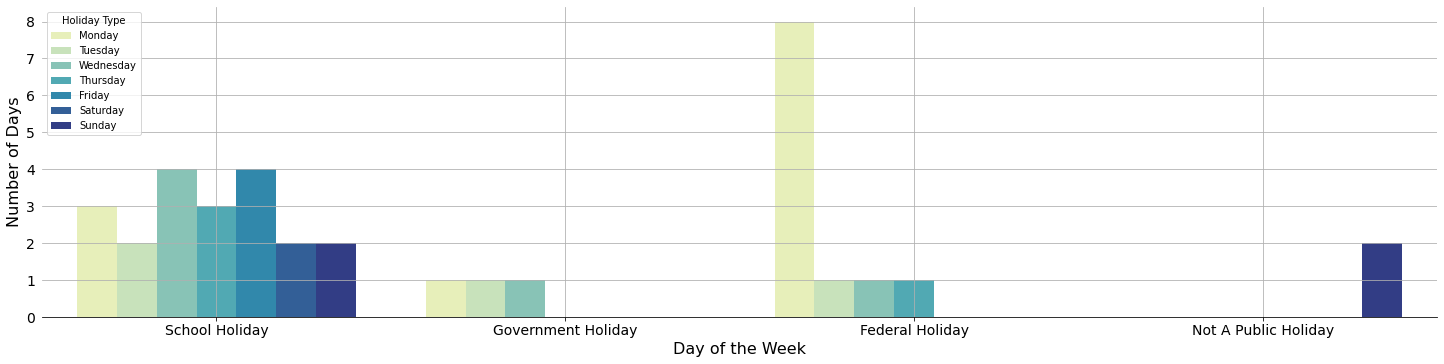

In [121]:
# Group the holidays data by wholiday date and type
# Compute the number days with specific average holiday types
holidays_count_viz = (
    holidays_df.groupby(["holiday_weekday", "holiday_type"])
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["holiday_weekday", "holiday_type"])


# Replace numerical values by the name of the categories
holidays_count_viz["holiday_type"] = holidays_count_viz["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            [
                "Not A Public Holiday",
                "School Holiday",
                "Government Holiday",
                "Federal Holiday",
            ],
        )
    )
)

# Replace numerical values by the name of the categories
holidays_count_viz["holiday_weekday"] = holidays_count_viz["holiday_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display a barplot of the monthly holidays
plot_barplot(
    holidays_count_viz,
    x_var="holiday_type",
    y_var="count",
    labels="holiday_weekday",
    xlabel="Day of the Week",
    ylabel="Number of Days",
    legend="Holiday Type",title=""
)

**Note:** The barplot above shows the sum of days in the year that fall into one of the holidays cateogry. School holidays may be every day of the week, while government and federal holidays are mostly on weekdays. The two holidays which are not considered as public holidays but more as celebrations occur on sunday. This is noteworthy since the number of taxi trips, their distance, duration, and speed are all highly dependent on the day of the week and hour of the day.

In [122]:
# Group taxi trips by pickup year-day, week-day, hour, holiday, and holiday type
# Compute the number of daily trip
pickup_count_holidays = (
    train_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "holiday", "holiday_type"]
    )
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["holiday_type", "pickup_weekday"])

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_holidays["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_holidays["holiday"] = pickup_count_holidays["holiday"].map(
    {0: "Not a Holiday", 1: "Holiday"}
)

# Replace numerical values by the name of the categories
pickup_count_holidays["holiday_type"] = pickup_count_holidays["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            holidays_type,
        )
    )
)

# Replace numerical values by the name of the categories
pickup_count_holidays["pickup_weekday"] = pickup_count_holidays["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_holidays.head()

pickup_yearday pickup_weekday  pickup_hour        holiday  \
168               8         Monday            0  Not a Holiday   
169               8         Monday            1  Not a Holiday   
170               8         Monday            2  Not a Holiday   
171               8         Monday            3  Not a Holiday   
172               8         Monday            4  Not a Holiday   

             holiday_type  count  
168  Not A Public Holiday     27  
169  Not A Public Holiday     13  
170  Not A Public Holiday      9  
171  Not A Public Holiday      5  
172  Not A Public Holiday      9

In [123]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature
# Compute the number of daily trip
pickup_count_holidays_sub = (
    train_sub_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "holiday", "holiday_type"]
    )
    .size()
    .to_frame("count")
    .reset_index()
).sort_values(["holiday_type", "pickup_weekday"])

# Replace zero counts with NaN to prevent lowering the average.
pickup_count_holidays_sub["count"].replace(0, np.nan, inplace=True)

# Replace numerical values by the name of the categories
pickup_count_holidays_sub["holiday"] = pickup_count_holidays_sub["holiday"].map(
    {0: "Not a Holiday", 1: "Holiday"}
)

# Replace numerical values by the name of the categories
pickup_count_holidays_sub["holiday_type"] = pickup_count_holidays_sub["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            holidays_type,
        )
    )
)

# Replace numerical values by the name of the categories
pickup_count_holidays_sub["pickup_weekday"] = pickup_count_holidays_sub["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display the first five rows of the data frame
pickup_count_holidays_sub.head()

pickup_yearday pickup_weekday  pickup_hour        holiday  \
160               8         Monday            0  Not a Holiday   
161               8         Monday            1  Not a Holiday   
162               8         Monday            2  Not a Holiday   
163               8         Monday            4  Not a Holiday   
164               8         Monday            5  Not a Holiday   

             holiday_type  count  
160  Not A Public Holiday      6  
161  Not A Public Holiday      2  
162  Not A Public Holiday      2  
163  Not A Public Holiday     12  
164  Not A Public Holiday     17

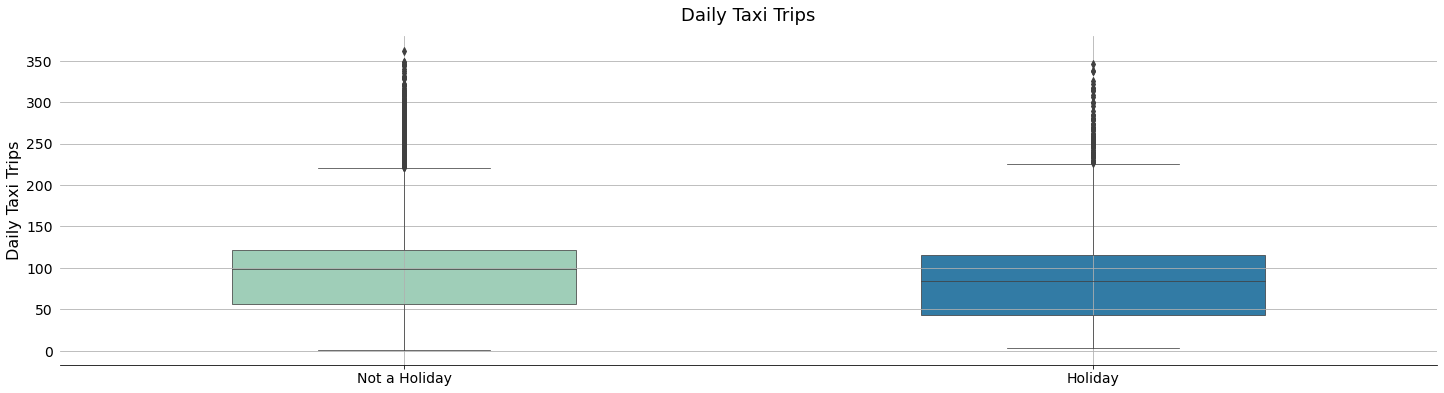

In [124]:
# Display a boxplot of daily taxi trip vs holidays
plot_boxplot(
    pickup_count_holidays,
    x_var="holiday",
    y_var="count",
    xlabel="",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips",
)

**Note:** the boxplot above shows the average number of daily taxi trips for vacation and regular days. Overall, there is no difference in the number of cab rides between vacation days and normal days. However, we have seen above that this is not entirely accurate, as during the spring break the number of trips increases substantially, while fewer trips were observed for several other holidays, such as Christmas Eve. 

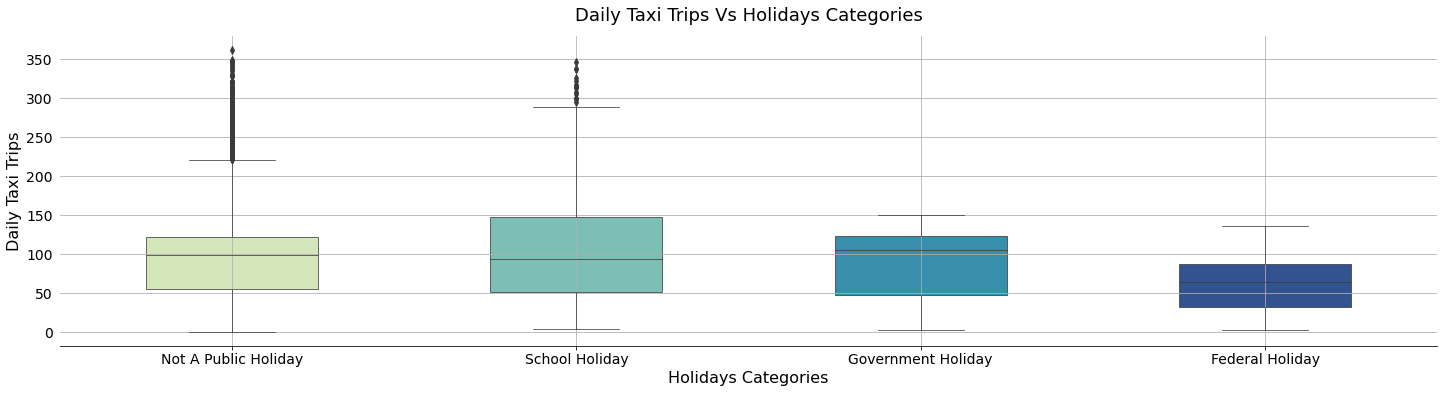

In [125]:
# Display a barplot of average taxi trips vs holidays categories
plot_boxplot(
    pickup_count_holidays,
    x_var="holiday_type",
    y_var="count",
    xlabel="Holidays Categories",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs holidays categories",
)

**Note:** the boxplot above shows the average number of daily taxi trips for each holidays category. The average number of daily taxi trips is lower for federal holidays.

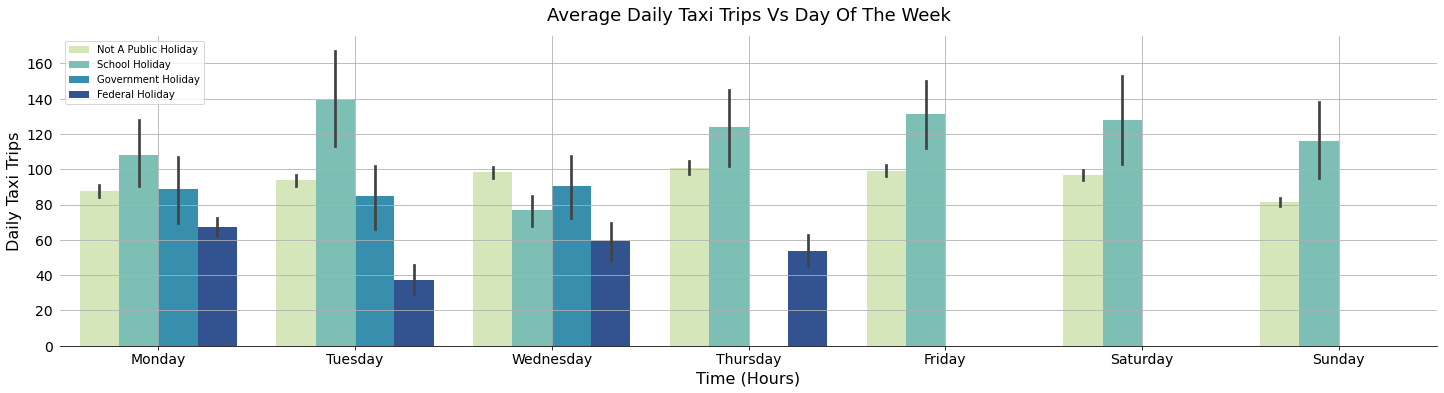

In [126]:
# Display a barplot of average daily taxi trips vs day of the week for all holidays categories
plot_barplot(
    pickup_count_holidays,
    x_var="pickup_weekday",
    y_var="count",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Daily Taxi Trips",
    title="average daily taxi trips vs day of the week",
)

**Note:** the boxplot above shows the average number of daily taxi trips for each day of the week and each holidays category. The average number of taxi trips is lower for federal holidays for each week days and marginally higer for school holidays compared to non-holidays.

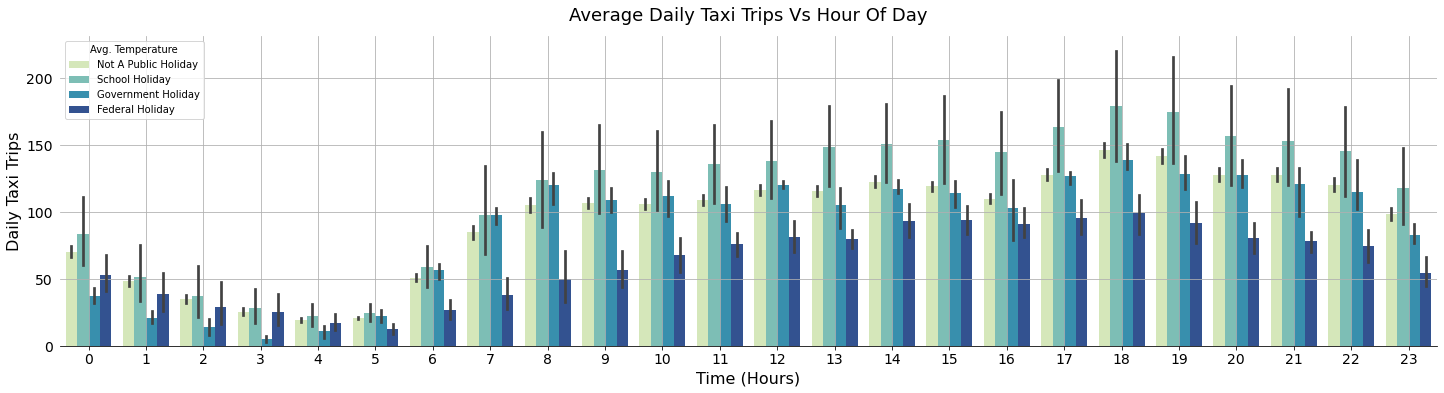

In [127]:
# Display a barplot of average daily taxi trips vs hour of day for all holidays categories
plot_barplot(
    pickup_count_holidays,
    x_var="pickup_hour",
    y_var="count",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Daily Taxi Trips",
    legend="Avg. Temperature",
    title="average daily taxi trips vs hour of day",
)

**Note:** the barplot above shows the average number daily of taxi trips for each hour of the day and each holidays category. The average number of cab trips is lower during the peak hours.

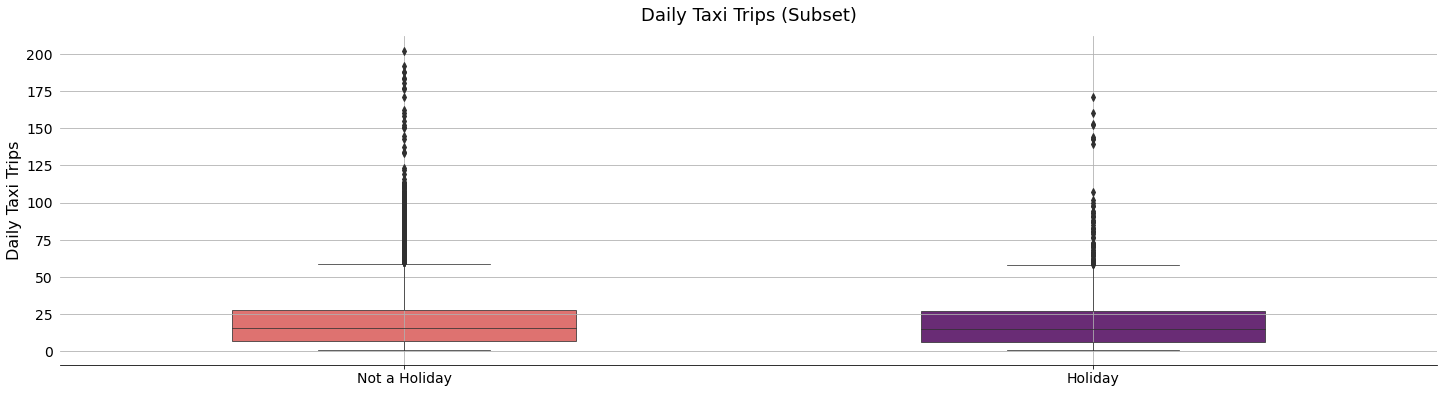

In [128]:
# Display a barplot of average daily taxi trip vs holidays
plot_boxplot(
    pickup_count_holidays_sub,
    x_var="holiday",
    y_var="count",
    xlabel="",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips (subset)",
    palette="magma_r",
)

**Note:** the boxplot above shows the average number of daily taxi trips for vacation and regular days. In the taxi trips subset, no difference in the number of taxi trips between vacation days and normal days could be observed.

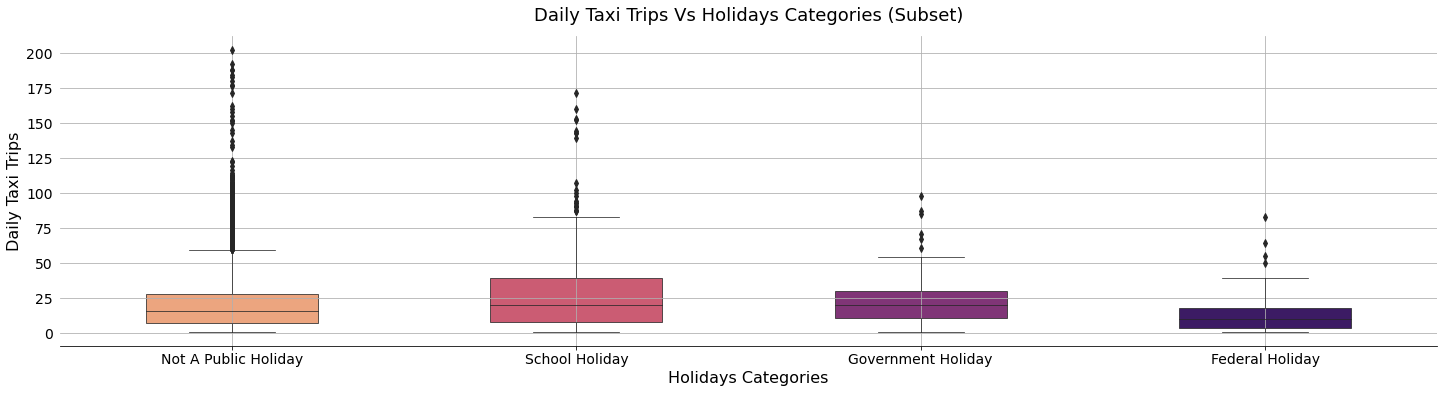

In [129]:
# Display a barplot of average daily taxi trips vs holidays categories
plot_boxplot(
    pickup_count_holidays_sub,
    x_var="holiday_type",
    y_var="count",
    xlabel="Holidays Categories",
    ylabel="Daily Taxi Trips",
    title="daily taxi trips vs holidays categories (subset)",
    palette="magma_r",
)

**Note:** the  boxplot above shows the average number of daily taxi trips for each holidays category. In the taxi trips subset, the average number of daily taxi trips is also lower for federal holidays and slightly higher for school vacations compared to non-holidays.

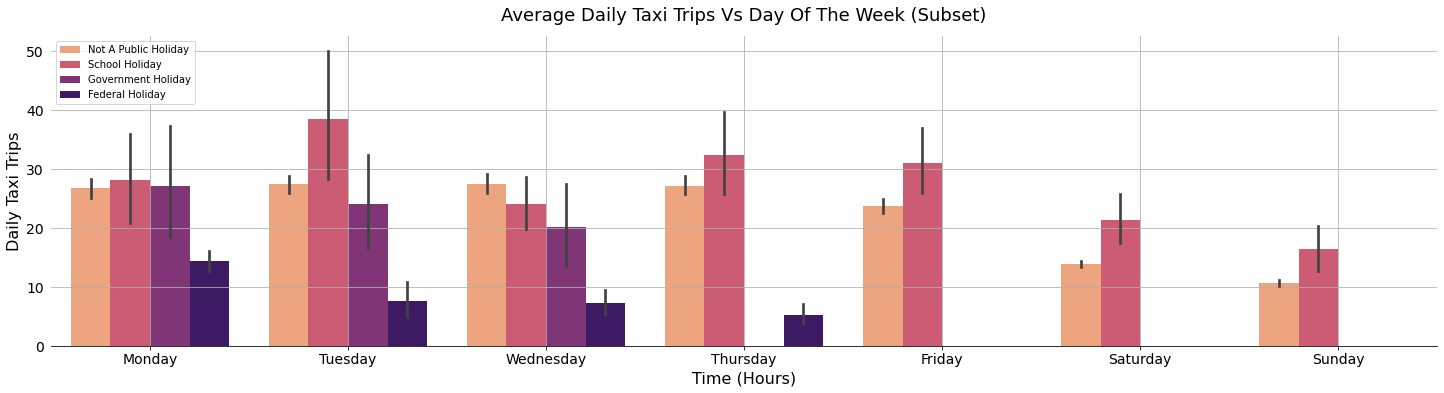

In [130]:
# Display a barplot of average daily taxi trips vs day of the week for all holidays categories
plot_barplot(
    pickup_count_holidays_sub,
    x_var="pickup_weekday",
    y_var="count",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Daily Taxi Trips",
    title="average daily taxi trips vs day of the week (subset)",
    palette="magma_r",
)

**Note:** the barplot above shows the average number of daily taxi trips for each day of the week and each holidays category. In the taxi trips subset, the average number of taxi trips is also lower for federal holidays for each week days and marginally higer for school holidays compared to non-holidays.

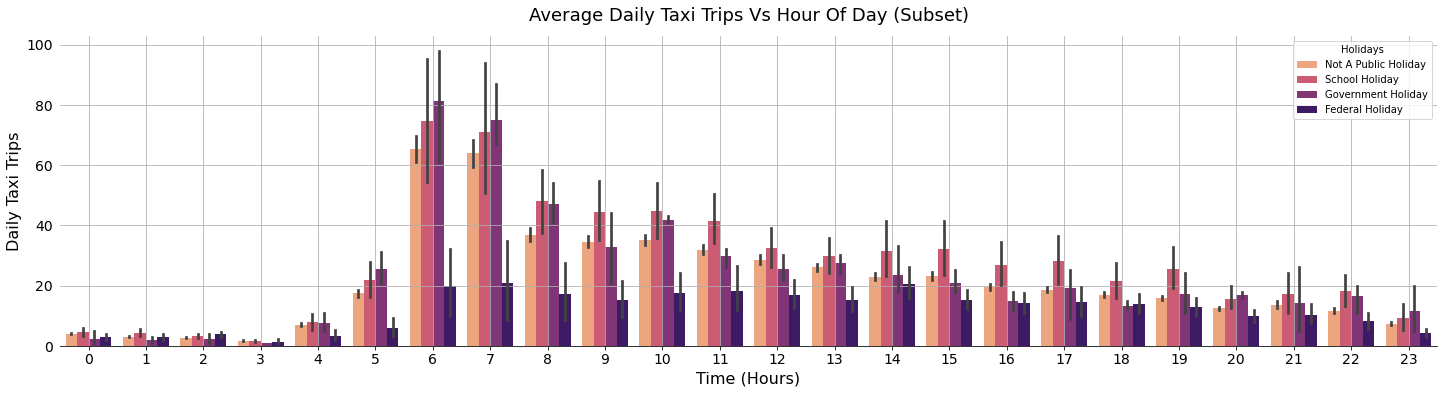

In [131]:
# Display a barplot of average daily taxi trips vs hour of day for all holidays categories
plot_barplot(
    pickup_count_holidays_sub,
    x_var="pickup_hour",
    y_var="count",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Daily Taxi Trips",
    legend="Holidays",
    title="average daily taxi trips vs hour of day (subset)",
    palette="magma_r",
)

**Note:** the barplot above shows the average number daily of taxi trips for each hour of the day and each holidays category. The average number of taxi trips is lower for federal holidays especially during early morning.

In [132]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature levels
# Compute the mean of trip distances and durations
pickup_avg_holidays = (
    train_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "holiday", "holiday_type"]
    )
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
).sort_values(["holiday_type", "pickup_weekday"])

# Compute the average trip speed
pickup_avg_holidays["trip_speed"] = np.divide(
    pickup_avg_holidays["trip_distance"],
    np.divide(pickup_avg_holidays["trip_duration"], 60),
)

# Replace numerical values by the name of the categories
pickup_avg_holidays["holiday_type"] = pickup_avg_holidays["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            holidays_type,
        )
    )
)

# Replace numerical values by the name of the categories
pickup_avg_holidays["pickup_weekday"] = pickup_avg_holidays["pickup_weekday"].map(
    dict(zip(np.arange(0, 7), weekdays))
)

# Display descriptive statistics of selected columns
pickup_avg_holidays[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8759.000000    8759.000000  8759.000000
mean        4.527946      12.903568    21.884770
std         1.191982       2.456410     7.048098
min         1.609340       4.280952     6.325601
25%         3.757973      11.220652    16.110745
50%         4.247400      12.811538    20.315860
75%         4.970132      14.530928    26.433480
max        16.103458      27.379333    56.125353

In [133]:
# Group taxi trips by pickup year-day, week-day, hour, and average temperature levels
# Compute the mean of trip distances and durations
pickup_avg_holidays_sub = (
    train_sub_df.groupby(
        ["pickup_yearday", "pickup_weekday", "pickup_hour", "holiday", "holiday_type"]
    )
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
).sort_values(["holiday_type", "pickup_weekday"])

# Compute the average trip speed
pickup_avg_holidays_sub["trip_speed"] = np.divide(
    pickup_avg_holidays_sub["trip_distance"],
    np.divide(pickup_avg_holidays_sub["trip_duration"], 60),
)

# Replace numerical values by the name of the categories
pickup_avg_holidays_sub["holiday_type"] = pickup_avg_holidays_sub["holiday_type"].map(
    dict(
        zip(
            np.arange(0, 4),
            holidays_type,
        )
    )
)

# Replace numerical values by the name of the categories
pickup_avg_holidays_sub["pickup_weekday"] = pickup_avg_holidays_sub[
    "pickup_weekday"
].map(dict(zip(np.arange(0, 7), weekdays)))

# Display descriptive statistics of selected columns
pickup_avg_holidays_sub[["trip_distance", "trip_duration", "trip_speed"]].describe()

trip_distance  trip_duration   trip_speed
count    8473.000000    8473.000000  8473.000000
mean        2.057241      10.448869    14.581679
std         0.192553       4.762699     6.765805
min         0.804670       2.000000     3.809506
25%         1.961671       6.375000     8.786640
50%         2.065776       9.457143    13.153260
75%         2.153128      14.131579    19.482481
max         3.266960      27.461538    56.487834

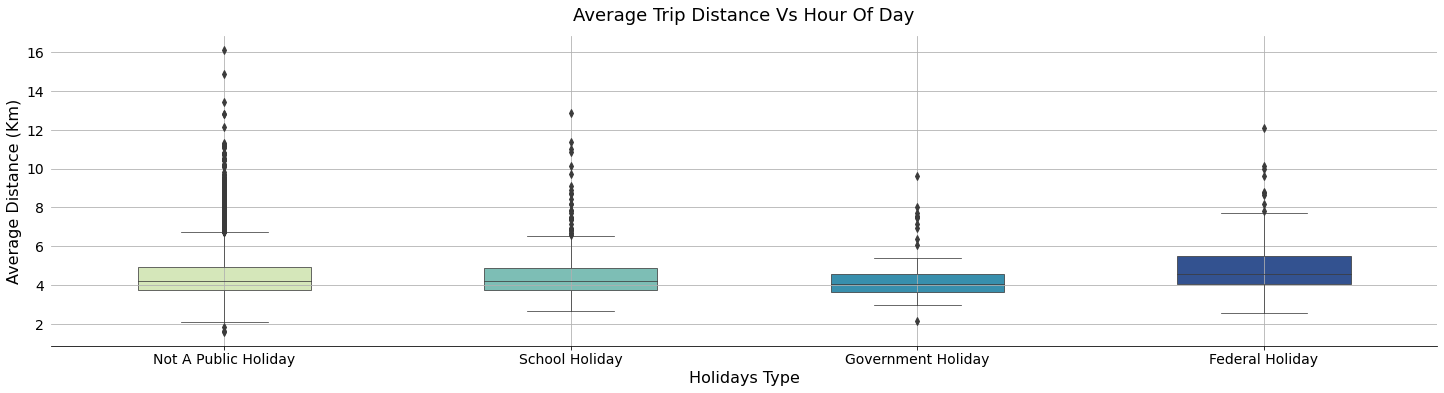

In [134]:
# Display a boxplot of average trip distance vs hour of day for all holiday types
plot_boxplot(
    pickup_avg_holidays,
    x_var="holiday_type",
    y_var="trip_distance",
    xlabel="Holidays Type",
    ylabel="Average Distance (Km)",
    title="average trip distance vs hour of day",
)

**Note:** The boxplot above shows the average daily distance traveled for each holiday cateogry. The average distance traveled is marginally higher for federal holiday.

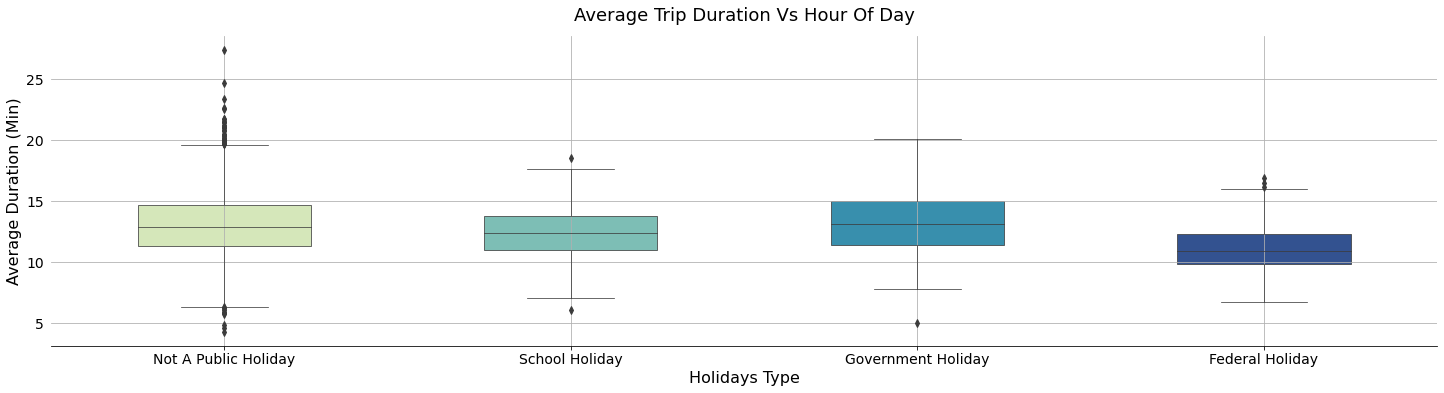

In [135]:
# Display a boxplot of average trip duration vs hour of day for all holiday types
plot_boxplot(
    pickup_avg_holidays,
    x_var="holiday_type",
    y_var="trip_duration",
    xlabel="Holidays Type",
    ylabel="Average Duration (Min)",
    title="average trip duration vs hour of day",
)

**Note:** The boxplot above shows the average daily travel duration for each holiday cateogry. The average travel duration is marginally lower for federal holidays.

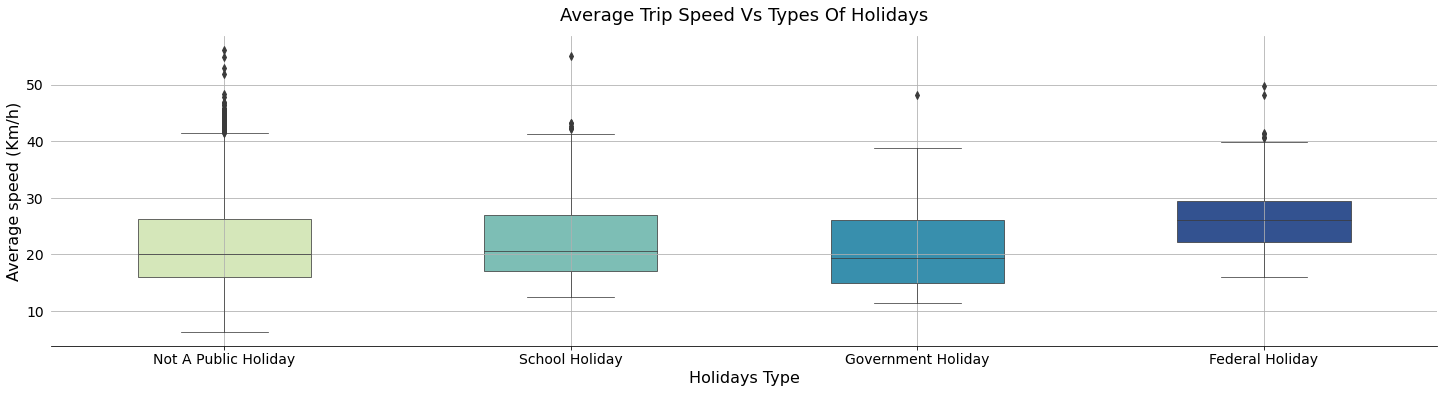

In [136]:
# Display a boxplot of average trip speed vs types of holidays
plot_boxplot(
    pickup_avg_holidays,
    x_var="holiday_type",
    y_var="trip_speed",
    xlabel="Holidays Type",
    ylabel="Average speed (Km/h)",
    title="average trip speed vs types of holidays",
)

**Note:** The boxplot above shows the average daily travel speed for each holiday cateogry. The average travel speed is higher for federal holiday.

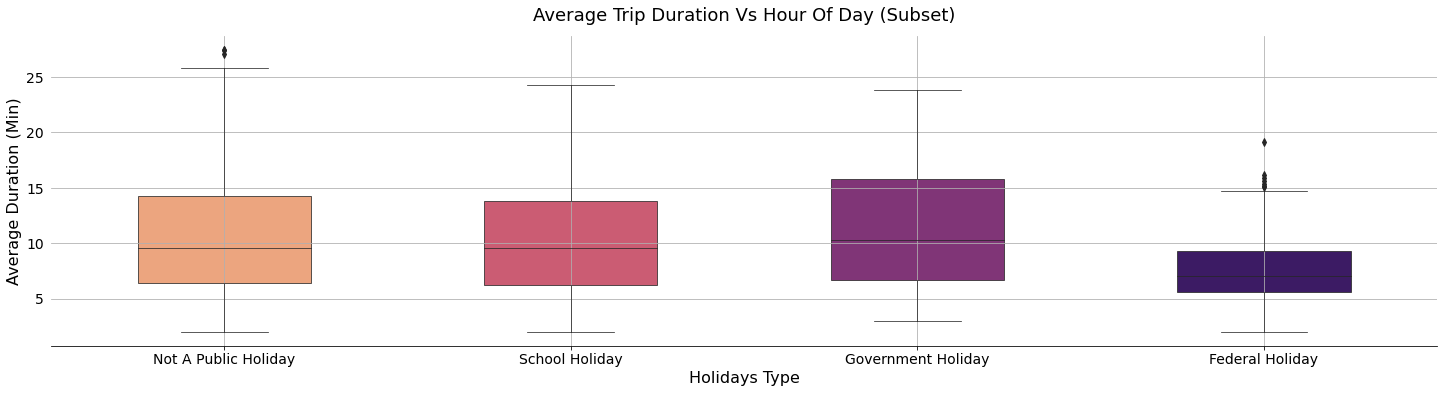

In [137]:
# Display a boxplot of average trip duration vs hour of day for all holiday types
plot_boxplot(
    pickup_avg_holidays_sub,
    x_var="holiday_type",
    y_var="trip_duration",
    xlabel="Holidays Type",
    ylabel="Average Duration (Min)",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Note:** The boxplot above shows the average daily travel duration for each holiday cateogry. In the taxi trips subset, the average travel duration is also lower for federal holidays. 

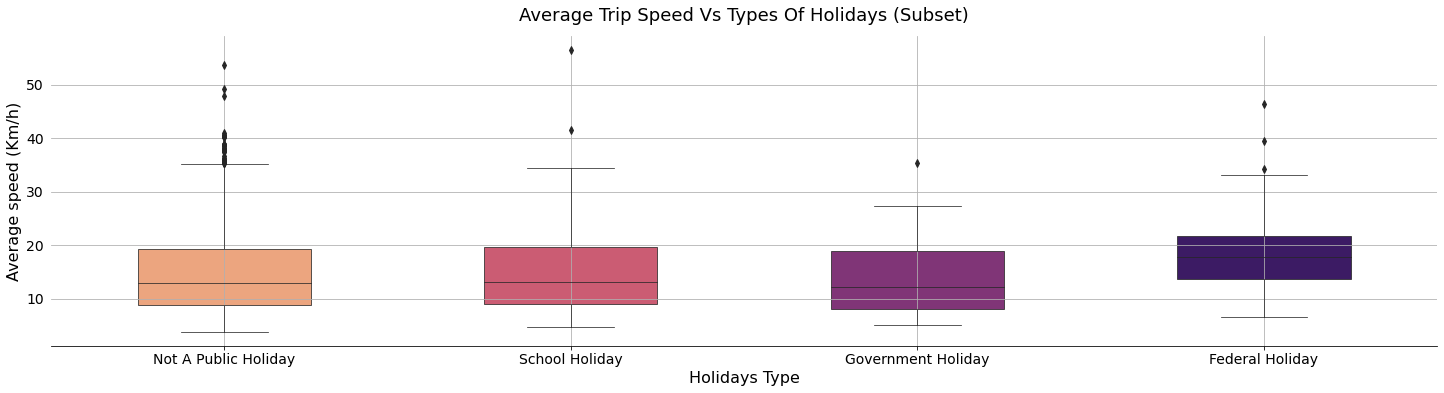

In [138]:
# Display a boxplot of average trip speed vs types of holidays
plot_boxplot(
    pickup_avg_holidays_sub,
    x_var="holiday_type",
    y_var="trip_speed",
    xlabel="Holidays Type",
    ylabel="Average speed (Km/h)",
    title="average trip speed vs types of holidays (subset)",
    palette="magma_r",
)

**Note:** The boxplot above shows the average daily travel speed for each holiday cateogry. In the taxi trips subset, the average travel speed is also higher for federal holiday.

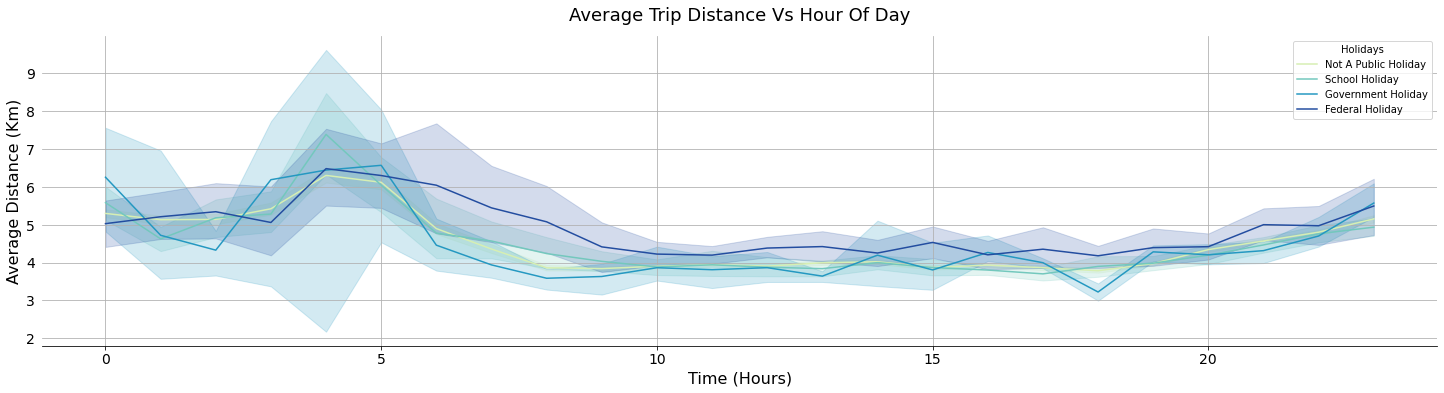

In [139]:
# Display a lineplot of average trip distance vs hour of day for all types of holidays
plot_lineplot(
    pickup_avg_holidays,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Average Distance (Km)",
    legend="Holidays",
    title="average trip distance vs hour of day",
)

**Note:** The line plot above shows the average daily distance traveled for each hour of day and each holiday cateogry. The average distance traveled is marginally higher for federal holiday.

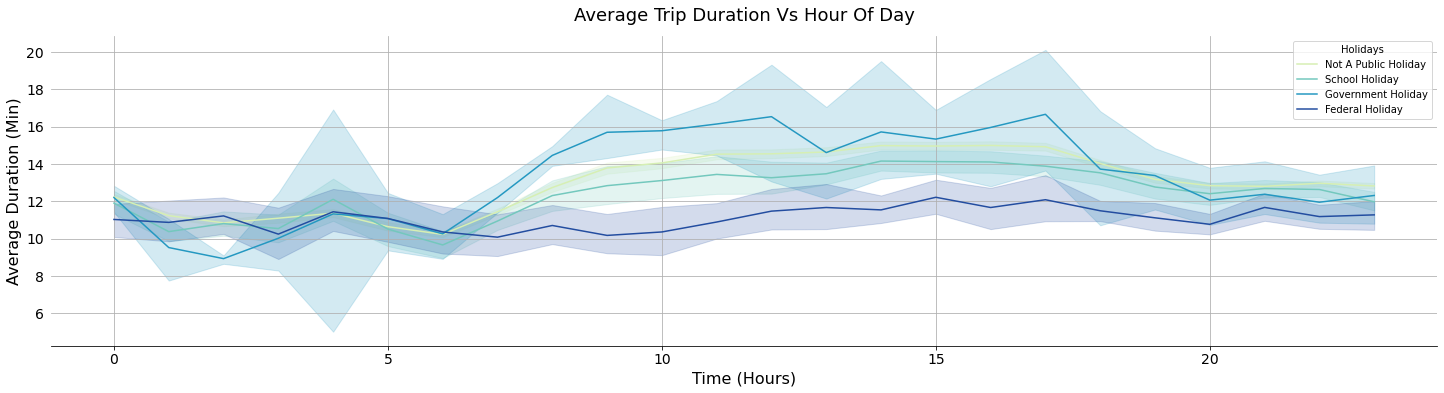

In [140]:
# Display a lineplot of average trip duration vs hour of day for all types of holidays
plot_lineplot(
    pickup_avg_holidays,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Average Duration (Min)",
    legend="Holidays",
    title="average trip duration vs hour of day",
)

**Note:** The line plot above shows the average daily travel duration for each hour of day and each holiday cateogry. The average travel time is lower for federal holidays during peak hours, and conversely higher for school vacations. The large variation observed for school holidays is due to the difference in ridership observed between traditional school vacations and spring breaks. We have previously observed that the number of traxi trips, and thus indirectly traffic congestion in the city, increases sharply in March. 

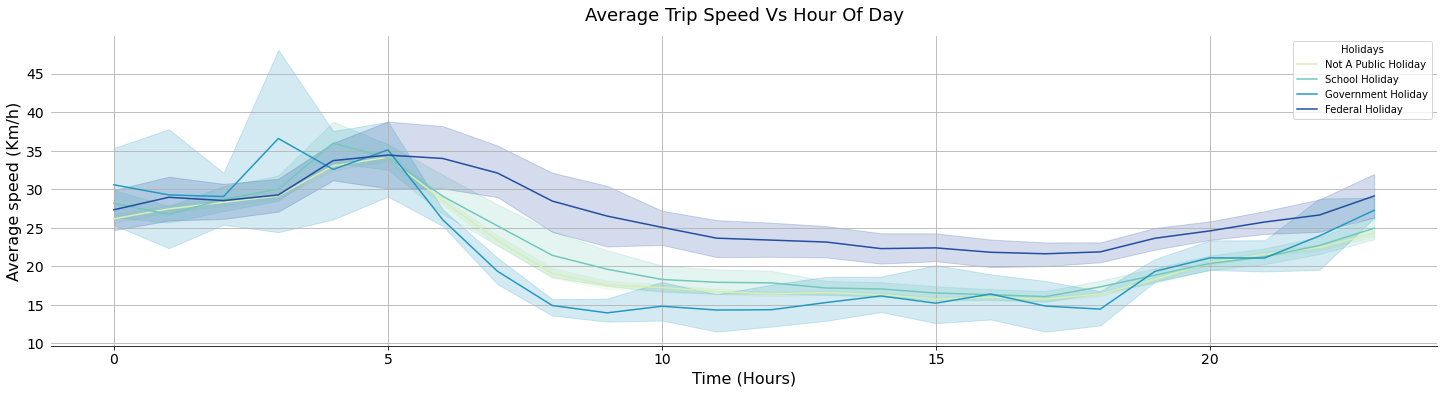

In [141]:
# Display a lineplot of average trip speed vs hour of day for all types of holidays
plot_lineplot(
    pickup_avg_holidays,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Average speed (Km/h)",
    legend="Holidays",
    title="average trip speed vs hour of day",
)

**Note:** The line plot above shows the average daily travel speed for each hour of day and each holiday cateogry. The average travel speed is higher for federal holidays during peak hours, and conversely lower for school vacations. As previously stated, The large variation observed for school holidays is due to the difference in ridership observed between traditional school vacations and spring breaks. The exact causes leading to these increases and decreases are  many and varied, and investigation of each possible cause is beyond the scope of this work.

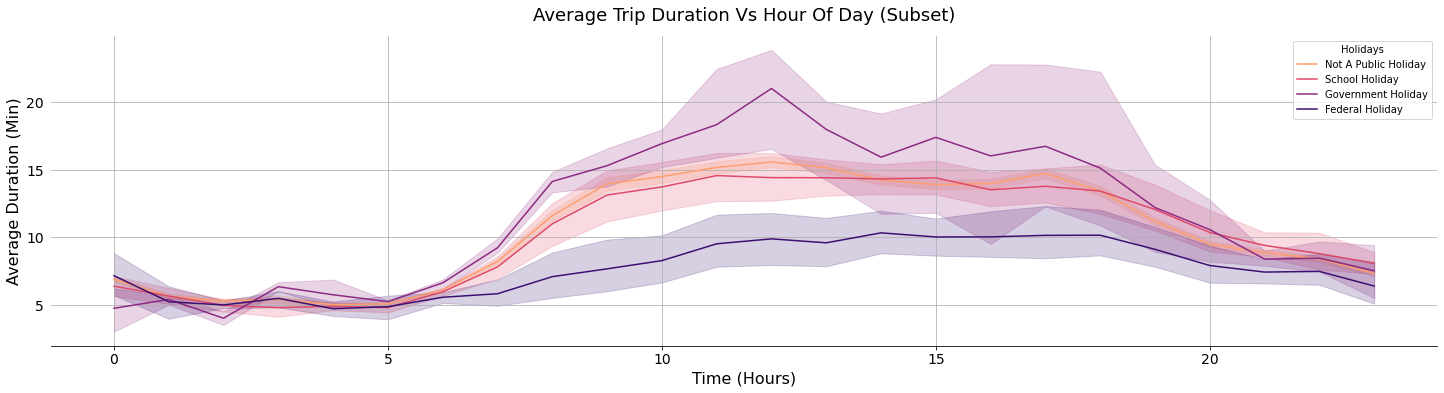

In [142]:
# Display a lineplot of average trip duration vs hour of day for all types of holidays
plot_lineplot(
    pickup_avg_holidays_sub,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Average Duration (Min)",
    legend="Holidays",
    title="average trip duration vs hour of day (subset)",
    palette="magma_r",
)

**Note:** The line plot above shows the average daily travel duration for each hour of day and each holiday cateogry. In the taxi trips subset, the average travel time is lower for federal holidays during peak hours. This observation corroborates what was discussed above.

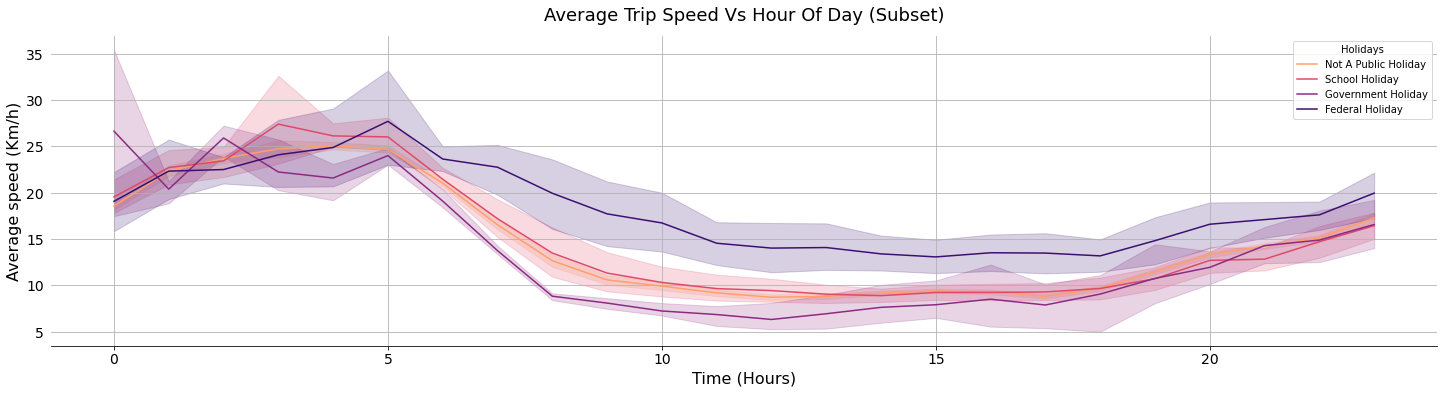

In [143]:
# Display a lineplot of average trip speed vs hour of day for all types of holidays
plot_lineplot(
    pickup_avg_holidays_sub,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="holiday_type",
    xlabel="Time (Hours)",
    ylabel="Average speed (Km/h)",
    legend="Holidays",
    title="average trip speed vs hour of day (subset)",
    palette="magma_r",
)

**Note:** The line plot above shows the average daily travel speed for each hour of day and each holiday cateogry. In the taxi trips subset, the average travel speed is also higher for federal holidays during peak hours. This observation corroborates what was discussed above.

## 2.3 Combined Dataset: Exploratory Data Analysis
## 2.3.1 Correlation Analysis of Combined Data 
### Goal:
Measure the strength of the linear relationship between every feature of the dataset.
### Code:

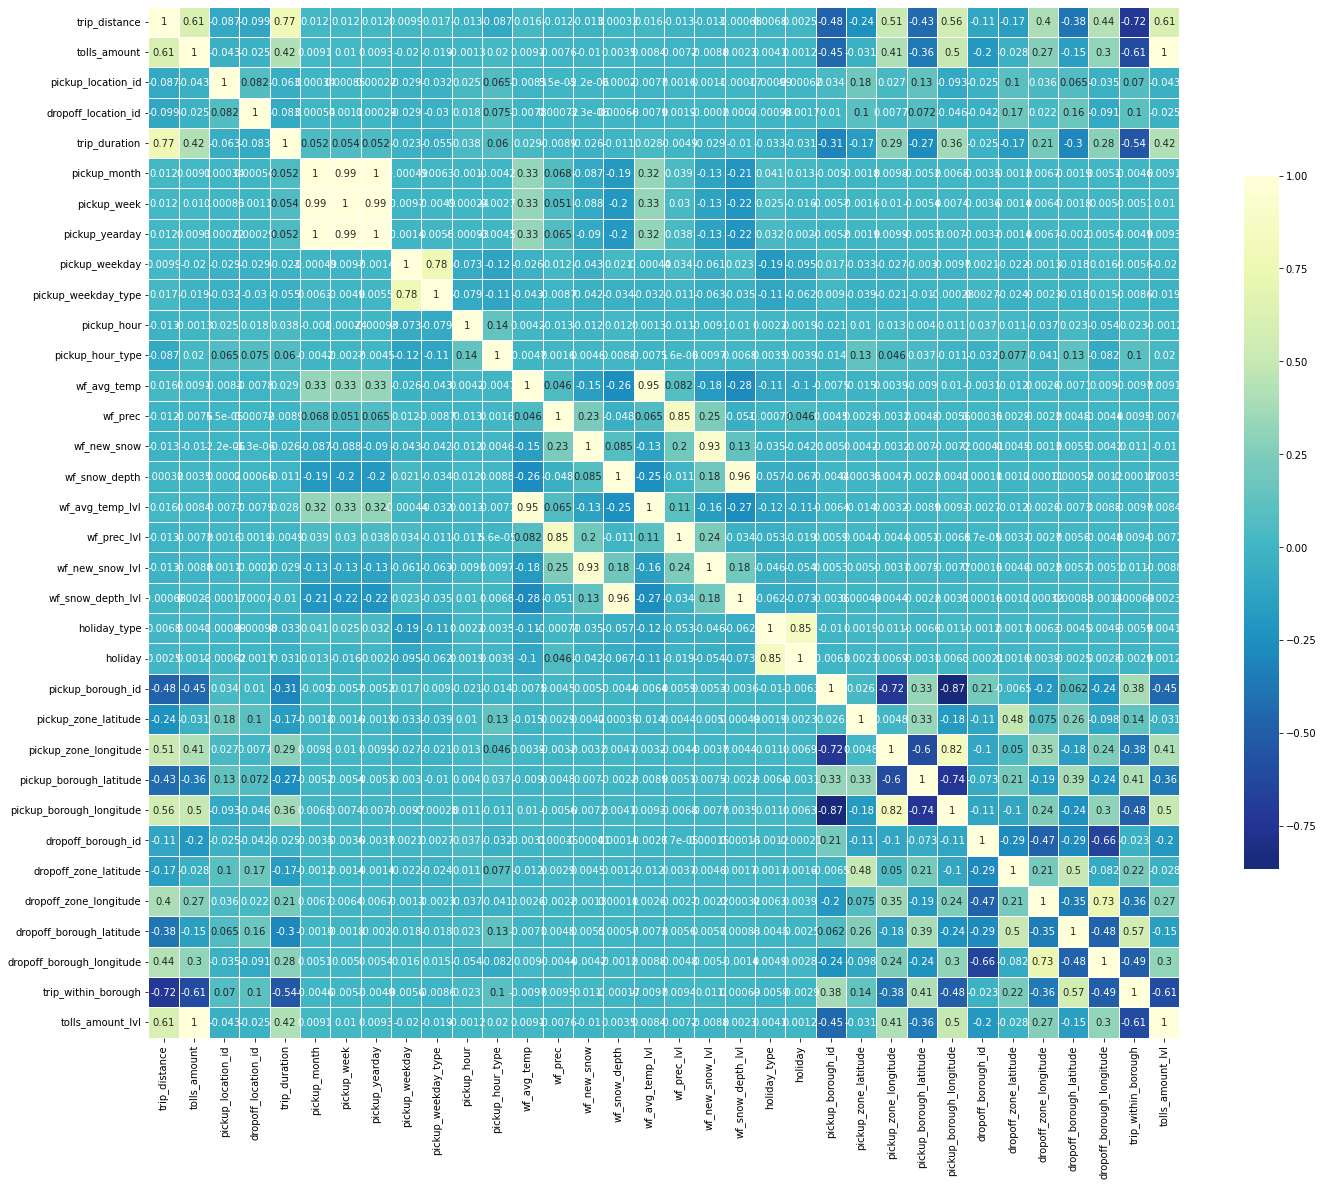

In [144]:
# Display a heatmap of the correlation matrix for all features of the data frame
plot_corrmap(train_df.corr())

**Note:** The correlation heatmap above shows the Pearson correlation index obtained for all features in the data set. A significant correlation can be observed between trip duration and trip distance, toll amount, and latitude and longitude of pickup and drop-off zones and boroughs. However, no correlation was found between trip length and weather and holidays variables.

***